<h1> Data Exploration & Merging

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scorecardpy as sc
import textwrap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


<h2> Application_Data Exploratory Data Analysis (EDA)

In [17]:
df = pd.read_csv('ApplicationData.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 120 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(63), int64(41), object(16)
memory usage: 281.5+ MB


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 120 columns]

<h4> Function To Plot KDE

In [18]:
def plot_histogram(df, column, bins=50):
    plt.figure(figsize=(7, 5))
    sns.histplot(df[column].dropna(), bins=bins, kde=False)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    
def plot_kde_by_target(df, column, target_col='TARGET'):
    plt.figure(figsize=(7, 5))
    for value in sorted(df[target_col].dropna().unique()):
        sns.kdeplot(
            df[df[target_col] == value][column].dropna(),
            label=f"{target_col} = {value}",
            shade=True
        )
    plt.title(f"KDE of {column} by {target_col}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_horizontal_categorical_bar(df, column, top_n=None, rotate_labels=False):
    """
    - top_n: if set, only plots the top N most frequent categories
    """
    value_counts = df[column].value_counts(dropna=False)

    if top_n:
        value_counts = value_counts.head(top_n)
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
    plt.title(f"Distribution of '{column}'")
    plt.xlabel("Count")
    plt.ylabel(column)
    if rotate_labels:
        plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

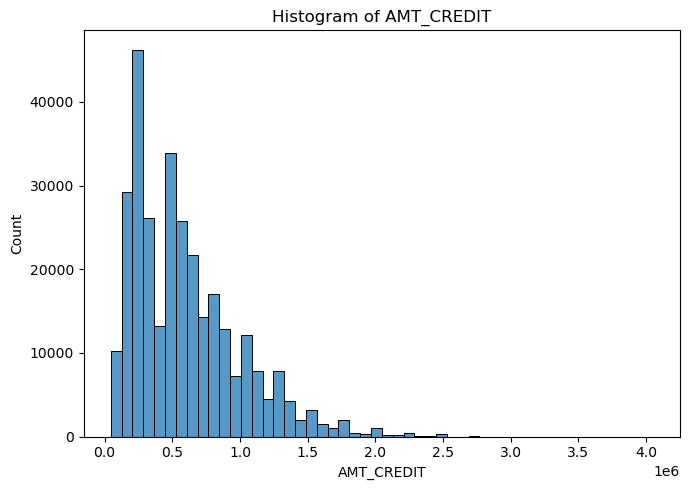

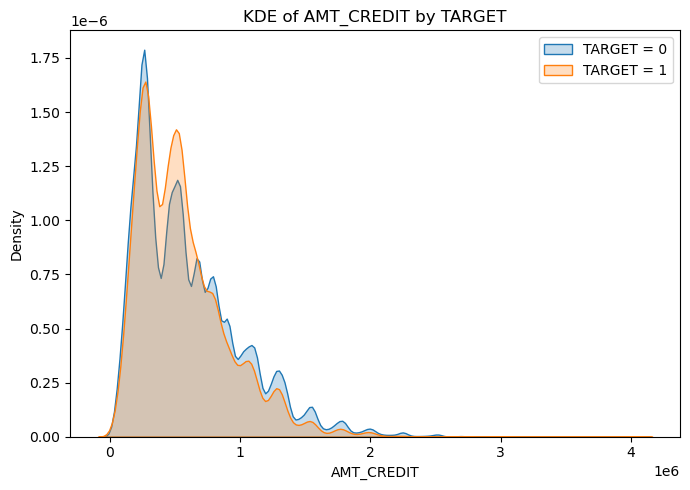

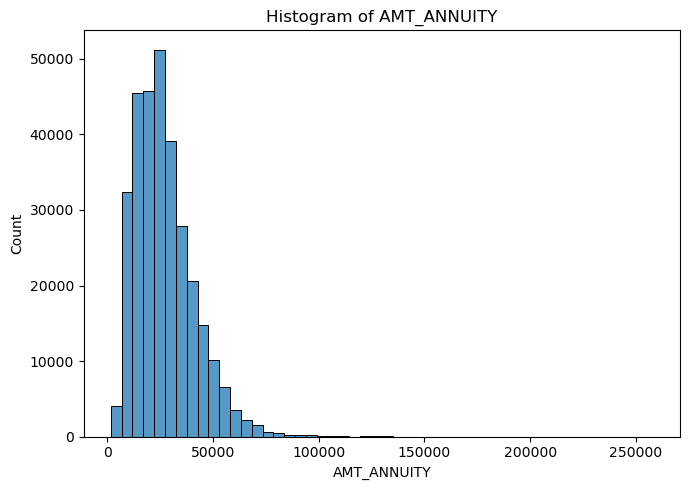

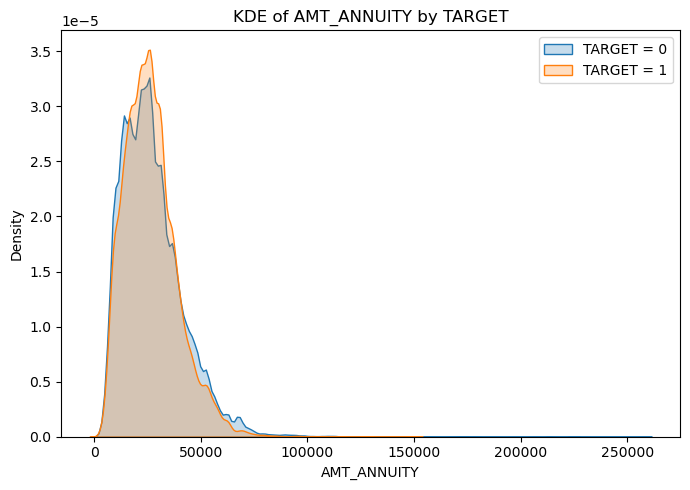

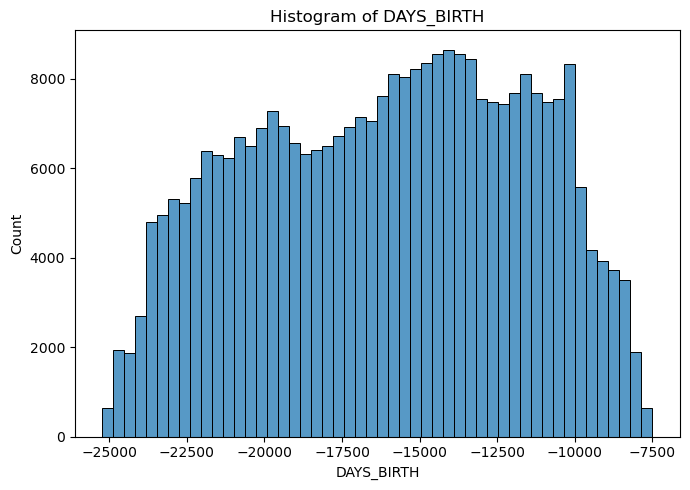

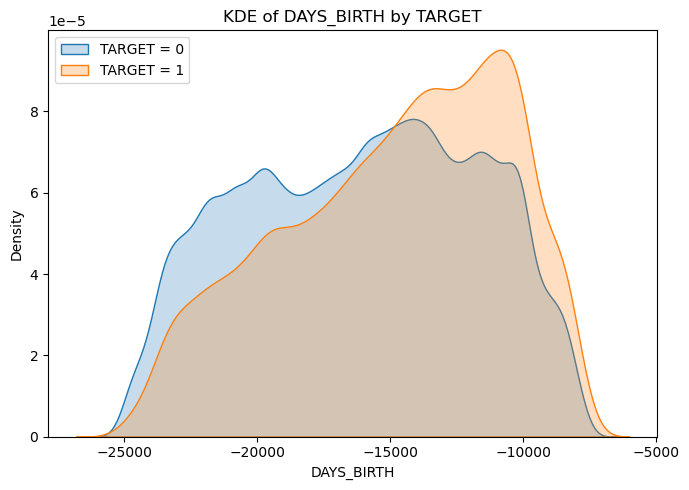

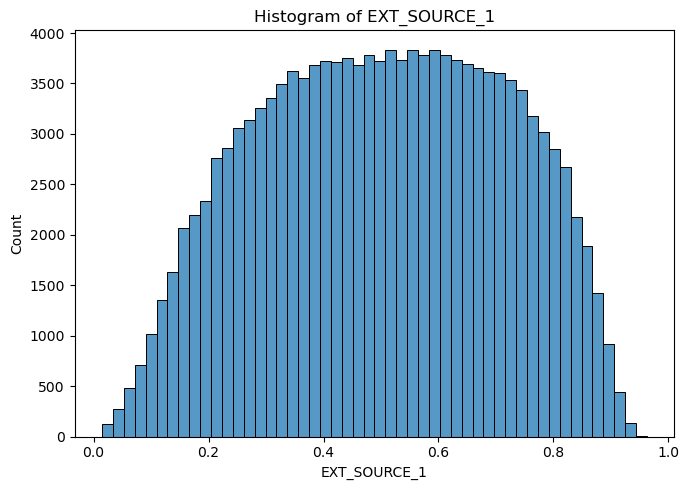

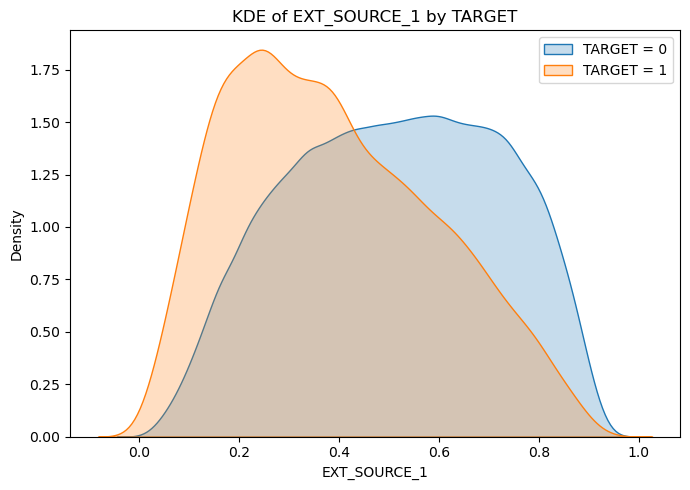

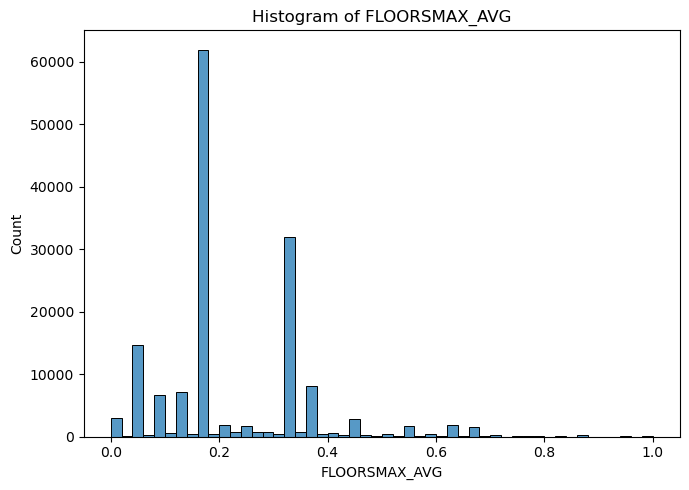

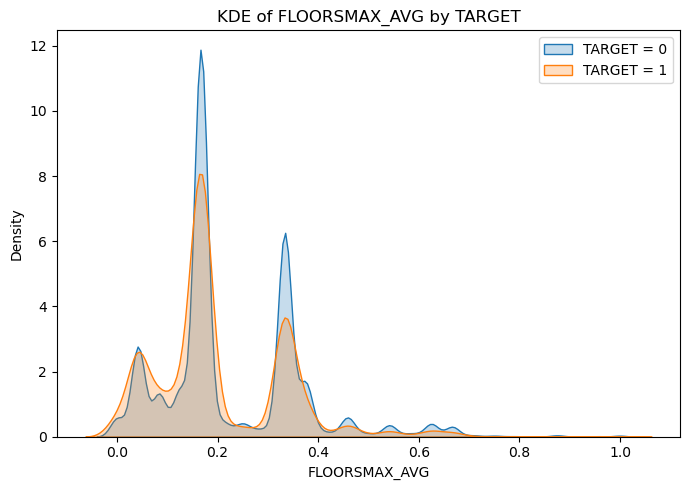

In [19]:
num_columns_to_plot = [
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'DAYS_BIRTH',
    'EXT_SOURCE_1',
    'FLOORSMAX_AVG'
]

# Histograms (univariate)
for col in num_columns_to_plot:
    if col in df.columns:
        plot_histogram(df, col)
        plot_kde_by_target(df, col, target_col='TARGET')

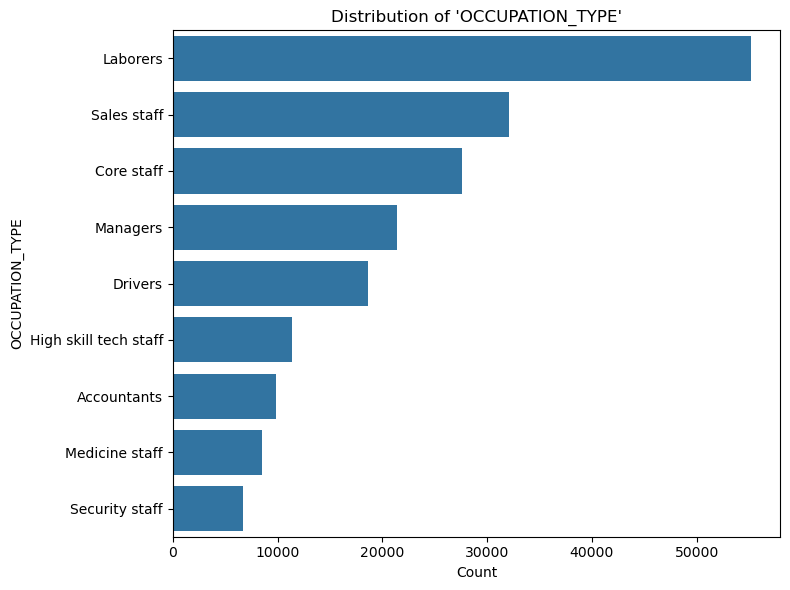

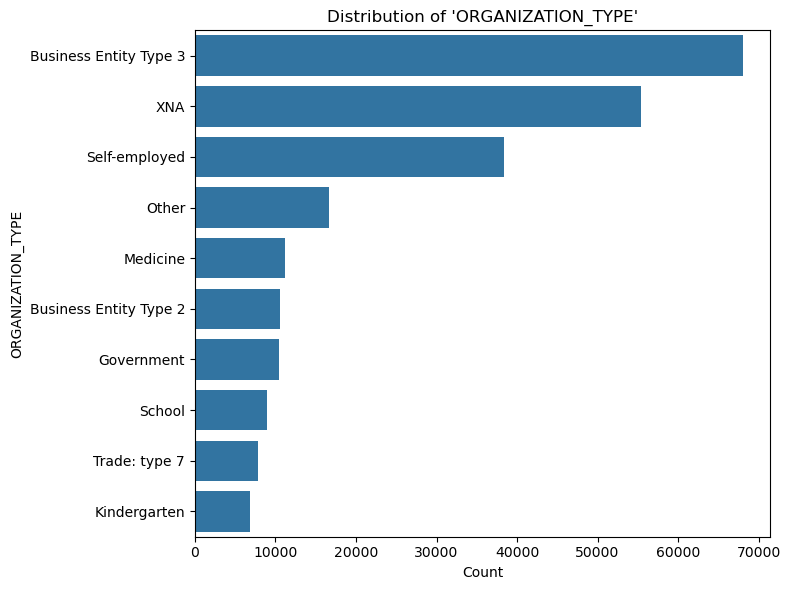

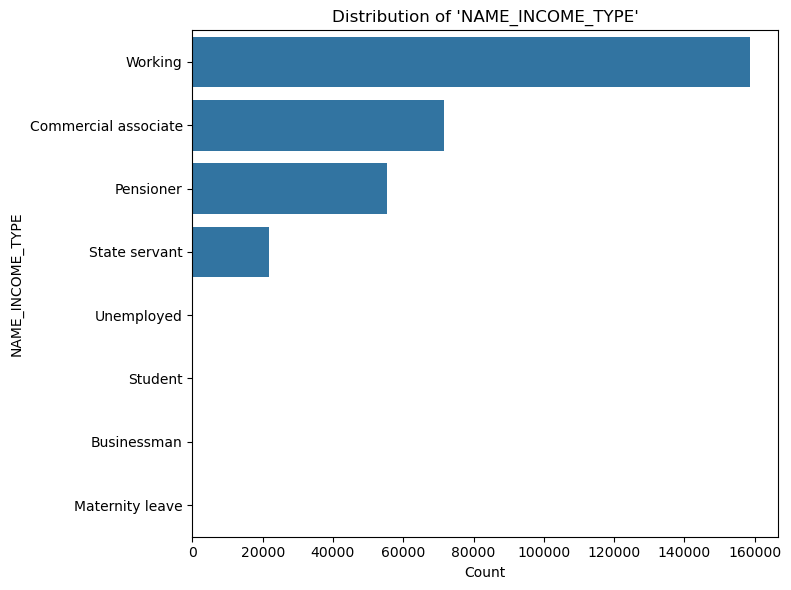

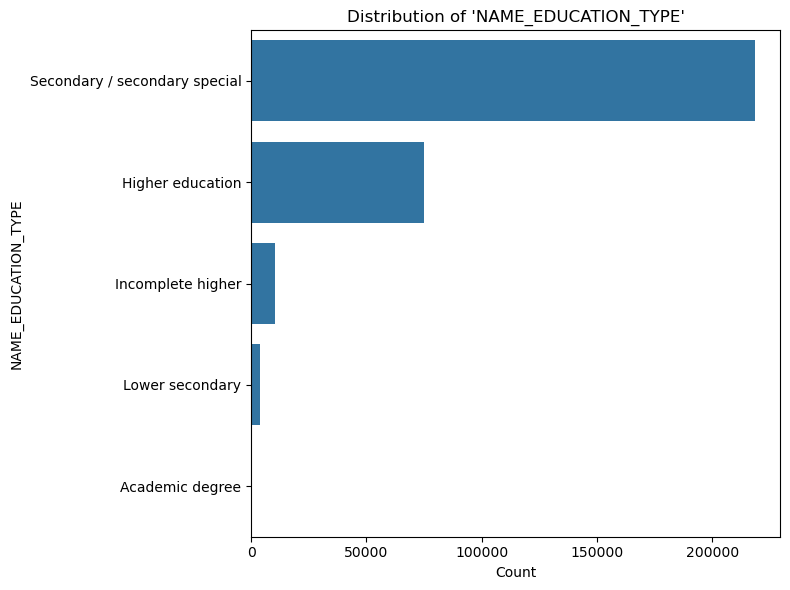

In [20]:
cat_columns_to_plot = [
    'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE'
]

# Histograms (univariate)
for col in cat_columns_to_plot:
    if col in df.columns:
        plot_horizontal_categorical_bar(df, col, top_n=10)
    

Note: The empty looking bar charts are not actually empty. Eg There are 10 students under NAME_INCOME_TYPE

<h3> Checking for % Missing Values

In [21]:
missing = df.isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0] * 100  # Show as percentage

pd.set_option('display.max_rows', None)
display(missing.reset_index().rename(columns={'index': 'Column', 0: 'Missing (%)'}))

Column  Missing (%)
0                COMMONAREA_MODE    69.872297
1                 COMMONAREA_AVG    69.872297
2                COMMONAREA_MEDI    69.872297
3       NONLIVINGAPARTMENTS_MEDI    69.432963
4       NONLIVINGAPARTMENTS_MODE    69.432963
5        NONLIVINGAPARTMENTS_AVG    69.432963
6             FONDKAPREMONT_MODE    68.386172
7          LIVINGAPARTMENTS_MEDI    68.354953
8           LIVINGAPARTMENTS_AVG    68.354953
9          LIVINGAPARTMENTS_MODE    68.354953
10                 FLOORSMIN_AVG    67.848630
11                FLOORSMIN_MODE    67.848630
12                FLOORSMIN_MEDI    67.848630
13              YEARS_BUILD_MEDI    66.497784
14              YEARS_BUILD_MODE    66.497784
15               YEARS_BUILD_AVG    66.497784
16                   OWN_CAR_AGE    65.990810
17                 LANDAREA_MEDI    59.376738
18                  LANDAREA_AVG    59.376738
19                 LANDAREA_MODE    59.376738
20             BASEMENTAREA_MEDI    58.515956
21              BASEMENTAREA_AVG    58.515956
22             BASEMENTAREA_MODE    58.515956
23                  EXT_SOURCE_1    56.381073
24             NONLIVINGAREA_AVG    55.179164
25            NONLIVINGAREA_MODE    55.179164
26            NONLIVINGAREA_MEDI    55.179164
27                ELEVATORS_MEDI    53.295980
28                ELEVATORS_MODE    53.295980
29                 ELEVATORS_AVG    53.295980
30            WALLSMATERIAL_MODE    50.840783
31               APARTMENTS_MEDI    50.749729
32                APARTMENTS_AVG    50.749729
33               APARTMENTS_MODE    50.749729
34                ENTRANCES_MEDI    50.348768
35                 ENTRANCES_AVG    50.348768
36                ENTRANCES_MODE    50.348768
37                LIVINGAREA_AVG    50.193326
38               LIVINGAREA_MODE    50.193326
39               LIVINGAREA_MEDI    50.193326
40                HOUSETYPE_MODE    50.176091
41                FLOORSMAX_MODE    49.760822
42                FLOORSMAX_MEDI    49.760822
43                 FLOORSMAX_AVG    49.760822
44  YEARS_BEGINEXPLUATATION_MODE    48.781019
45   YEARS_BEGINEXPLUATATION_AVG    48.781019
46  YEARS_BEGINEXPLUATATION_MEDI    48.781019
47                TOTALAREA_MODE    48.268517
48           EMERGENCYSTATE_MODE    47.398304
49               OCCUPATION_TYPE    31.345545
50     AMT_REQ_CREDIT_BUREAU_MON    13.501631
51     AMT_REQ_CREDIT_BUREAU_QRT    13.501631
52    AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
53     AMT_REQ_CREDIT_BUREAU_DAY    13.501631
54    AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
55    AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
56               NAME_TYPE_SUITE     0.420148
57      DEF_30_CNT_SOCIAL_CIRCLE     0.332021
58      DEF_60_CNT_SOCIAL_CIRCLE     0.332021
59      OBS_60_CNT_SOCIAL_CIRCLE     0.332021
60      OBS_30_CNT_SOCIAL_CIRCLE     0.332021
61               AMT_GOODS_PRICE     0.090403
62                   AMT_ANNUITY     0.003902
63               CNT_FAM_MEMBERS     0.000650
64        DAYS_LAST_PHONE_CHANGE     0.000325

<h2> Flattening Bureau Data & Bureau Data EDA

In [24]:
bureau_df = pd.read_csv("BureauData.csv")
# Using domain logic to drop columns not useful for aggregation
bureau_df.info()
bureau_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [25]:
missing = bureau_df.isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0] * 100  # Show as percentage

pd.set_option('display.max_rows', None)
display(missing.reset_index().rename(columns={'index': 'Column', 0: 'Missing (%)'}))

Column  Missing (%)
0             AMT_ANNUITY    71.473490
1  AMT_CREDIT_MAX_OVERDUE    65.513264
2       DAYS_ENDDATE_FACT    36.916958
3    AMT_CREDIT_SUM_LIMIT    34.477415
4     AMT_CREDIT_SUM_DEBT    15.011932
5     DAYS_CREDIT_ENDDATE     6.149573
6          AMT_CREDIT_SUM     0.000757

<h3>Univariate Analysis

In [26]:
# Separating columns by type for visualisation
continuous_columns = [
    "DAYS_CREDIT",
    "CREDIT_DAY_OVERDUE",
    "DAYS_CREDIT_ENDDATE",
    "DAYS_ENDDATE_FACT",
    "AMT_CREDIT_MAX_OVERDUE",
    "CNT_CREDIT_PROLONG",
    "AMT_CREDIT_SUM",
    "AMT_CREDIT_SUM_DEBT",
    "AMT_CREDIT_SUM_LIMIT",
    "AMT_CREDIT_SUM_OVERDUE",
    "DAYS_CREDIT_UPDATE",
    "AMT_ANNUITY"
]

categorical_columns = [
    "CREDIT_ACTIVE",
    "CREDIT_CURRENCY",
    "CREDIT_TYPE"
]

Continuous Features (with log transform & outlier clipping)

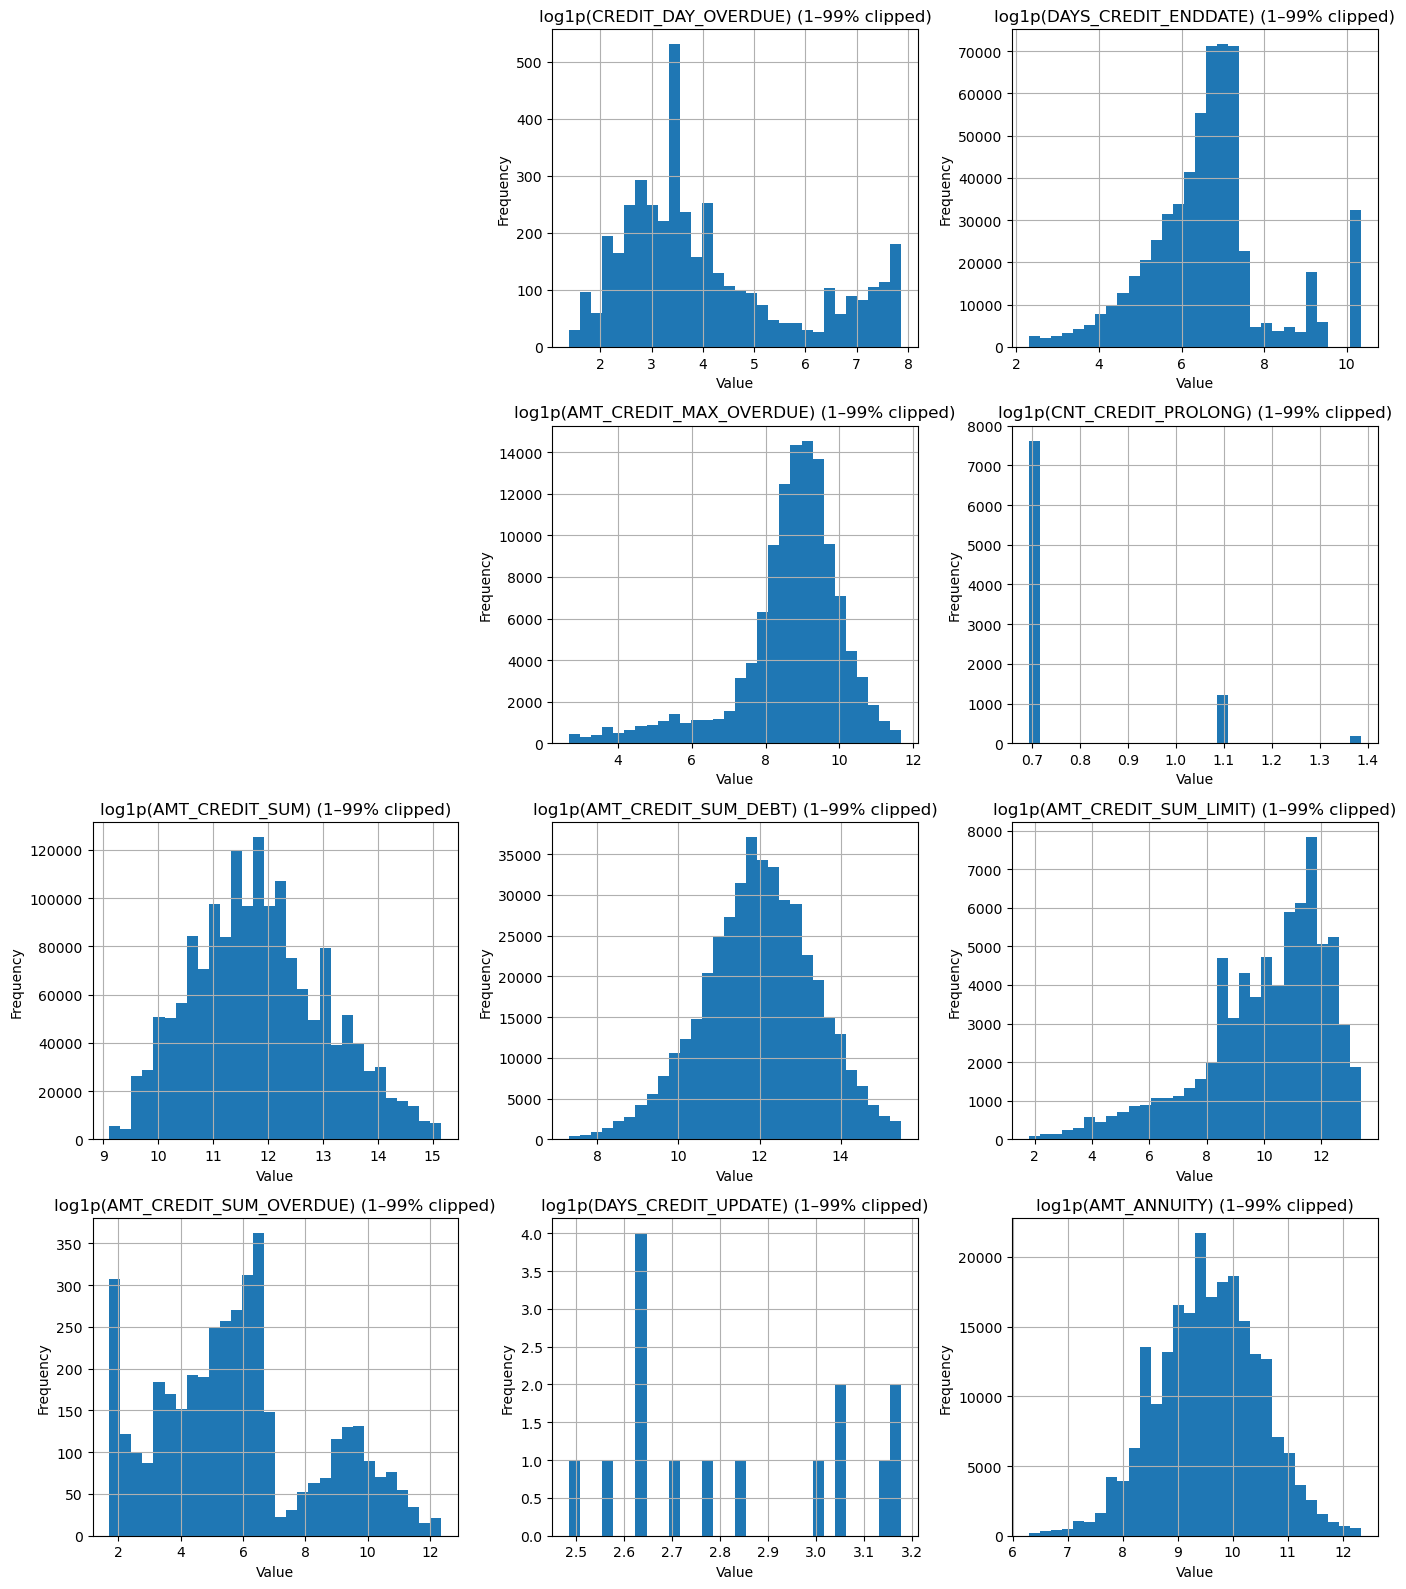

In [27]:
# Set up subplots
num_rows = (len(continuous_columns) + 2) // 3
num_cols = min(len(continuous_columns), 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
axes = axes.flatten()

# Plot each histogram
for i, column in enumerate(continuous_columns):
    data = bureau_df[column].dropna()
    data = data[data > 0]  # log1p requires > 0
    if not data.empty:
        data_log = np.log1p(data)
        q_low = data_log.quantile(0.01)
        q_high = data_log.quantile(0.99)
        data_clipped = data_log[(data_log >= q_low) & (data_log <= q_high)]
        data_clipped.hist(ax=axes[i], bins=30)
        axes[i].set_title(f"log1p({column}) (1–99% clipped)")
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")
    else:
        axes[i].set_visible(False)  # skip empty plots

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Categorical Features

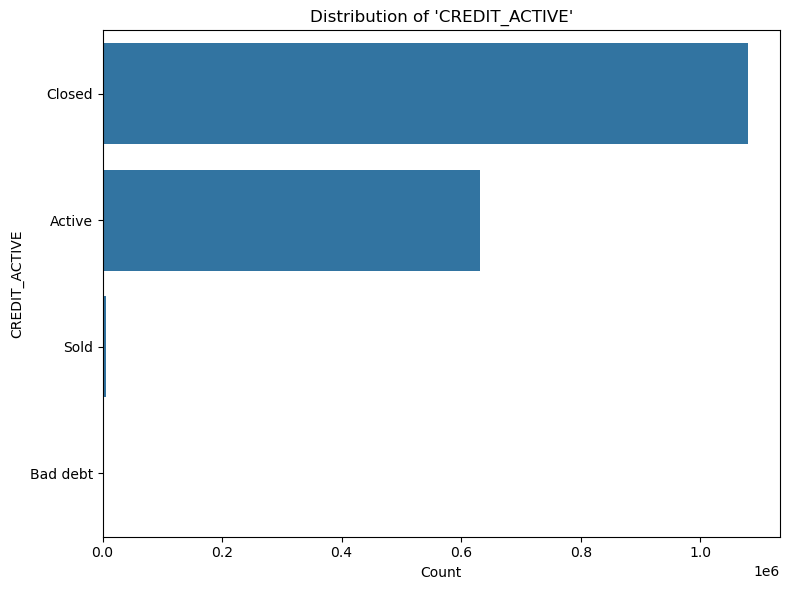

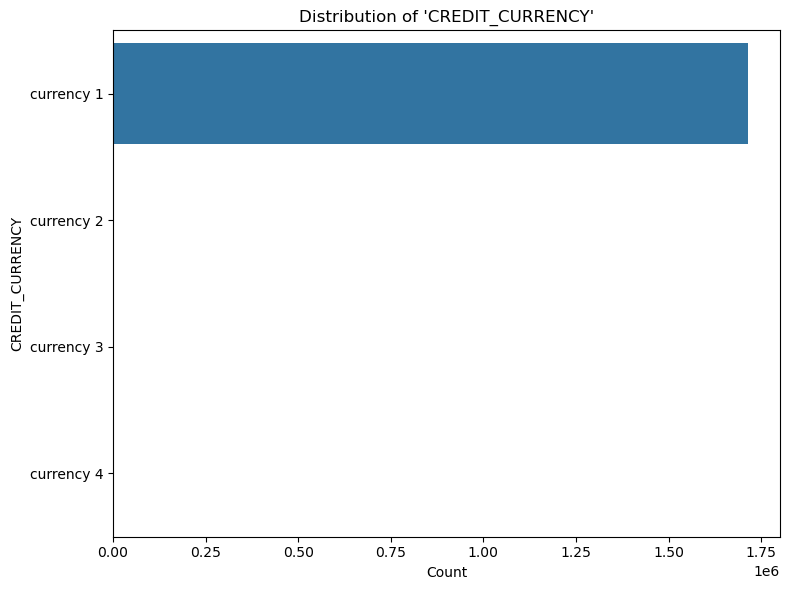

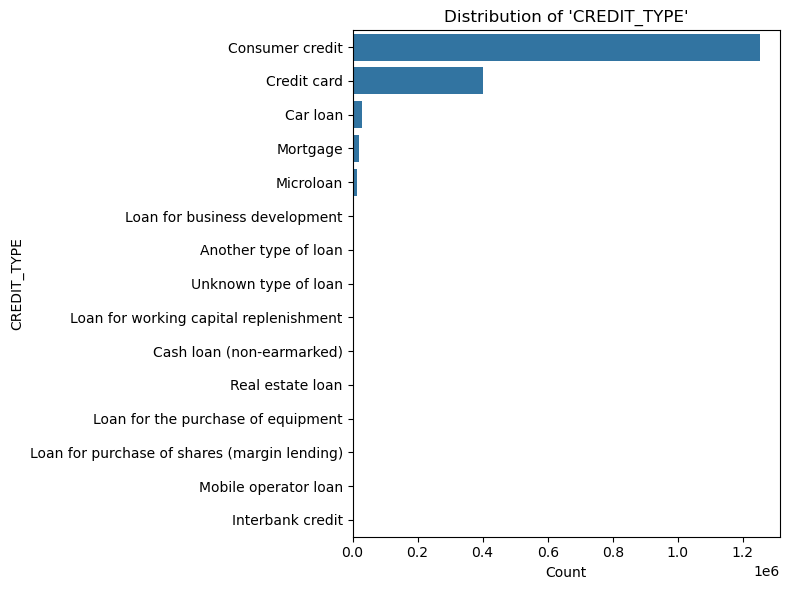

In [28]:
for col in categorical_columns:
    if col in bureau_df.columns:
        plot_horizontal_categorical_bar(bureau_df, col)

<h4> Dropping Columns based on EDA

In [29]:
bureau_df = bureau_df.drop(columns=[
    "SK_ID_BUREAU",        # Only identifies individual credit records
    "CREDIT_CURRENCY",     # 99.9% = currency 1
    "DAYS_CREDIT_UPDATE"   # Too redundant with DAYS_CREDIT / END_DATE
])

<h4> Grouping & Aggregation

In [30]:
# Step 2: Aggregation
agg_map = {
    "DAYS_CREDIT": "min",
    "DAYS_CREDIT_ENDDATE": "mean",
    "CREDIT_DAY_OVERDUE": "max",
    "AMT_CREDIT_MAX_OVERDUE": "max",
    "AMT_CREDIT_SUM_OVERDUE": "sum",
    "AMT_CREDIT_SUM": ["sum", "mean"],
    "AMT_CREDIT_SUM_DEBT": ["sum", "mean"],
    "CNT_CREDIT_PROLONG": "sum"
}

bureau_agg = bureau_df.groupby("SK_ID_CURR").agg(agg_map)
bureau_agg.columns = ['_'.join(col).strip('_') for col in bureau_agg.columns]
bureau_agg = bureau_agg.reset_index()

# Step 3: Pivot CREDIT_ACTIVE counts
status_counts = (
    bureau_df.pivot_table(index="SK_ID_CURR", columns="CREDIT_ACTIVE", values="AMT_CREDIT_SUM", aggfunc="count", fill_value=0)
    .reset_index()
)
status_counts.columns = ["SK_ID_CURR"] + [f"CREDIT_ACTIVE_{c}" for c in status_counts.columns[1:]]
# Step 4: Merge everything
bureau_flat = bureau_agg.merge(status_counts, on="SK_ID_CURR", how="left")

<h4> Merging </h4>

In [47]:
#Merge Datasets on SK_ID_CURR
merged_data = df.merge(bureau_flat, on="SK_ID_CURR", how="left")
merged_data.drop(columns="SK_ID_CURR",inplace=True)
#Save the Final Merged Data to CSV
merged_data.to_csv("after_merge.csv", index=False)
#Preview Merged Data
merged_data.isnull().sum()

KeyError: 'SK_ID_CURR'

<h1> Data Preparation

In [32]:
df = pd.read_csv('after_merge.csv')

<h3>Data Selection Via Domain Knowledge <br> House Improvement Loans : 
<br>1 Only for thow who own a house <br>
2 Age must be above 21 and less than 65 years (including leap years)
<h5>High % Missing Data that are not relevant to domain logic (Such as Ext_source 1/ Living_Area) are dropped. Please refer to excel file "Data Dict" for <b> each independant variable's domain logic</b>

In [33]:
df = df[
    (df['FLAG_OWN_REALTY'] == 'Y') &
    (df['DAYS_BIRTH'] < -7670) &
    (df['DAYS_BIRTH'] > -23741)
]

drop_cols = [
    # Identifiers
    'CODE_GENDER',

    # Redundant contact details
    'FLAG_MOBIL', 'FLAG_PHONE', 

    # Redundant address mismatch flags
    'REG_REGION_NOT_LIVE_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'LIVE_CITY_NOT_WORK_CITY',
    'NAME_TYPE_SUITE','OWN_CAR_AGE',

    # Application timing info
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',

    # Low info / redundant / noisy house features
    'COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI',
    'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI',
    'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
    'ELEVATORS_AVG', 'ELEVATORS_MODE', 'ELEVATORS_MEDI',
    'ENTRANCES_AVG', 'ENTRANCES_MODE', 'ENTRANCES_MEDI',
    'LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI',
    'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI',
    'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI',
    'APARTMENTS_AVG', 'APARTMENTS_MODE', 'APARTMENTS_MEDI',
    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'LIVINGAREA_MEDI'
    'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI','LIVINGAREA_MODE','YEARS_BUILD_AVG',
    'WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'FONDKAPREMONT_MODE', 'EMERGENCYSTATE_MODE', 'LIVINGAREA_MEDI ',
    'TOTAL_AREA_MODE', 'REGION_RATING_CLIENT_W_CITY',

    # Credit bureau enquiry columns to drop
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_QRT',

    # Weak social circle features
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
]

df.drop(columns=drop_cols, inplace=True, errors='ignore')

<h3> Dimensionality Reduction : </h3> 
<h4> Feature Extraction

In [34]:
# Combine FLAG_DOCUMENT_* into NUM_DOCS_PROVIDED
doc_cols = [col for col in df.columns if col.startswith('FLAG_DOCUMENT_')]
df['NUM_DOCS_PROVIDED'] = df[doc_cols].sum(axis=1)
df.drop(columns=doc_cols, inplace=True)

# Create RATIO_LIFE_EMPLOYED
df['RATIO_LIFE_EMPLOYED'] = np.where(
    df['DAYS_EMPLOYED'].notna() & df['DAYS_BIRTH'].notna(),
    df['DAYS_EMPLOYED'] / df['DAYS_BIRTH'],
    np.nan
)
# Create LOAN_TO_VALUE
df['LOAN_TO_VALUE'] = np.where(
    df['AMT_CREDIT'].notna() & df['AMT_GOODS_PRICE'].notna(),
    df['AMT_CREDIT'] / df['AMT_GOODS_PRICE'],
    np.nan
)
# Drop the original columns
df.drop(columns=['DAYS_EMPLOYED', 'DAYS_BIRTH','AMT_CREDIT', 'AMT_GOODS_PRICE'], inplace=True)
# Check the new columns
df[['RATIO_LIFE_EMPLOYED', 'LOAN_TO_VALUE']].describe()
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207300 entries, 0 to 307509
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       207300 non-null  int64  
 1   NAME_CONTRACT_TYPE           207300 non-null  object 
 2   FLAG_OWN_CAR                 207300 non-null  object 
 3   FLAG_OWN_REALTY              207300 non-null  object 
 4   CNT_CHILDREN                 207300 non-null  int64  
 5   AMT_INCOME_TOTAL             207300 non-null  float64
 6   AMT_ANNUITY                  207297 non-null  float64
 7   NAME_INCOME_TYPE             207300 non-null  object 
 8   NAME_EDUCATION_TYPE          207300 non-null  object 
 9   NAME_FAMILY_STATUS           207300 non-null  object 
 10  NAME_HOUSING_TYPE            207300 non-null  object 
 11  REGION_POPULATION_RELATIVE   207300 non-null  float64
 12  DAYS_REGISTRATION            207300 non-null  float64
 13  DAYS

<h4> Further Selection Based On Correlation </h4>

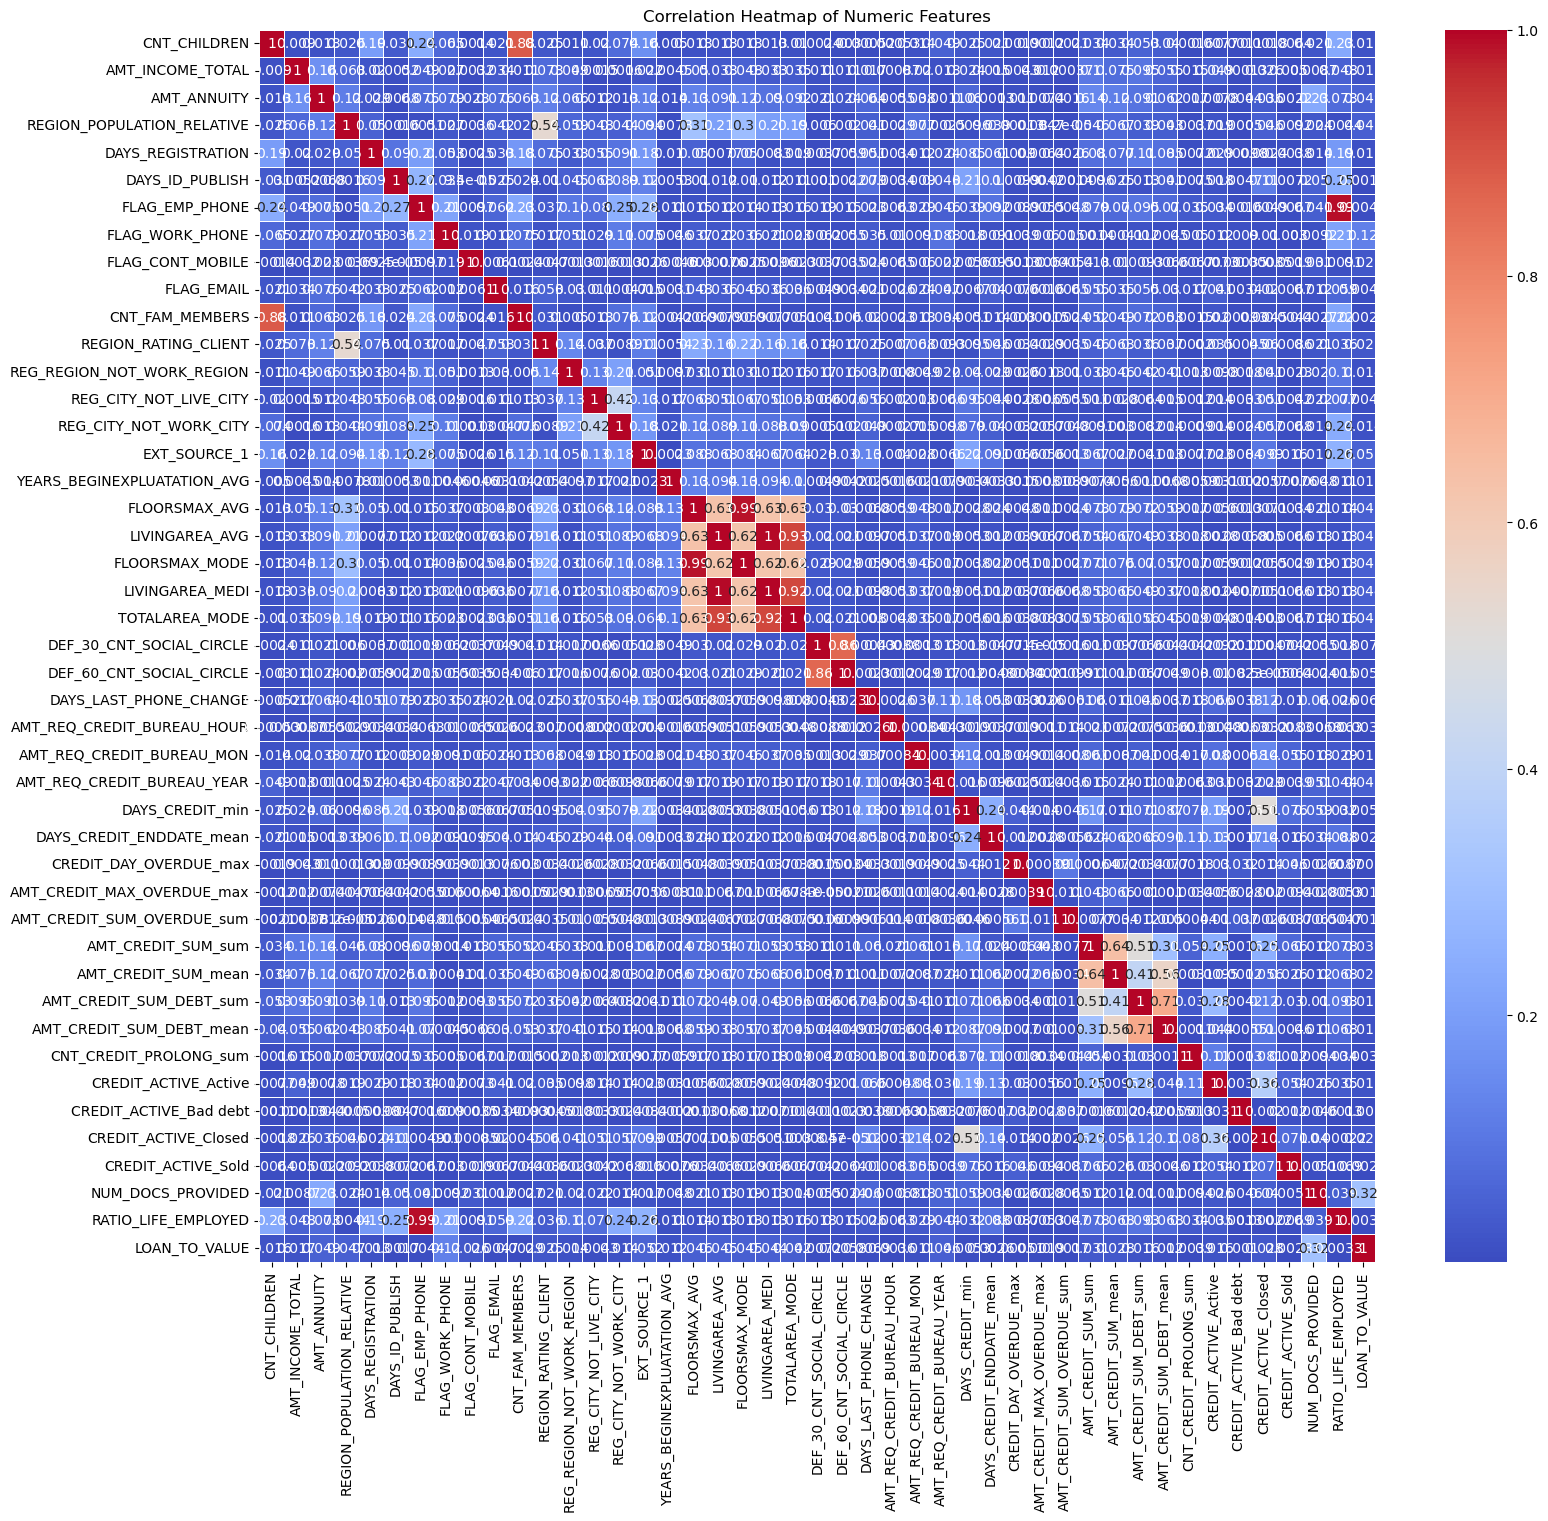

In [35]:
# Get numeric columns excluding target
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove("TARGET")

numeric_df = df[numeric_cols]
corr_matrix = numeric_df.corr().abs()

# Set figure size
plt.figure(figsize=(18, 16))

# Create heatmap
sns.heatmap(corr_matrix, 
            annot=True,
            cmap='coolwarm', 
            linewidths=0.5,
            cbar=True)

plt.title("Correlation Heatmap of Numeric Features")
plt.show()

<h3>Deciding Which Variables To Drop : </h3><br>
REG_CITY_NOT_WORK_CITY vs REG_CITY_NOT_LIVE_CITY <br>
Both reflect potential instability in the client's residence or work life. Slighlty overlapping but not the same. <br><br>

FLOORSMAX_AVG vs LIVINGAREA_AVG <br>
Keep both — they capture different aspects of the property<br><br>

AMT_GOODS_PRICE vs AMT_ANNUITY <br>
Even though highly correlated, One is the size of the loan. The other is payment burden<br><br>

Verdict - We will not drop any of the 4 numerical data with higher than average correlation. 

In [36]:
df.to_csv('after_prep.csv', index=False)

<h1> Grouping And Screening

<h3> Fine Classing

In [37]:
df = pd.read_csv('after_prep.csv')
df_orig = df.copy() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       207300 non-null  int64  
 1   NAME_CONTRACT_TYPE           207300 non-null  object 
 2   FLAG_OWN_CAR                 207300 non-null  object 
 3   FLAG_OWN_REALTY              207300 non-null  object 
 4   CNT_CHILDREN                 207300 non-null  int64  
 5   AMT_INCOME_TOTAL             207300 non-null  float64
 6   AMT_ANNUITY                  207297 non-null  float64
 7   NAME_INCOME_TYPE             207300 non-null  object 
 8   NAME_EDUCATION_TYPE          207300 non-null  object 
 9   NAME_FAMILY_STATUS           207300 non-null  object 
 10  NAME_HOUSING_TYPE            207300 non-null  object 
 11  REGION_POPULATION_RELATIVE   207300 non-null  float64
 12  DAYS_REGISTRATION            207300 non-null  float64
 13 

In [38]:
#convert to categorical
cols_to_object = [
    'NAME_CONTRACT_TYPE',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE',
    'FLAG_EMP_PHONE',         # binary (0/1)
    'FLAG_WORK_PHONE',        # binary
    'FLAG_CONT_MOBILE',       # binary
    'FLAG_EMAIL',             # binary
    'REG_REGION_NOT_WORK_REGION',  # binary
    'REG_CITY_NOT_LIVE_CITY',      # binary
    'REG_CITY_NOT_WORK_CITY',      # binary
]
for col in cols_to_object:
    if col in df.columns:
        df[col] = df[col].astype(str).astype('object')

for col in df.columns:
    if col not in cols_to_object:
        df[col] = pd.to_numeric(df[col], errors='coerce')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       207300 non-null  int64  
 1   NAME_CONTRACT_TYPE           207300 non-null  object 
 2   FLAG_OWN_CAR                 207300 non-null  object 
 3   FLAG_OWN_REALTY              207300 non-null  object 
 4   CNT_CHILDREN                 207300 non-null  int64  
 5   AMT_INCOME_TOTAL             207300 non-null  float64
 6   AMT_ANNUITY                  207297 non-null  float64
 7   NAME_INCOME_TYPE             207300 non-null  object 
 8   NAME_EDUCATION_TYPE          207300 non-null  object 
 9   NAME_FAMILY_STATUS           207300 non-null  object 
 10  NAME_HOUSING_TYPE            207300 non-null  object 
 11  REGION_POPULATION_RELATIVE   207300 non-null  float64
 12  DAYS_REGISTRATION            207300 non-null  float64
 13 

In [39]:
def calculate_iv_all(df, target_col='TARGET', bins=20):
    iv_summary = []
    
    # Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include='object').columns.tolist()

    # Remove target column from both
    numerical_cols = [col for col in numerical_cols if col != target_col]
    categorical_cols = [col for col in categorical_cols if col != target_col]

    # --- Numerical Features ---
    for col in numerical_cols:
        temp_df = df[[col, target_col]].copy()

        # Bin using qcut and fill missing with 'Missing'
        try:
            temp_df['Bin_Range'] = pd.qcut(temp_df[col], q=bins, duplicates='drop')
        except ValueError:
            print(f"Skipping {col} (not enough unique values to bin)")
            continue

        temp_df['Bin_Range'] = temp_df['Bin_Range'].astype(object).fillna('Missing')

        iv_summary.append({
            'Variable': col,
            'IV': _calculate_iv(temp_df, target_col)
        })

    # --- Categorical Features ---
    for col in categorical_cols:
        temp_df = df[[col, target_col]].copy()
        temp_df['Bin_Range'] = temp_df[col].astype(str).fillna('Missing')
        
        iv_summary.append({
            'Variable': col,
            'IV': _calculate_iv(temp_df, target_col)
        })

    # Return as sorted DataFrame
    iv_df = pd.DataFrame(iv_summary).sort_values(by='IV', ascending=False)
    return iv_df

# --- Helper Function ---
def _calculate_iv(temp_df, target_col):
    grouped = temp_df.groupby('Bin_Range')
    total_events = temp_df[target_col].sum()
    total_non_events = len(temp_df) - total_events

    iv_table = grouped.agg({target_col: ['count', 'sum']}).reset_index()
    iv_table.columns = ['Bin_Range', 'Count', 'Events']
    iv_table['Non_Events'] = iv_table['Count'] - iv_table['Events']
    iv_table['%_Events'] = iv_table['Events'] / total_events
    iv_table['%_Non_Events'] = iv_table['Non_Events'] / total_non_events

    # Avoid division by 0
    iv_table['WOE'] = np.log((iv_table['%_Non_Events'] + 1e-6) / (iv_table['%_Events'] + 1e-6))
    iv_table['IV'] = (iv_table['%_Non_Events'] - iv_table['%_Events']) * iv_table['WOE']

    return iv_table['IV'].sum()

In [ ]:
train, test = sc.split_df(df, y = 'TARGET', ratio = .7).values()
print(train.shape)
print(test.shape)

### lab says only need to use training set to train model and fineclass and coarse hence only trainiv is adjusted then whatever is supposed to be dropped will be dropped on test as well

In [ ]:
# iv_df = calculate_iv_all(df, target_col='TARGET', bins=20)
# print(iv_df)

train_iv_df = calculate_iv_all(train, target_col='TARGET', bins=20)
print(train_iv_df)

                       Variable        IV
8                  EXT_SOURCE_1  0.156003
37                LOAN_TO_VALUE  0.091847
36          RATIO_LIFE_EMPLOYED  0.088309
49              OCCUPATION_TYPE  0.080222
21              DAYS_CREDIT_min  0.078569
22     DAYS_CREDIT_ENDDATE_mean  0.075526
53            ORGANIZATION_TYPE  0.068933
29     AMT_CREDIT_SUM_DEBT_mean  0.054111
31         CREDIT_ACTIVE_Active  0.053558
41             NAME_INCOME_TYPE  0.050930
17       DAYS_LAST_PHONE_CHANGE  0.048573
42          NAME_EDUCATION_TYPE  0.048123
28      AMT_CREDIT_SUM_DEBT_sum  0.047867
3    REGION_POPULATION_RELATIVE  0.040241
10                FLOORSMAX_AVG  0.039137
12               FLOORSMAX_MODE  0.038735
5               DAYS_ID_PUBLISH  0.037855
14               TOTALAREA_MODE  0.036709
33         CREDIT_ACTIVE_Closed  0.034317
13              LIVINGAREA_MEDI  0.033961
11               LIVINGAREA_AVG  0.033893
9   YEARS_BEGINEXPLUATATION_AVG  0.030477
2                   AMT_ANNUITY  0

<h3> Characteristic Screening

In [ ]:
important_vars = [
    'EXT_SOURCE_1',                   # 0.156003
    'LOAN_TO_VALUE',                  # 0.091847
    'RATIO_LIFE_EMPLOYED',           # 0.088309
    'OCCUPATION_TYPE',               # 0.080222
    'DAYS_CREDIT_min',               # 0.078569 (most recent credit record)
    'DAYS_CREDIT_ENDDATE_mean',      # 0.075526 (avg number of days until loan end)
    'ORGANIZATION_TYPE',             # 0.068933
    'AMT_CREDIT_SUM_DEBT_mean',      # 0.054111 (avg debt per credit)
    'CREDIT_ACTIVE_Active',          # 0.053558 (count of active credits)
    'NAME_INCOME_TYPE',              # 0.050930
    'DAYS_LAST_PHONE_CHANGE',        # 0.048573
    'NAME_EDUCATION_TYPE',           # 0.048123
    'AMT_CREDIT_SUM_DEBT_sum',       # 0.047867 (total debt from bureau)
    'REGION_POPULATION_RELATIVE',    # 0.040241
    'FLOORSMAX_AVG',                 # 0.039137
    'DAYS_ID_PUBLISH',               # 0.037855
    'TARGET'                         # target label for supervised learning
]

# df.drop(columns=[col for col in df.columns if col not in important_vars], inplace=True)
# df.info()

train.drop(columns=[col for col in df.columns if col not in important_vars], inplace=True)
print(train.info())
test.drop(columns=[col for col in df.columns if col not in important_vars], inplace=True)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      207300 non-null  int64  
 1   NAME_INCOME_TYPE            207300 non-null  object 
 2   NAME_EDUCATION_TYPE         207300 non-null  object 
 3   REGION_POPULATION_RELATIVE  207300 non-null  float64
 4   DAYS_ID_PUBLISH             207300 non-null  int64  
 5   OCCUPATION_TYPE             207300 non-null  object 
 6   ORGANIZATION_TYPE           207300 non-null  object 
 7   EXT_SOURCE_1                89268 non-null   float64
 8   FLOORSMAX_AVG               105336 non-null  float64
 9   DAYS_LAST_PHONE_CHANGE      207299 non-null  float64
 10  DAYS_CREDIT_min             176852 non-null  float64
 11  DAYS_CREDIT_ENDDATE_mean    175373 non-null  float64
 12  AMT_CREDIT_SUM_DEBT_sum     176852 non-null  float64
 13  AMT_CREDIT_SUM

### Train and test data after fine classed

In [ ]:
train.to_csv("after_fine_classing_train.csv", index=False)
test.to_csv("after_fine_classing_test.csv", index=False)

<h3>Functions for Coarse Classing (Manual Binning)

In [42]:
def woe_iv(data, variable_name):
    working_data = data.copy()
    working_data['Bin_Range'] = working_data['Bin_Range'].astype(str).fillna('Missing')

    variable_data = pd.DataFrame()
    variable_data['Bin_Range'] = working_data.groupby('Bin_Range', as_index=False).count()['Bin_Range']
    variable_data['Count'] = working_data.groupby('Bin_Range')['TARGET'].count().values
    variable_data['Events'] = working_data.groupby('Bin_Range')['TARGET'].sum().values
    variable_data['Non_Events'] = variable_data['Count'] - variable_data['Events']

    variable_data['%_of_Events'] = variable_data['Events'] / sum(variable_data['Events'])
    variable_data['%_of_Non_Events'] = variable_data['Non_Events'] / sum(variable_data['Non_Events'])

    variable_data['WOE'] = np.log((variable_data['%_of_Non_Events'] + 1e-6) / (variable_data['%_of_Events'] + 1e-6))
    variable_data['IV'] = (variable_data['%_of_Non_Events'] - variable_data['%_of_Events']) * variable_data['WOE']

    IV = variable_data['IV'].sum()
    return IV, variable_data

In [43]:
def woe_iv_plot(data, variable_name):
    IV, variable_data = woe_iv(data, variable_name)
    print(f"IV for {variable_name} with {variable_data.shape[0]} bins: {round(IV, 4)}")

    fig_width = max(20, len(variable_data['Bin_Range']) * 0.6)
    fig, ax1 = plt.subplots(figsize=(fig_width, 6))
    variable_data = variable_data.copy()
    variable_data['Bin_Range'] = variable_data['Bin_Range'].astype(str)

    # Plot WOE line
    sns.lineplot(data=variable_data, x='Bin_Range', y='WOE', marker='o', ax=ax1, label='WOE', color='black')
    for i, row in variable_data.iterrows():
        ax1.text(i, row['WOE'], f"{row['WOE']:.2f}", ha='center', va='bottom', fontsize=10, color='black')
    ax1.set_ylabel("WOE", fontsize=12)
    ax1.tick_params(axis='x', rotation=45)

    # Plot stacked bar for good and bad percentages
    ax2 = ax1.twinx()
    width = 0.5
    r = np.arange(len(variable_data))
    ax2.bar(r, variable_data['%_of_Events'], width=width, label='% Good', color='green', alpha=0.3)
    ax2.bar(r, variable_data['%_of_Non_Events'], width=width, bottom=variable_data['%_of_Events'], label='% Bad', color='red', alpha=0.6)
    ax2.set_ylabel("Proportion of Records", fontsize=12)
    ax2.set_xticks(r)
    ax2.set_xticklabels(variable_data['Bin_Range'], rotation=45)

    ax2.legend(loc='upper right')
    plt.title(f"WOE Plot for {variable_name}")
    plt.tight_layout()
    plt.show()

In [44]:
def plot_numeric_woe(df, variable, bins):
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
    woe_bin_data = df[[variable, "TARGET"]].copy()
    woe_bin_data['Bin_Range'] = pd.qcut(woe_bin_data[variable], q=bins, duplicates='drop')
    woe_bin_data['Bin_Range'] = woe_bin_data['Bin_Range'].astype(str).fillna('Missing')
    woe_iv_plot(woe_bin_data, variable)
    
def plot_numeric_woe_manual(df, variable, bin_edges):
    df = df[[variable, 'TARGET']].copy()
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
    df['Bin_Range'] = pd.cut(df[variable], bins=bin_edges, include_lowest=True)
    df['Bin_Range'] = df['Bin_Range'].astype(str).fillna('Missing')

    IV, variable_data = woe_iv(df, variable)
    variable_data = variable_data.sort_values(by='WOE').reset_index(drop=True)

    print(f"\nIV for {variable} with {variable_data.shape[0]} bins: {round(IV, 4)}")
    print("WOE values per Bin_Range:")
    for _, row in variable_data.iterrows():
        print(f"  {row['Bin_Range']}: WOE = {row['WOE']:.6f}")
    
    woe_iv_plot(df, variable)

In [45]:
def woe_iv_plot_categorical(df, variable_name, target_name='TARGET'):
    """
    Plots WOE values for a categorical variable, with % good and bad bars stacked.
    Also displays IV on the plot.
    """
    working_data = df[[variable_name, target_name]].copy()
    working_data[variable_name] = working_data[variable_name].fillna('Missing')
    working_data['Bin_Range'] = working_data[variable_name].astype(str)

    IV, variable_data = woe_iv(working_data, variable_name)
    variable_data = variable_data.sort_values(by='WOE', ascending=True).reset_index(drop=True)

    fig_width = max(20, len(variable_data['Bin_Range']) * 0.6)
    fig, ax1 = plt.subplots(figsize=(fig_width, 6))

    r = range(len(variable_data))
    width = 0.5
    ax2 = ax1.twinx()
    ax2.bar(r, variable_data['%_of_Events'], width=width, label='% Good', color='green', alpha=0.3)
    ax2.bar(r, variable_data['%_of_Non_Events'], bottom=variable_data['%_of_Events'],
            width=width, label='% Bad', color='red', alpha=0.3)
    ax2.set_ylabel("Event Distribution", fontsize=12)
    ax2.set_xticks(r)
    ax2.set_xticklabels(variable_data['Bin_Range'], rotation=45, ha='right', fontsize=10)
    ax2.tick_params(axis='x', labelsize=10)

    sns.lineplot(x=r, y=variable_data['WOE'], marker='o', ax=ax1, color='black', label='WOE')
    ax1.set_ylabel("WOE", fontsize=12)

    # Display IV in plot title
    plt.title(f"WOE Plot for {variable_name}\nInformation Value (IV) = {IV:.6f}", fontsize=14)
    fig.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
def woe_iv_plot_categorical_manual(df, variable_name, cut_indices, target_name='TARGET'):
    """
    Manually groups categories based on cut indices, plots WOE, and prints IV before/after and WOE values per grouped bin.
    """
    working_data = df[[variable_name, target_name]].copy()
    working_data[variable_name] = working_data[variable_name].fillna('Missing')
    working_data['Bin_Range'] = working_data[variable_name].astype(str)

    # Step 1: Original WOE and IV (before binning)
    IV_before, variable_data_before = woe_iv(working_data, variable_name)
    sorted_categories = variable_data_before.sort_values('WOE')['Bin_Range'].tolist()

    # Step 2: Group categories based on cut_indices
    grouped_mapping = {}
    group_labels = []
    raw_group_labels = []  # For printing purposes

    for i in range(len(cut_indices) - 1):
        group = sorted_categories[cut_indices[i]:cut_indices[i + 1]]
        raw_label = ', '.join(group)
        label_wrapped = textwrap.fill(raw_label, width=30)
        group_labels.append(label_wrapped)
        raw_group_labels.append(raw_label)
        for cat in group:
            grouped_mapping[cat] = label_wrapped

    # Step 3: Apply grouped binning
    working_data['Bin_Range'] = working_data['Bin_Range'].map(grouped_mapping).fillna(working_data['Bin_Range'])

    # Step 4: Recalculate WOE and IV (after binning)
    IV_after, variable_data_grouped = woe_iv(working_data, variable_name)
    variable_data_grouped = variable_data_grouped.sort_values(by='WOE').reset_index(drop=True)

    # Step 5: Plot
    fig_width = max(22, len(variable_data_grouped['Bin_Range']) * 0.9)
    fig, ax1 = plt.subplots(figsize=(fig_width, 6))
    r = range(len(variable_data_grouped))
    width = 0.5

    ax2 = ax1.twinx()
    ax2.bar(r, variable_data_grouped['%_of_Events'], width=width, label='% Good', color='green', alpha=0.3)
    ax2.bar(r, variable_data_grouped['%_of_Non_Events'], bottom=variable_data_grouped['%_of_Events'],
            width=width, label='% Bad', color='red', alpha=0.3)
    ax2.set_ylabel("Event Distribution", fontsize=12)
    ax2.set_xticks(r)
    ax2.set_xticklabels(variable_data_grouped['Bin_Range'], rotation=30, ha='right', fontsize=9)

    sns.lineplot(x=r, y=variable_data_grouped['WOE'], marker='o', ax=ax1, color='black', label='WOE')
    for i, row in variable_data_grouped.iterrows():
        ax1.text(i, row['WOE'], f"{row['WOE']:.6f}", ha='center', va='bottom', fontsize=9, color='black')

    ax1.set_ylabel("WOE", fontsize=12)
    plt.title(
        f"WOE Plot (Grouped) for {variable_name}\nIV Before Binning = {IV_before:.6f} | IV After Binning = {IV_after:.6f}",
        fontsize=13
    )
    fig.legend(loc='upper right')
    plt.tight_layout(pad=2)
    plt.show()

    # Step 6: Print summary
    print(f"\nInformation Value (IV) Before Binning: {IV_before:.6f}")
    print(f"Information Value (IV) After Binning:  {IV_after:.6f}")
    print("\nWOE for each grouped bin:")
    for i, row in variable_data_grouped.iterrows():
        print(f"Group {i + 1}:")
        print(f"  Categories: {raw_group_labels[i]}")
        print(f"  WOE: {row['WOE']:.6f}\n")

<h2> Coarse Classing

In [ ]:
train_df = pd.read_csv('after_fine_classing_train.csv')
test_df = pd.read_csv('after_fine_classing_test.csv')

df = train_df.copy()
df["TARGET"] = pd.to_numeric(df["TARGET"], errors='coerce')
df.info() # df us training set

df1 = test_df.copy() #df1 is test set
df["TARGET"] = pd.to_numeric(df["TARGET"], errors='coerce')



In [ ]:

plot_numeric_woe(df, 'EXT_SOURCE_1', 20)
plot_numeric_woe_manual(df, 'EXT_SOURCE_1', [0,0.2, 0.4, 0.6,0.8,1])

IV for LOAN_TO_VALUE with 15 bins: 0.0918


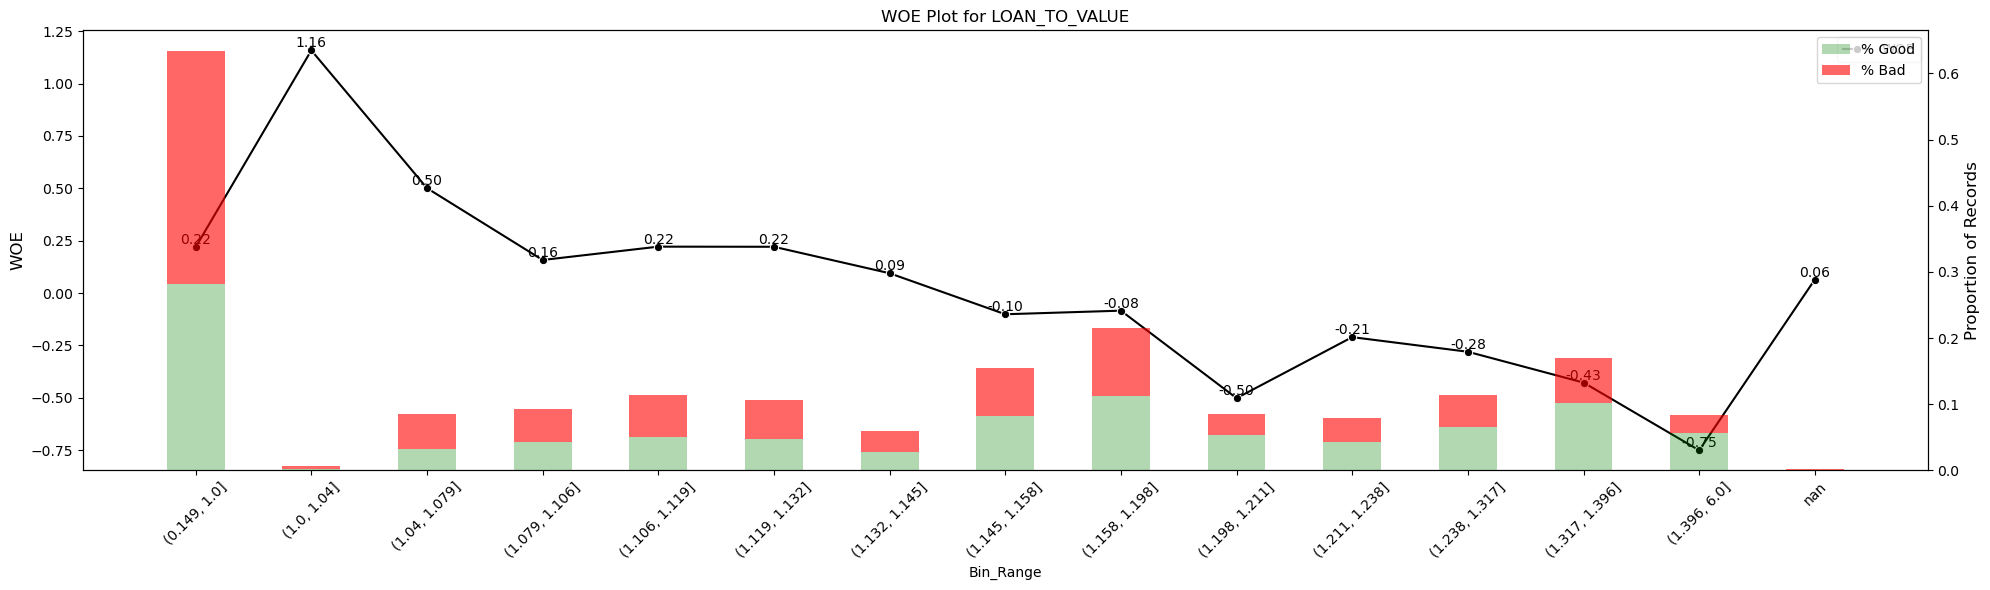


IV for LOAN_TO_VALUE with 3 bins: 0.0222
WOE values per Bin_Range:
  (1.0, 6.0]: WOE = -0.101539
  nan: WOE = 0.064642
  (-0.001, 1.0]: WOE = 0.219235
IV for LOAN_TO_VALUE with 3 bins: 0.0222


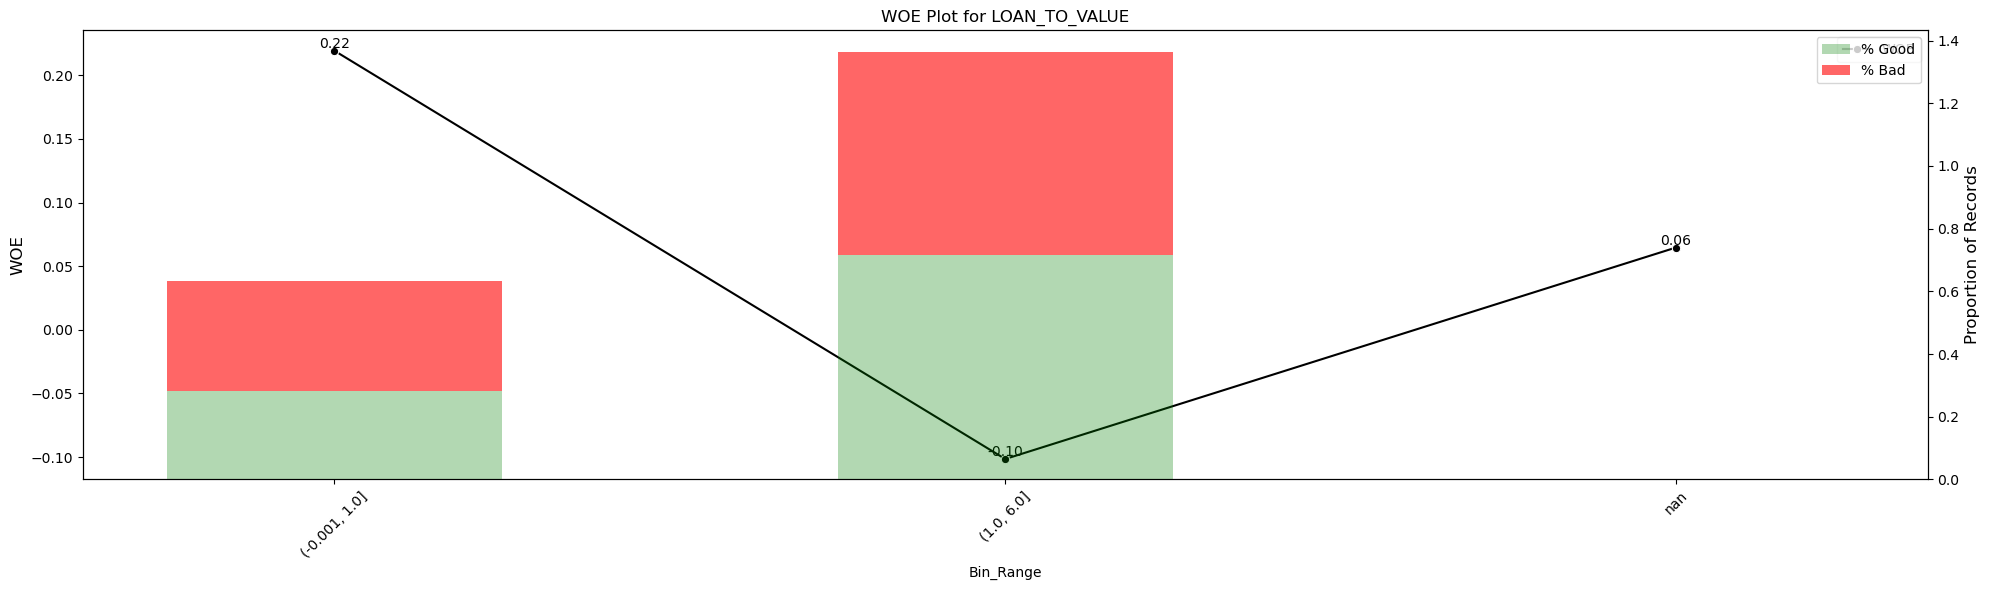

In [23]:
plot_numeric_woe(df, 'LOAN_TO_VALUE', 20)
plot_numeric_woe_manual(df, 'LOAN_TO_VALUE', [0,1,6])

IV for RATIO_LIFE_EMPLOYED with 20 bins: 0.0883


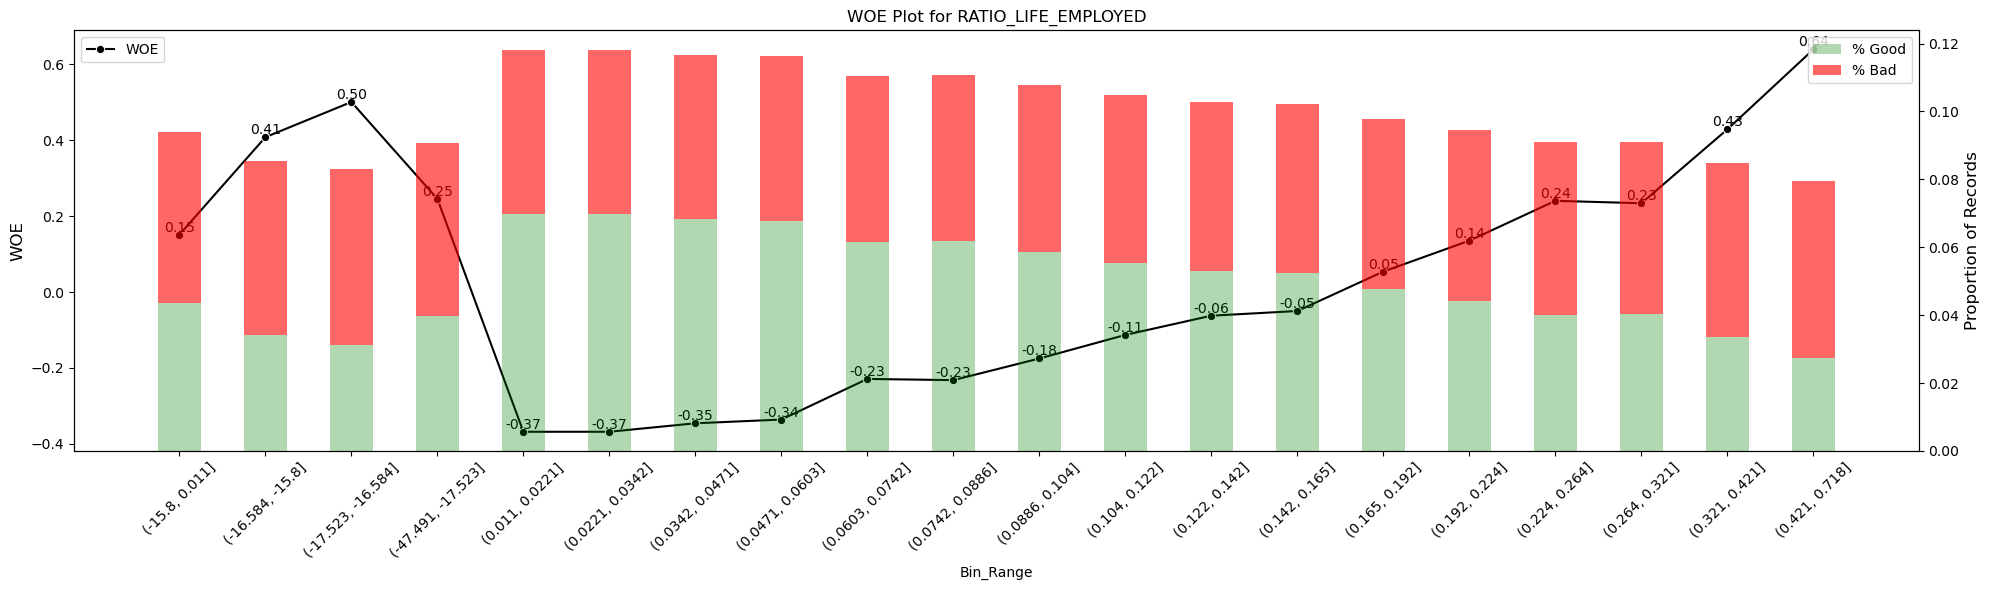


IV for RATIO_LIFE_EMPLOYED with 5 bins: 0.085
WOE values per Bin_Range:
  (0.0, 0.1]: WOE = -0.292114
  (0.1, 0.2]: WOE = -0.043307
  (0.2, 0.3]: WOE = 0.220441
  (-47.001, 0.0]: WOE = 0.391251
  nan: WOE = 0.475725
IV for RATIO_LIFE_EMPLOYED with 5 bins: 0.085


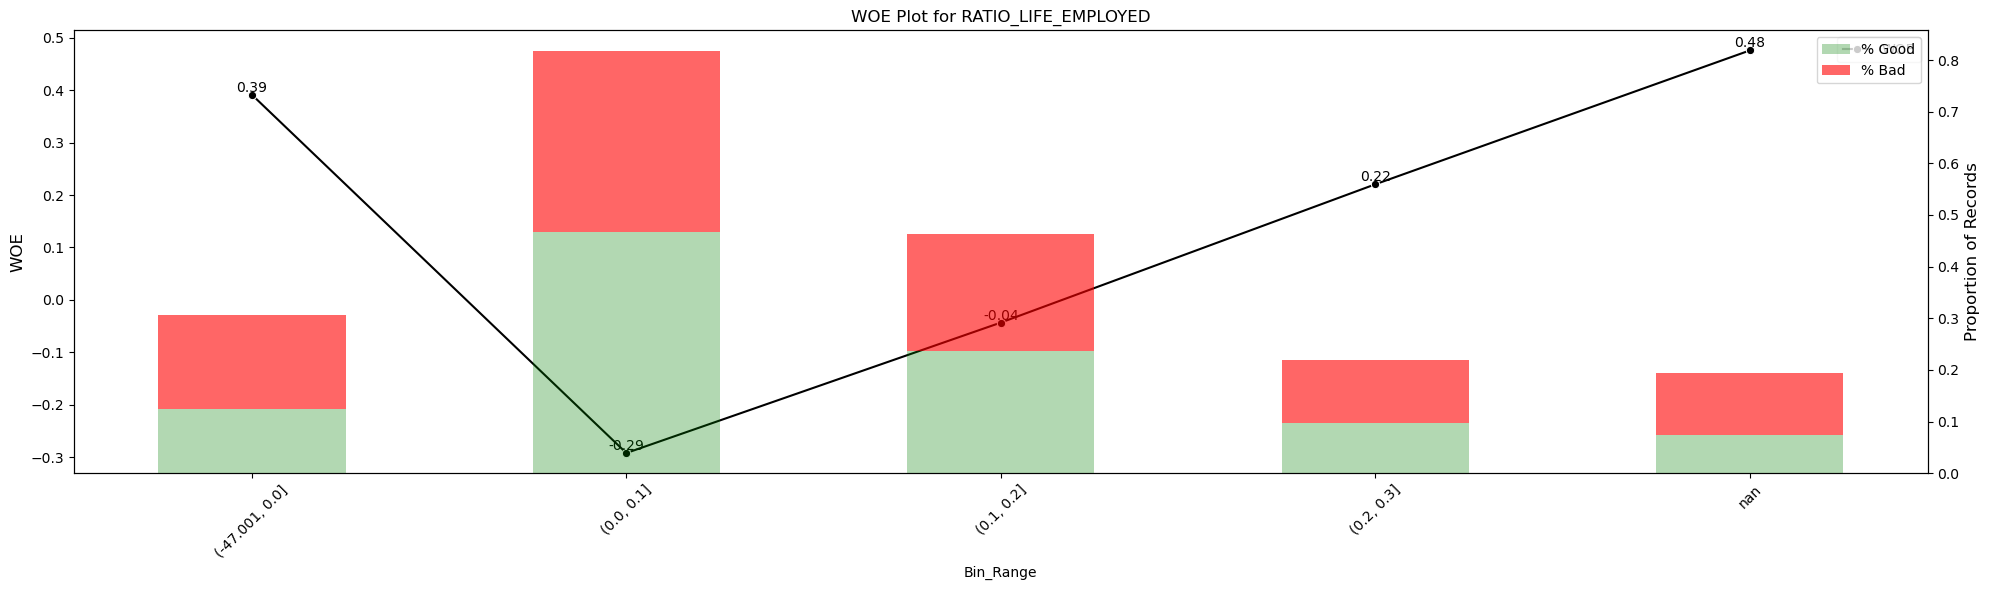

In [52]:
plot_numeric_woe(df, 'RATIO_LIFE_EMPLOYED', 20)
plot_numeric_woe_manual(df, 'RATIO_LIFE_EMPLOYED', [-47,0, 0.1, 0.2 ,0.3])

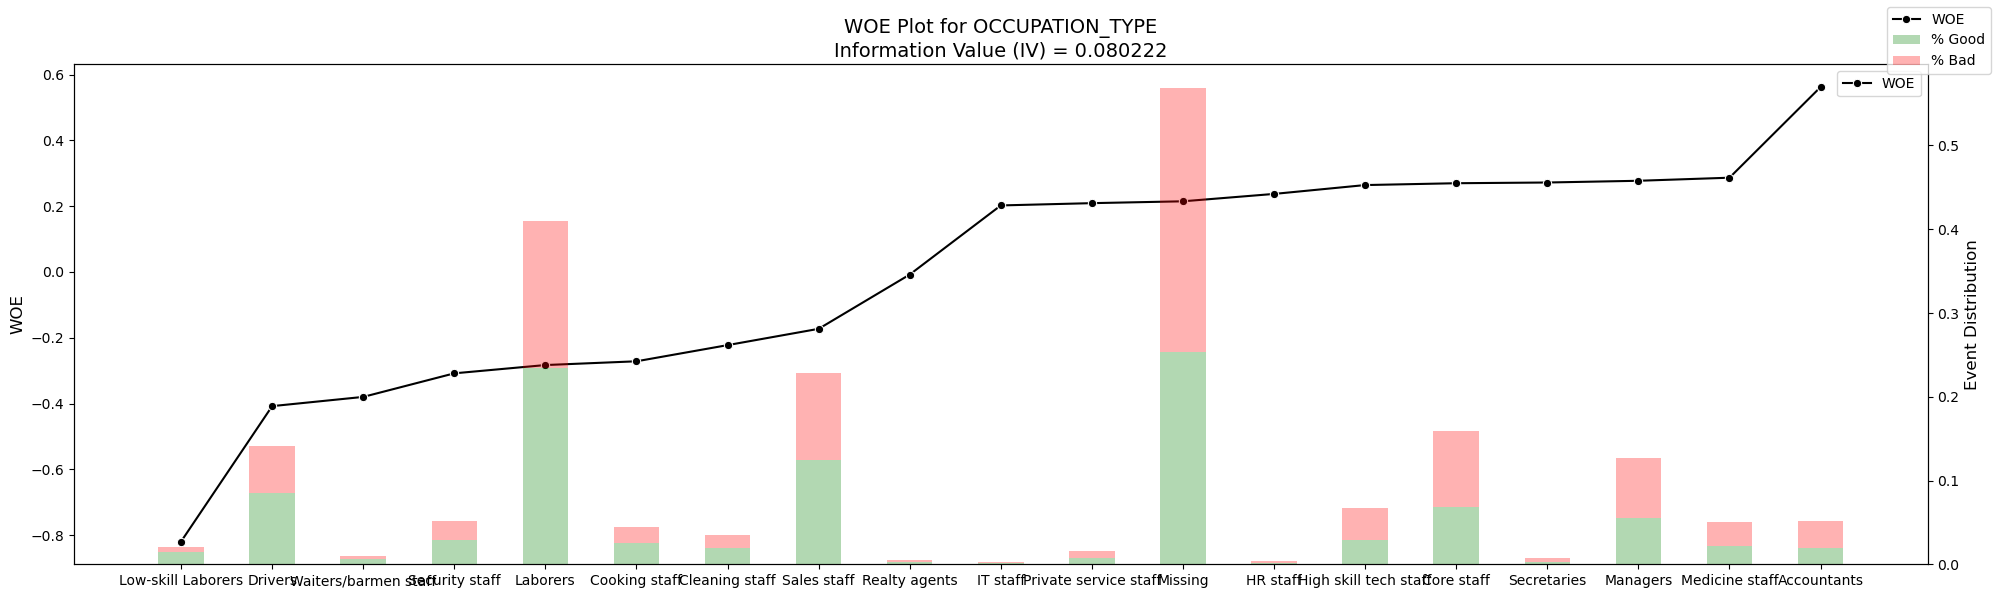

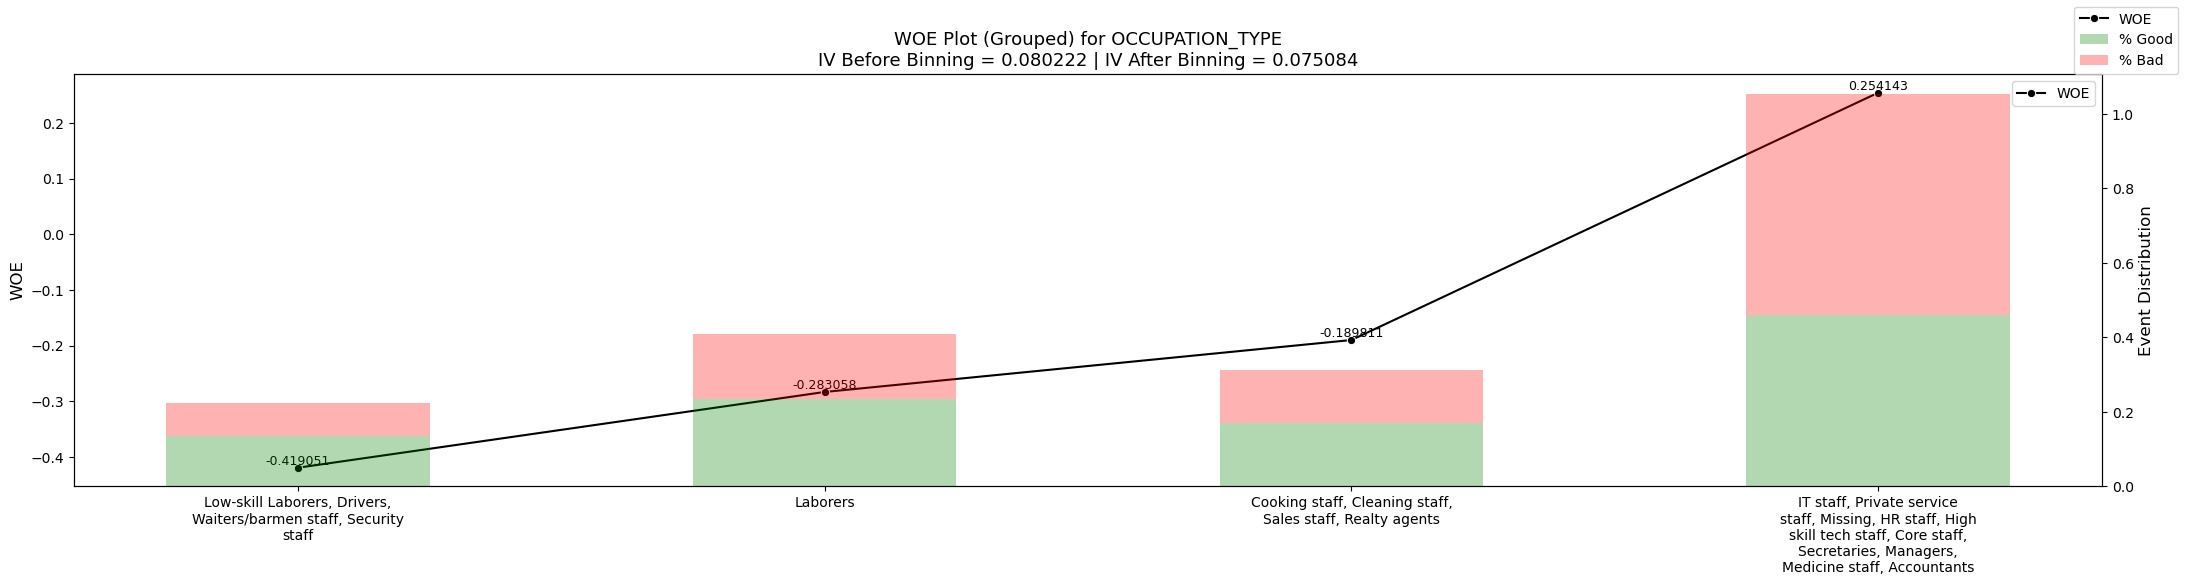


Information Value (IV) Before Binning: 0.080222
Information Value (IV) After Binning:  0.075084

WOE for each grouped bin:
Group 1:
  Categories: Low-skill Laborers, Drivers, Waiters/barmen staff, Security staff
  WOE: -0.419051

Group 2:
  Categories: Laborers
  WOE: -0.283058

Group 3:
  Categories: Cooking staff, Cleaning staff, Sales staff, Realty agents
  WOE: -0.189811

Group 4:
  Categories: IT staff, Private service staff, Missing, HR staff, High skill tech staff, Core staff, Secretaries, Managers, Medicine staff, Accountants
  WOE: 0.254143



In [59]:
woe_iv_plot_categorical(df, "OCCUPATION_TYPE", target_name='TARGET')
woe_iv_plot_categorical_manual(df, "OCCUPATION_TYPE", [0,4,5,9,19], target_name='TARGET')

IV for DAYS_CREDIT_min with 21 bins: 0.0786


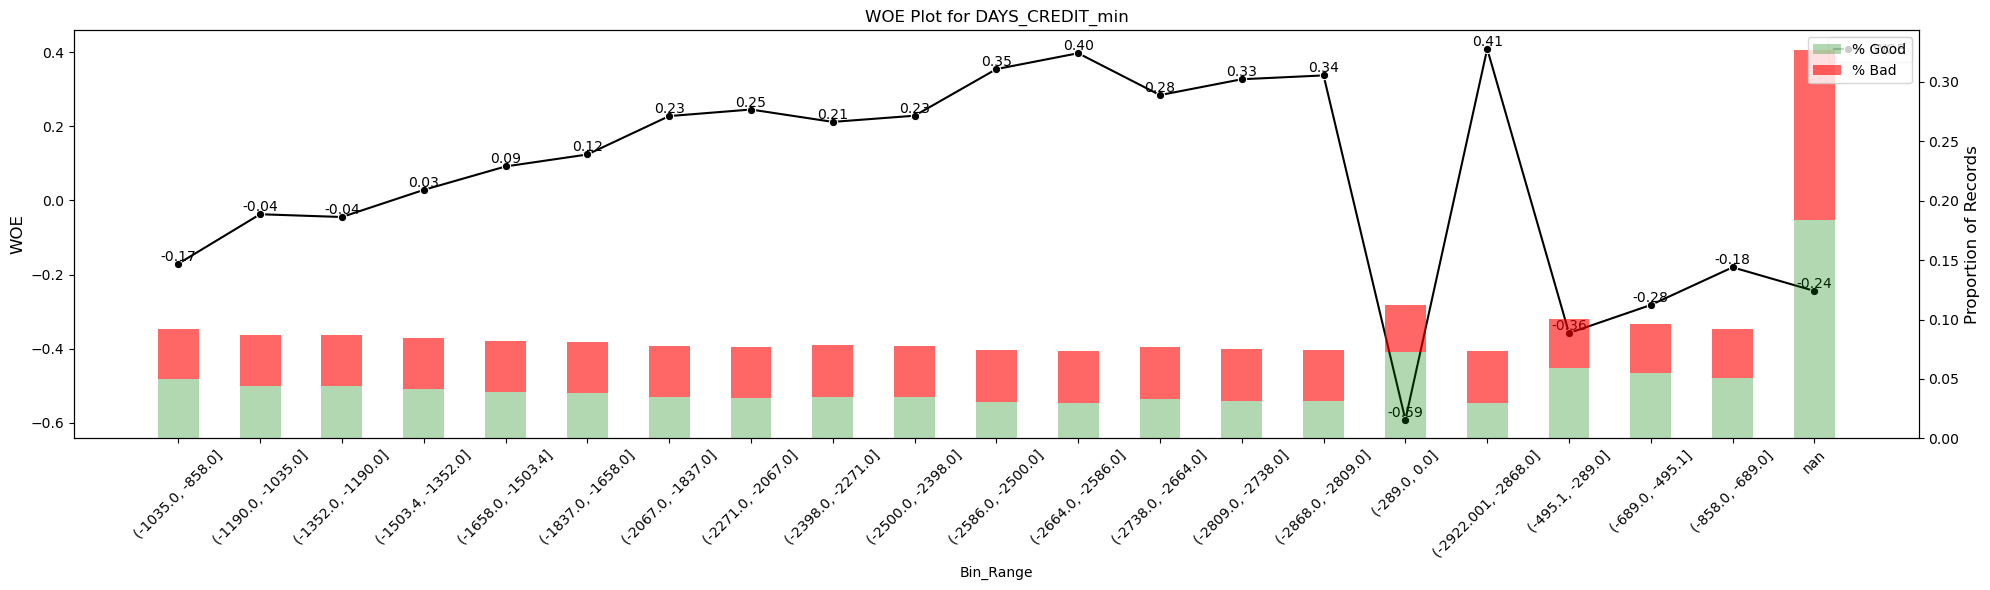


IV for DAYS_CREDIT_min with 5 bins: 0.0638
WOE values per Bin_Range:
  (-1000.0, -200.0]: WOE = -0.285150
  nan: WOE = -0.259792
  (-1500.0, -1000.0]: WOE = -0.025217
  (-2500.0, -1500.0]: WOE = 0.186869
  (-2900.001, -2500.0]: WOE = 0.346265
IV for DAYS_CREDIT_min with 5 bins: 0.0638


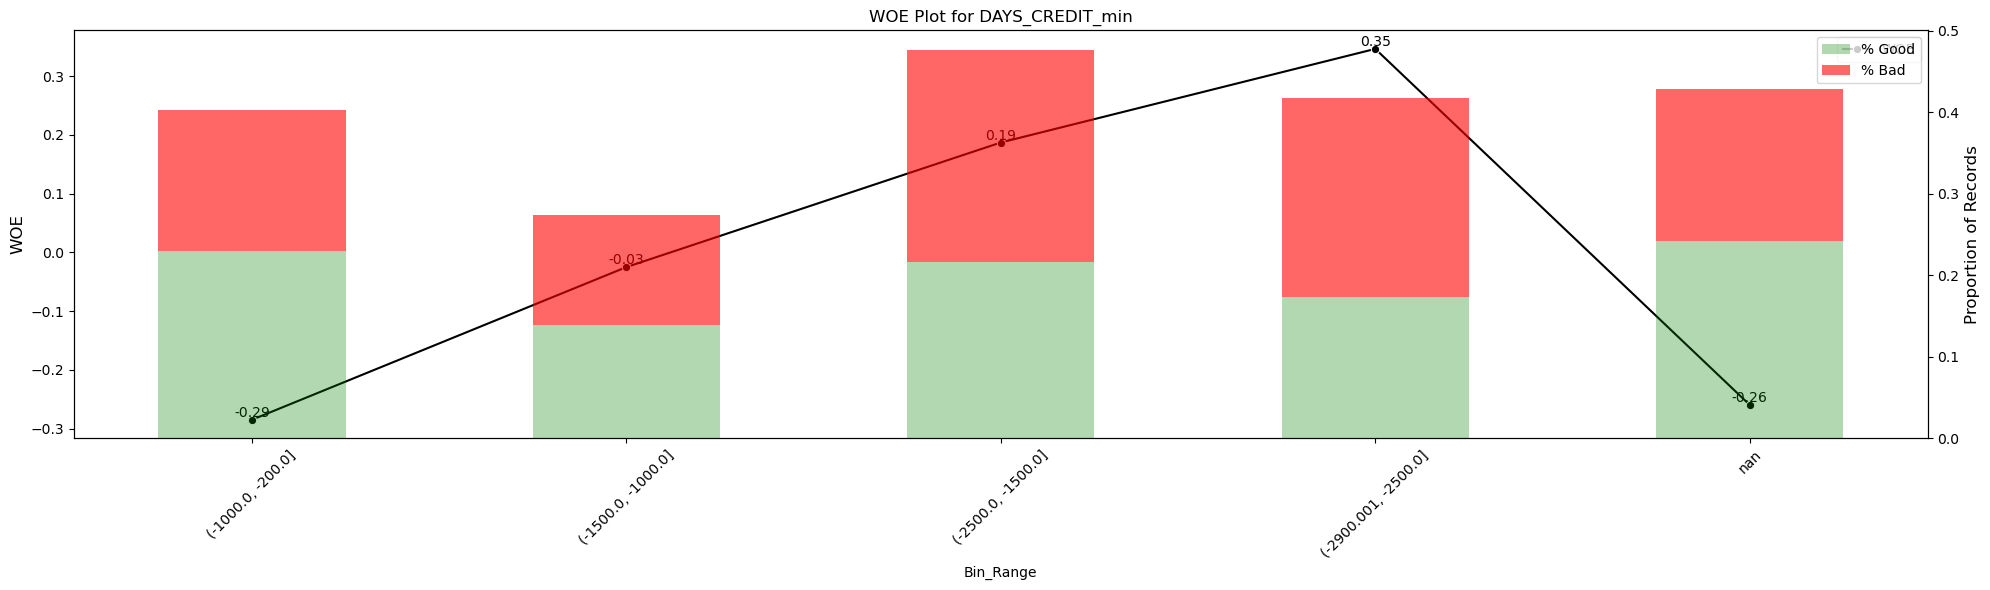

In [24]:
plot_numeric_woe(df, 'DAYS_CREDIT_min', 20)
plot_numeric_woe_manual(df, 'DAYS_CREDIT_min', [-2900,-2500,-1500, -1000, -200])

IV for DAYS_CREDIT_ENDDATE_mean with 21 bins: 0.0755


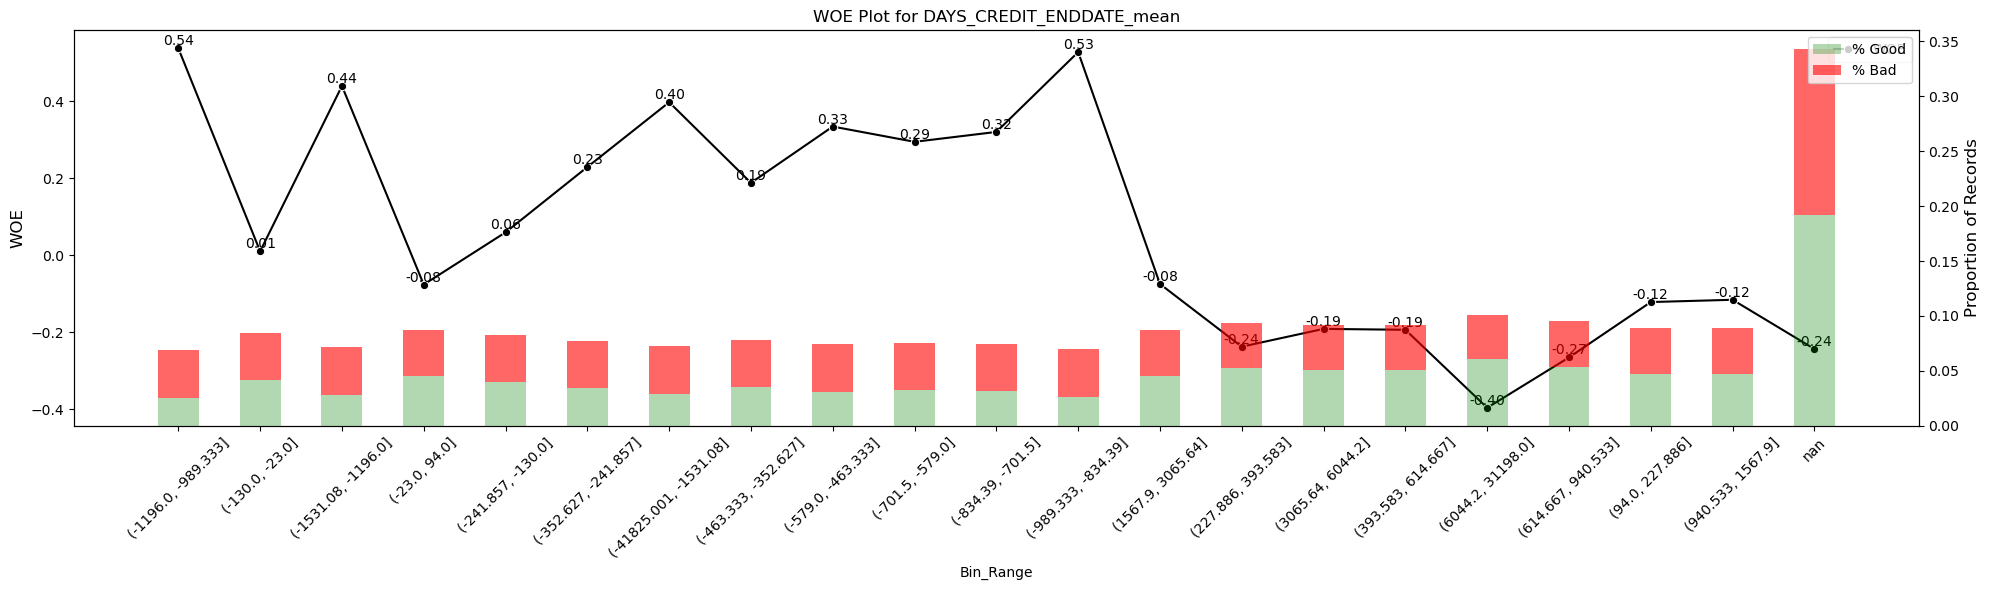


IV for DAYS_CREDIT_ENDDATE_mean with 5 bins: 0.0704
WOE values per Bin_Range:
  nan: WOE = -0.243888
  (200.0, 32000.0]: WOE = -0.217048
  (-200.0, 200.0]: WOE = -0.038531
  (-500.0, -200.0]: WOE = 0.216521
  (-41800.001, -500.0]: WOE = 0.406606
IV for DAYS_CREDIT_ENDDATE_mean with 5 bins: 0.0704


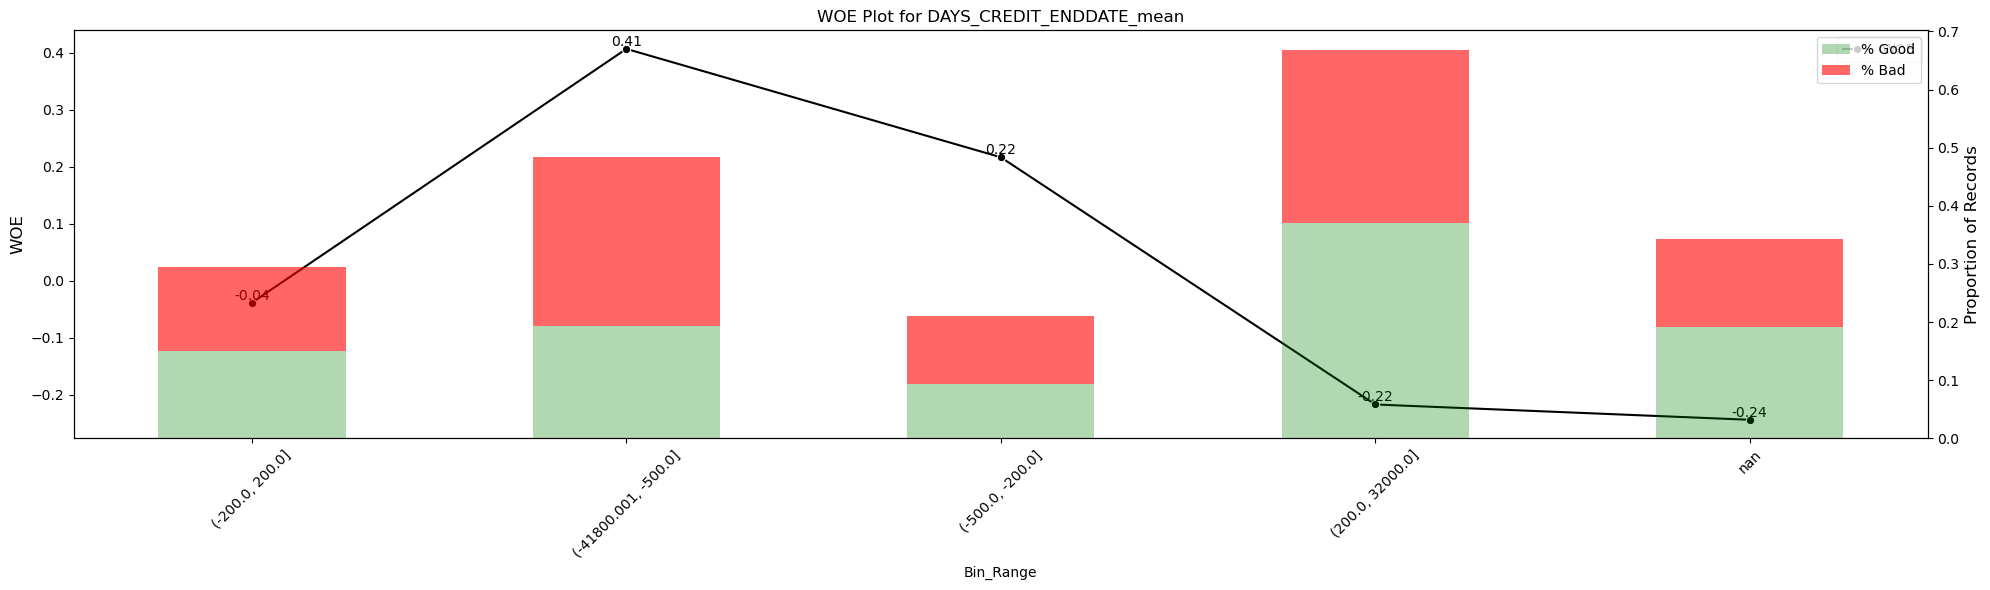

In [149]:
plot_numeric_woe(df, 'DAYS_CREDIT_ENDDATE_mean', 20)
plot_numeric_woe_manual(df, 'DAYS_CREDIT_ENDDATE_mean', [-41800,-500,-200, 200, 32000])

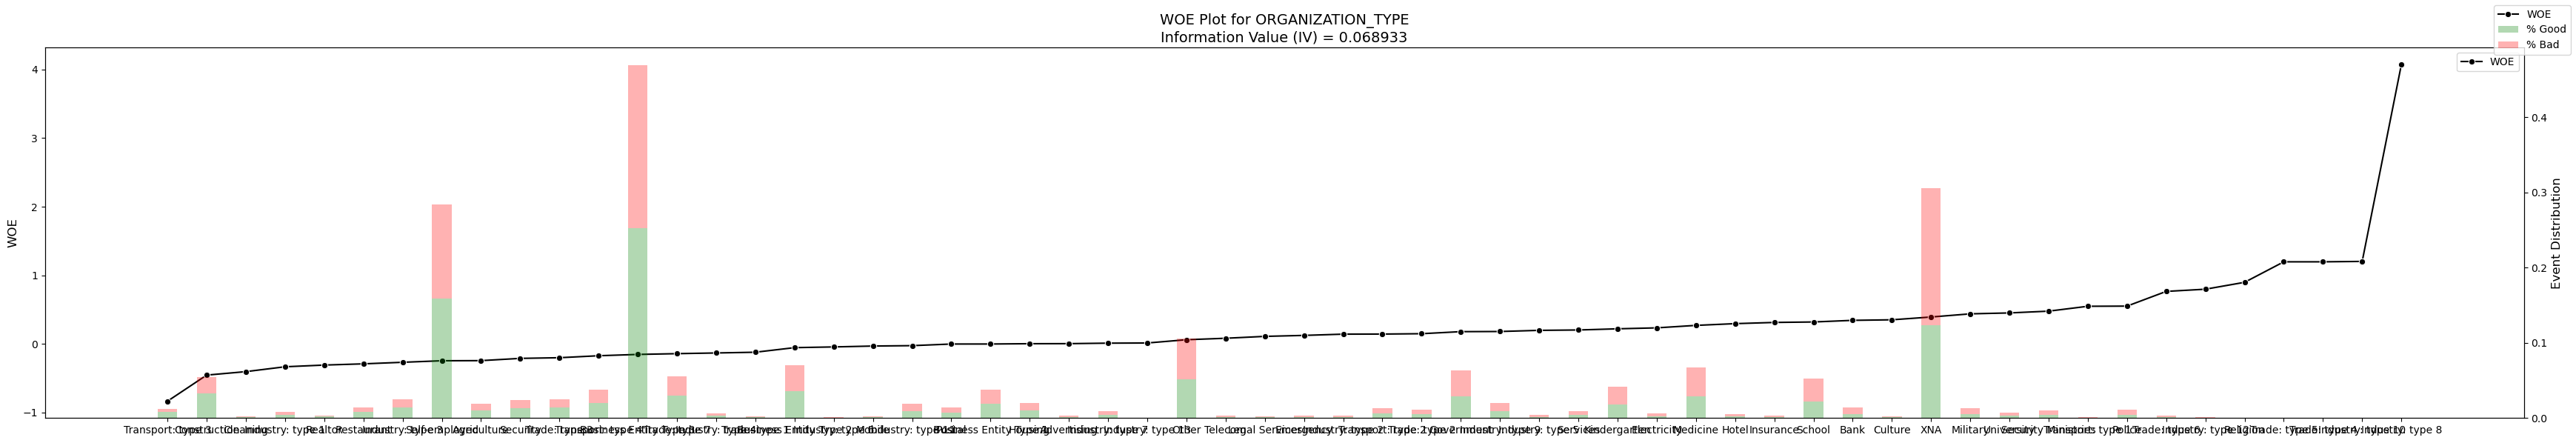

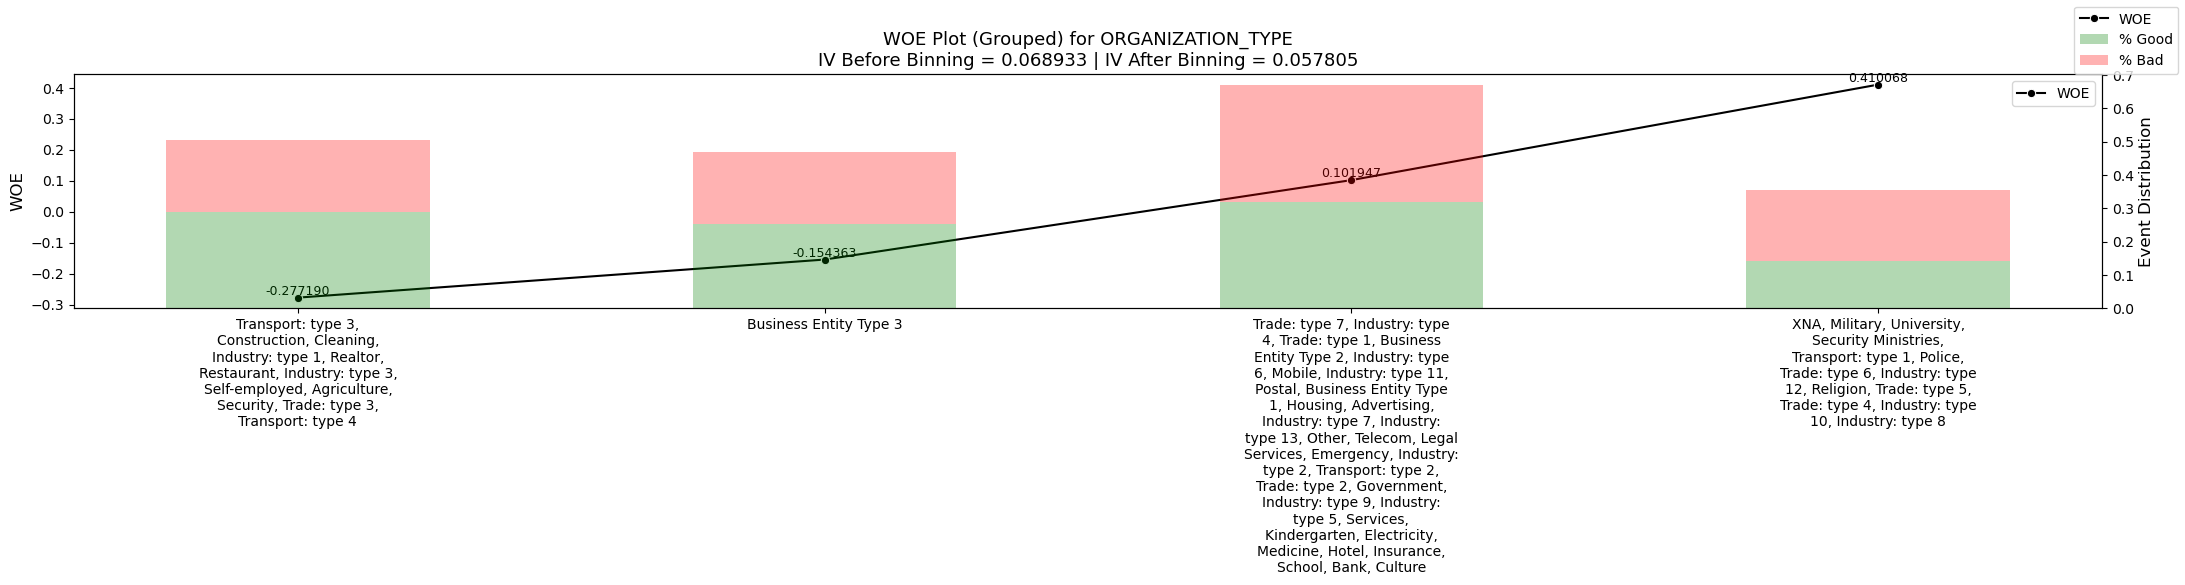


Information Value (IV) Before Binning: 0.068933
Information Value (IV) After Binning:  0.057805

WOE for each grouped bin:
Group 1:
  Categories: Transport: type 3, Construction, Cleaning, Industry: type 1, Realtor, Restaurant, Industry: type 3, Self-employed, Agriculture, Security, Trade: type 3, Transport: type 4
  WOE: -0.277190

Group 2:
  Categories: Business Entity Type 3
  WOE: -0.154363

Group 3:
  Categories: Trade: type 7, Industry: type 4, Trade: type 1, Business Entity Type 2, Industry: type 6, Mobile, Industry: type 11, Postal, Business Entity Type 1, Housing, Advertising, Industry: type 7, Industry: type 13, Other, Telecom, Legal Services, Emergency, Industry: type 2, Transport: type 2, Trade: type 2, Government, Industry: type 9, Industry: type 5, Services, Kindergarten, Electricity, Medicine, Hotel, Insurance, School, Bank, Culture
  WOE: 0.101947

Group 4:
  Categories: XNA, Military, University, Security Ministries, Transport: type 1, Police, Trade: type 6, Industry:

In [27]:
woe_iv_plot_categorical(df, "ORGANIZATION_TYPE", target_name='TARGET')
woe_iv_plot_categorical_manual(df, "ORGANIZATION_TYPE", [0,12,13,45,60], target_name='TARGET')

IV for AMT_CREDIT_SUM_DEBT_mean with 17 bins: 0.0541


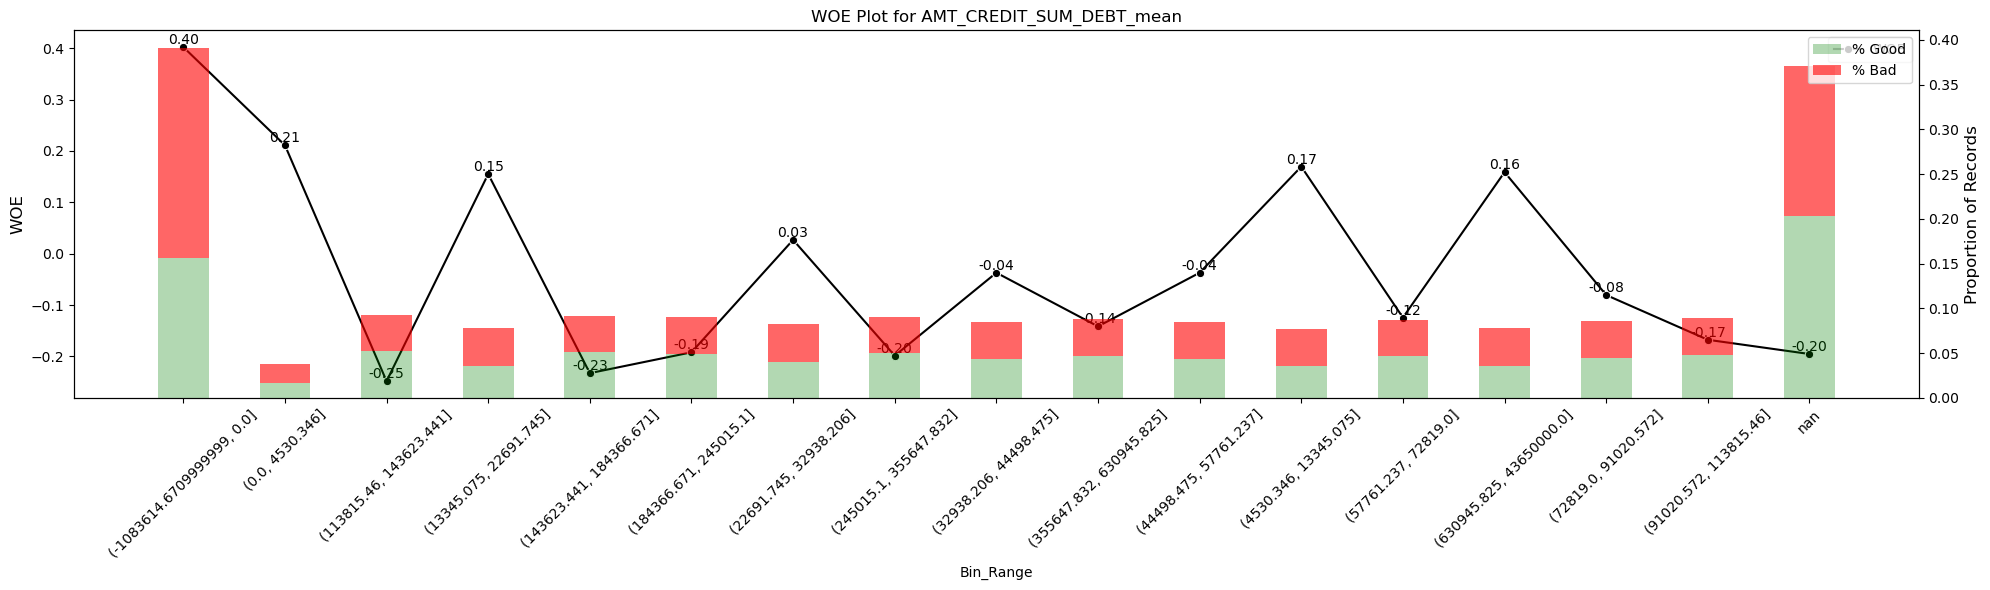


IV for AMT_CREDIT_SUM_DEBT_mean with 3 bins: 0.0436
WOE values per Bin_Range:
  nan: WOE = -0.167258
  (2000.0, 120000.0]: WOE = -0.016294
  (-2000000.001, 2000.0]: WOE = 0.393519
IV for AMT_CREDIT_SUM_DEBT_mean with 3 bins: 0.0436


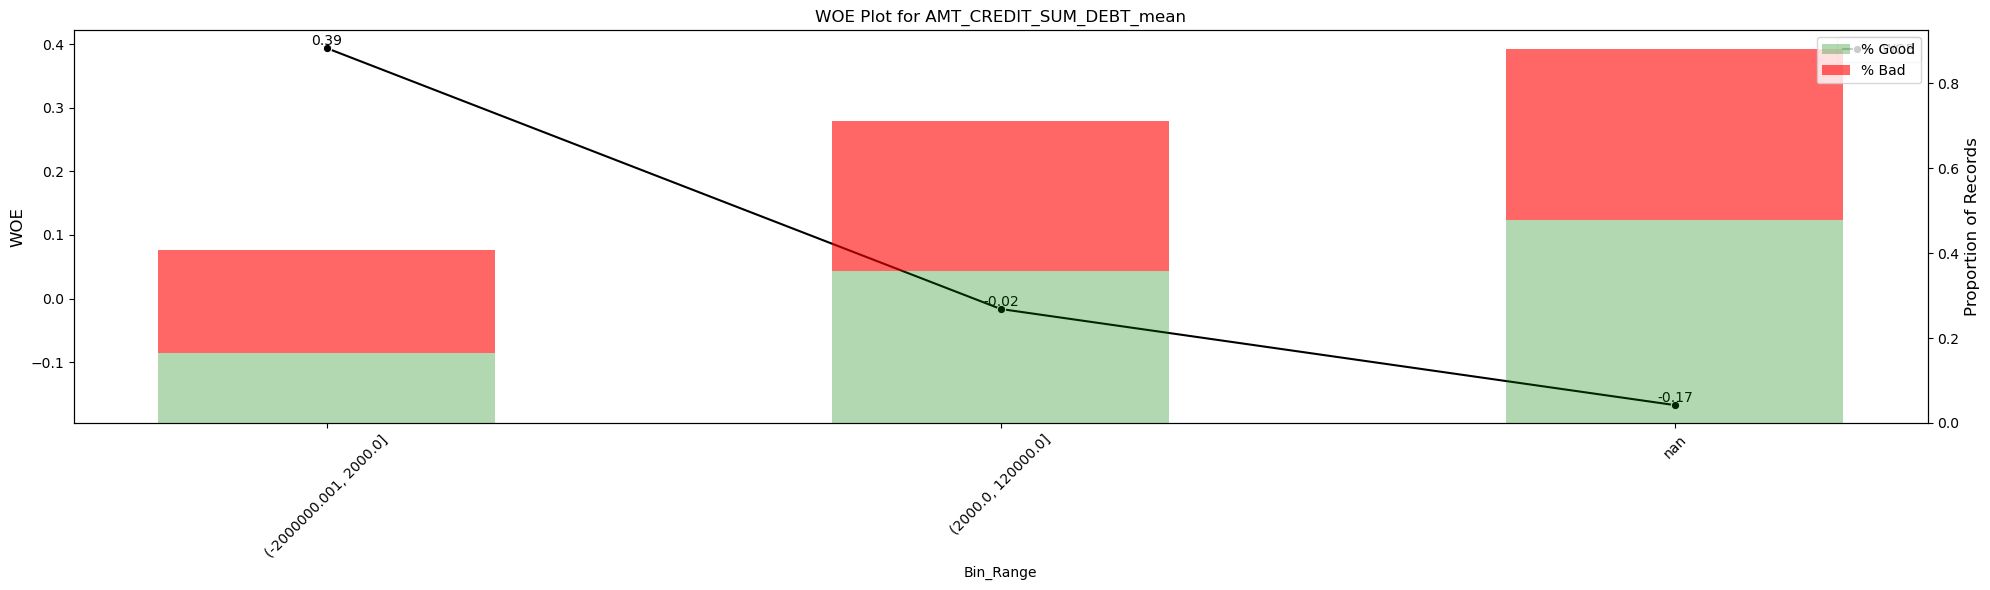

In [40]:
plot_numeric_woe(df, 'AMT_CREDIT_SUM_DEBT_mean', 20)
plot_numeric_woe_manual(df, 'AMT_CREDIT_SUM_DEBT_mean', [-2000000,2000, 120000])
# why are the ranges so weird? what does this even mean

IV for CREDIT_ACTIVE_Active with 7 bins: 0.0536


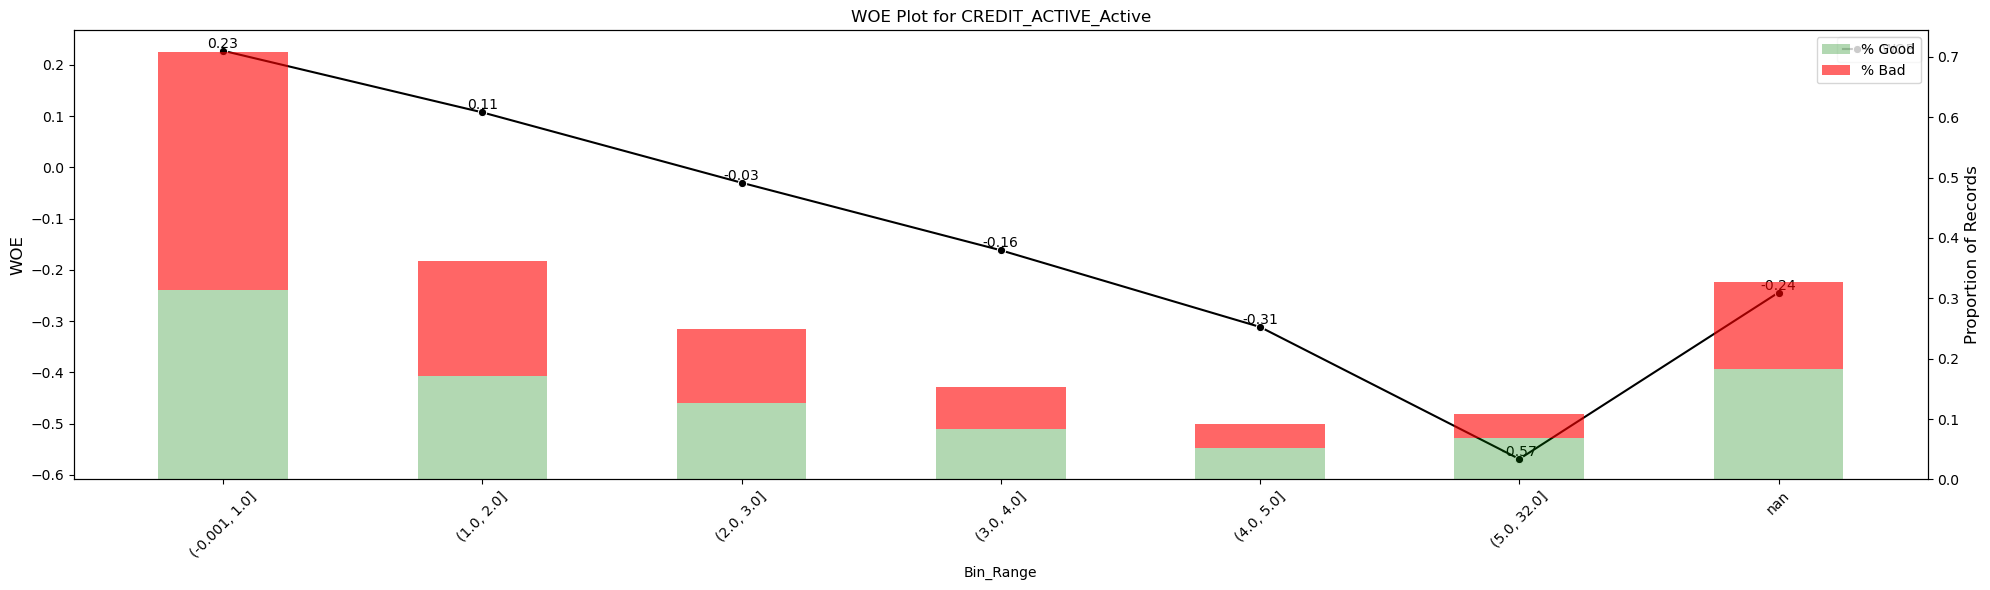


IV for CREDIT_ACTIVE_Active with 4 bins: 0.0469
WOE values per Bin_Range:
  (3.0, 32.0]: WOE = -0.322140
  nan: WOE = -0.244067
  (1.0, 3.0]: WOE = 0.051390
  (-0.001, 1.0]: WOE = 0.227726
IV for CREDIT_ACTIVE_Active with 4 bins: 0.0469


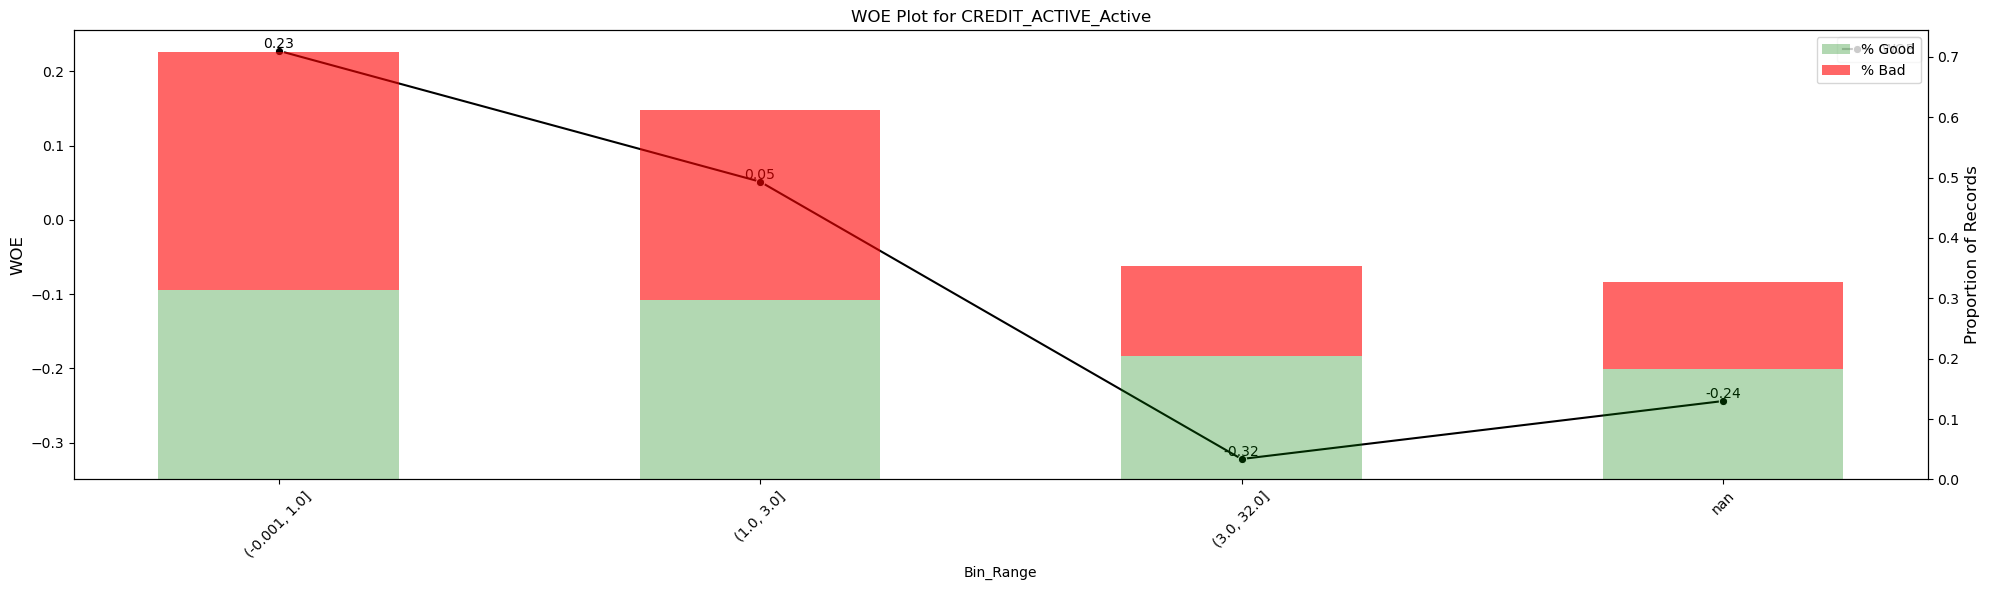

In [68]:
# df.info()
plot_numeric_woe(df, 'CREDIT_ACTIVE_Active', 20)
plot_numeric_woe_manual(df, 'CREDIT_ACTIVE_Active', [0,1,3,32])

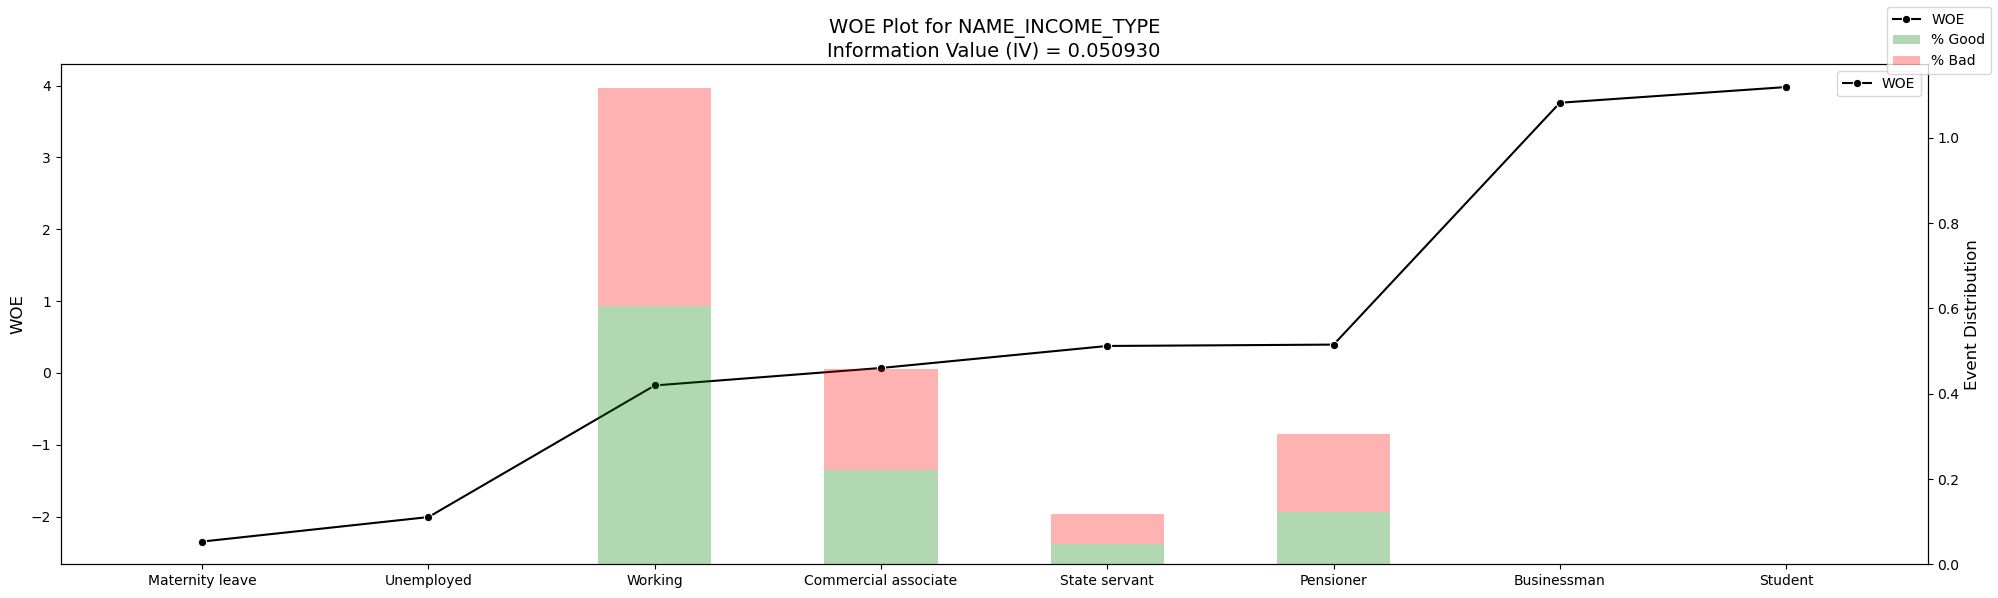

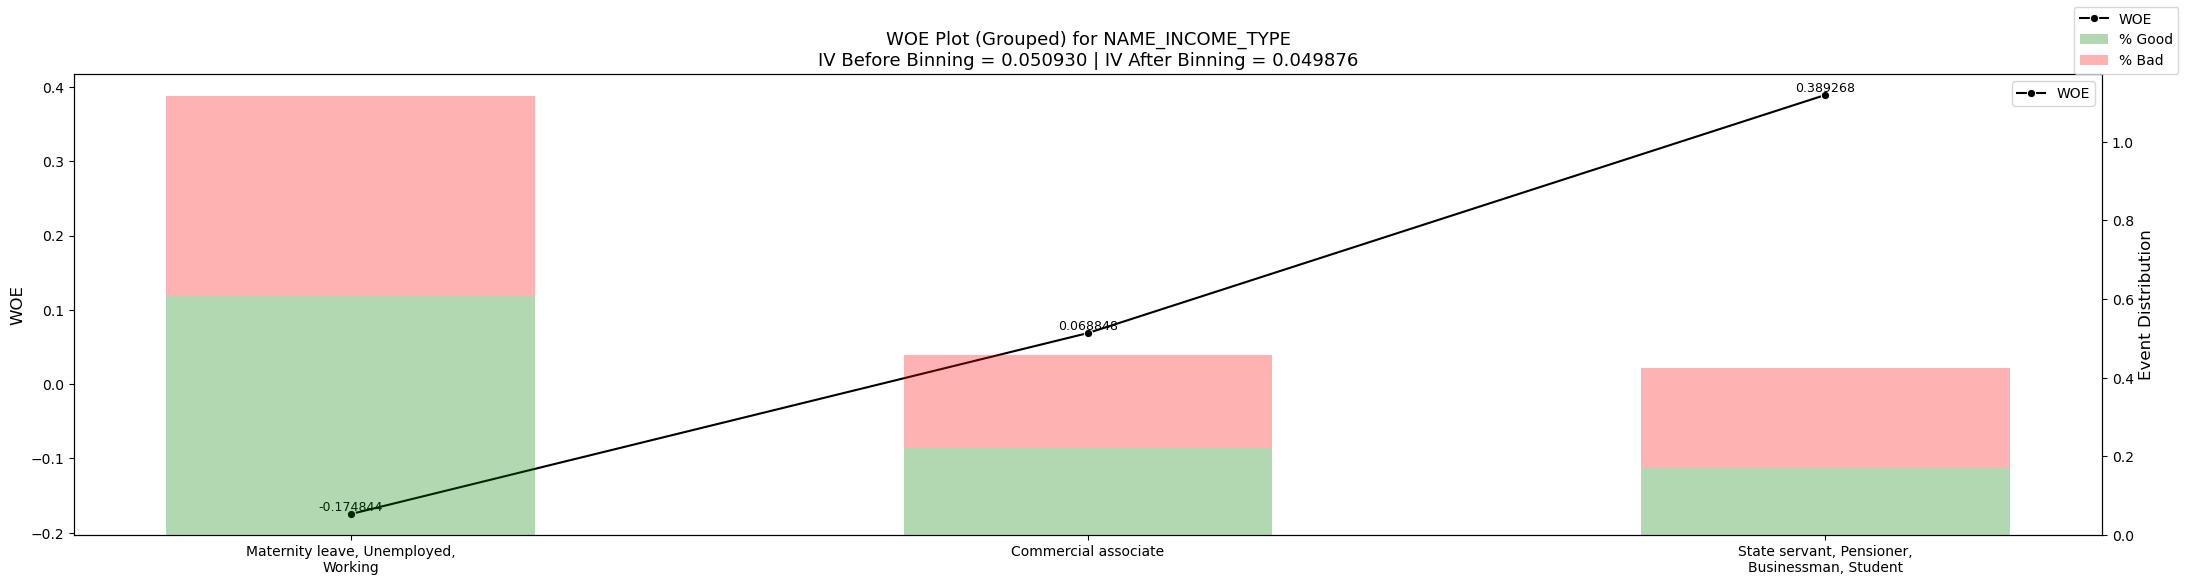


Information Value (IV) Before Binning: 0.050930
Information Value (IV) After Binning:  0.049876

WOE for each grouped bin:
Group 1:
  Categories: Maternity leave, Unemployed, Working
  WOE: -0.174844

Group 2:
  Categories: Commercial associate
  WOE: 0.068848

Group 3:
  Categories: State servant, Pensioner, Businessman, Student
  WOE: 0.389268



In [70]:
woe_iv_plot_categorical(df, "NAME_INCOME_TYPE", target_name='TARGET')
woe_iv_plot_categorical_manual(df, "NAME_INCOME_TYPE", [0,3,4,8], target_name='TARGET')

IV for DAYS_LAST_PHONE_CHANGE with 19 bins: 0.0486


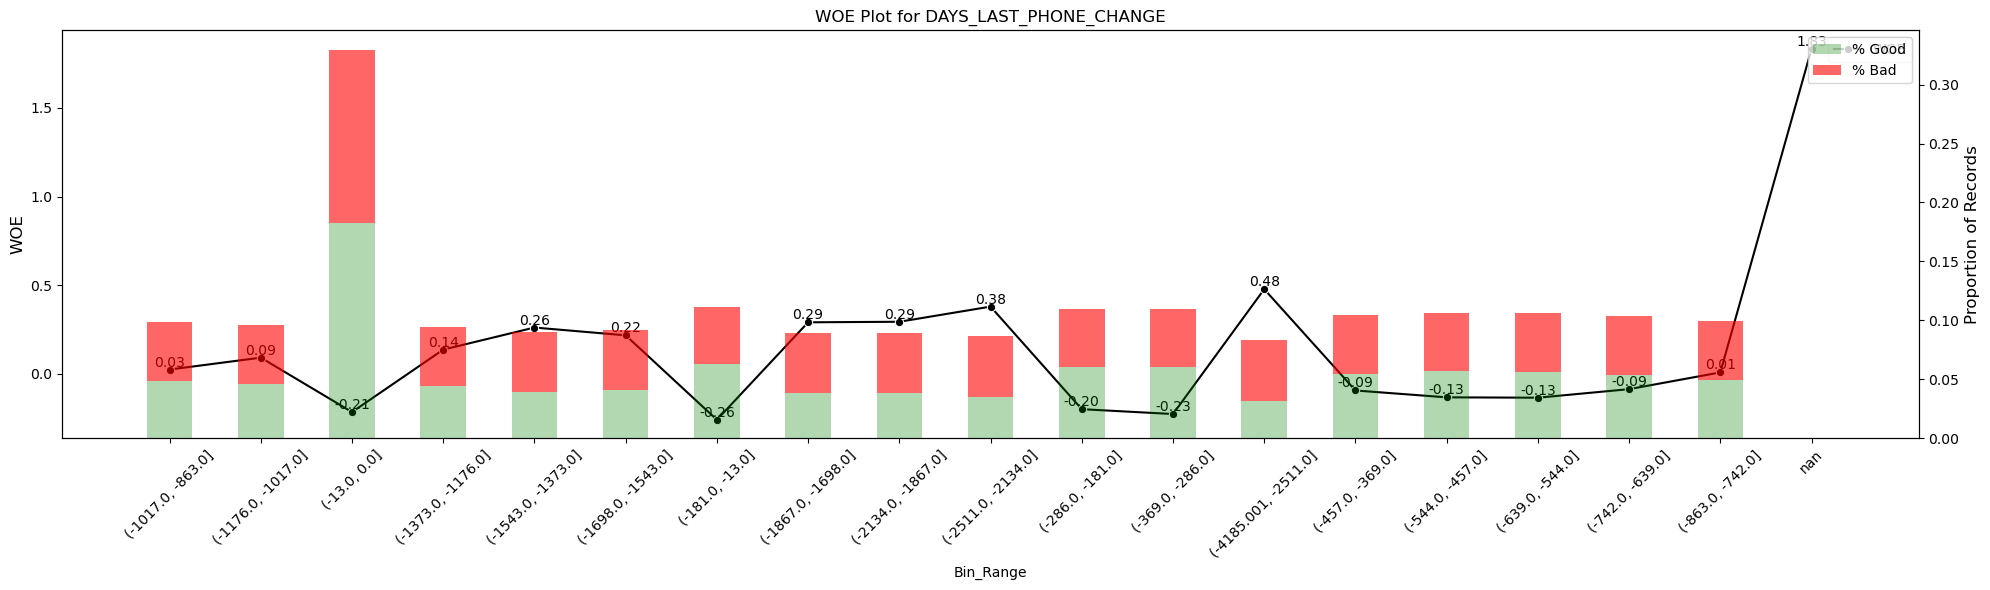


IV for DAYS_LAST_PHONE_CHANGE with 5 bins: 0.0461
WOE values per Bin_Range:
  nan: WOE = -0.209904
  (-750.0, -10.0]: WOE = -0.162374
  (-1400.0, -750.0]: WOE = 0.067069
  (-2100.0, -1400.0]: WOE = 0.265044
  (-4200.001, -2100.0]: WOE = 0.429716
IV for DAYS_LAST_PHONE_CHANGE with 5 bins: 0.0461


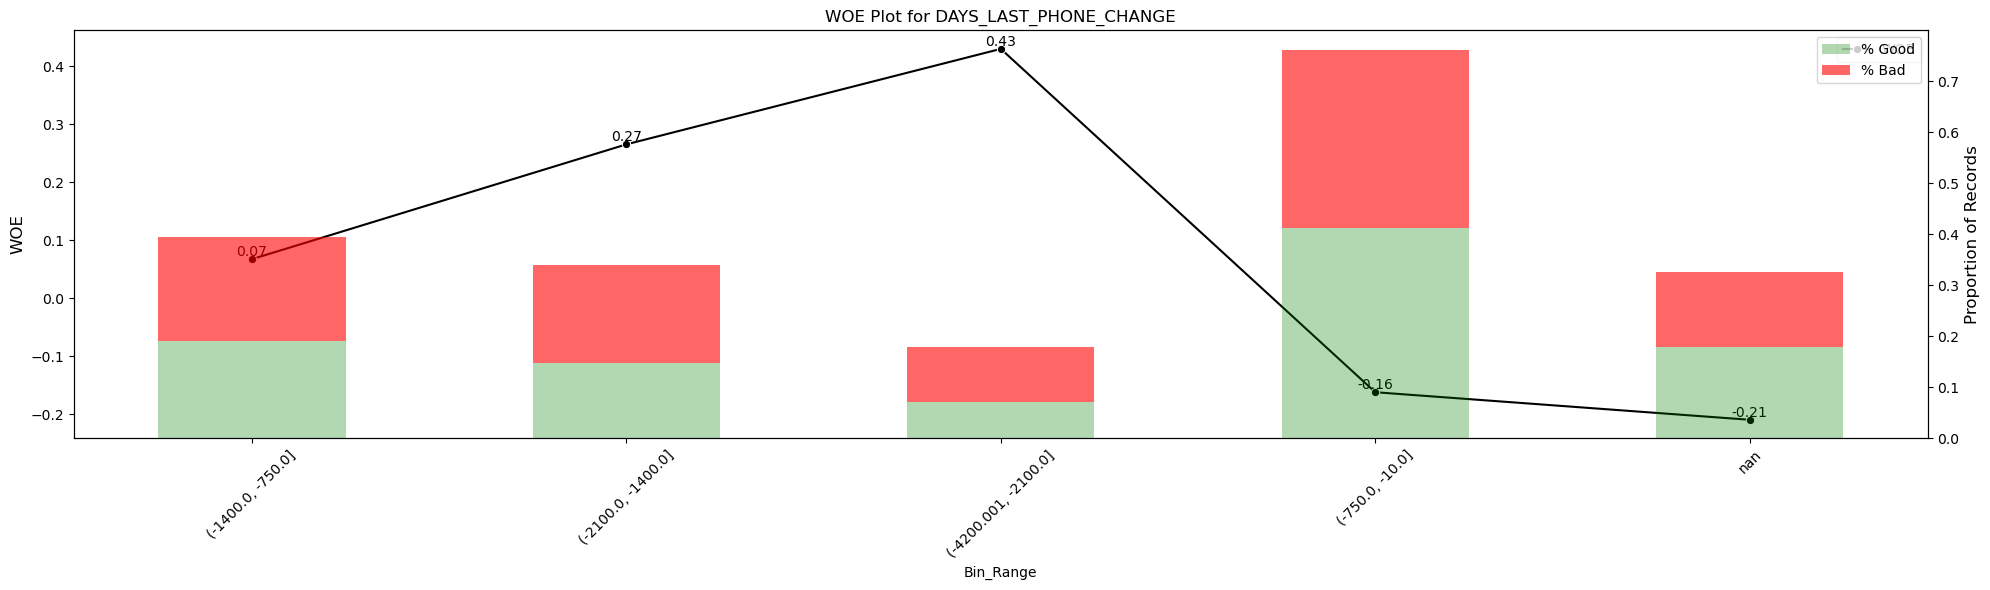

In [69]:
plot_numeric_woe(df, 'DAYS_LAST_PHONE_CHANGE', 20)
plot_numeric_woe_manual(df, 'DAYS_LAST_PHONE_CHANGE', [-4200,-2100, -1400, -750, -10])

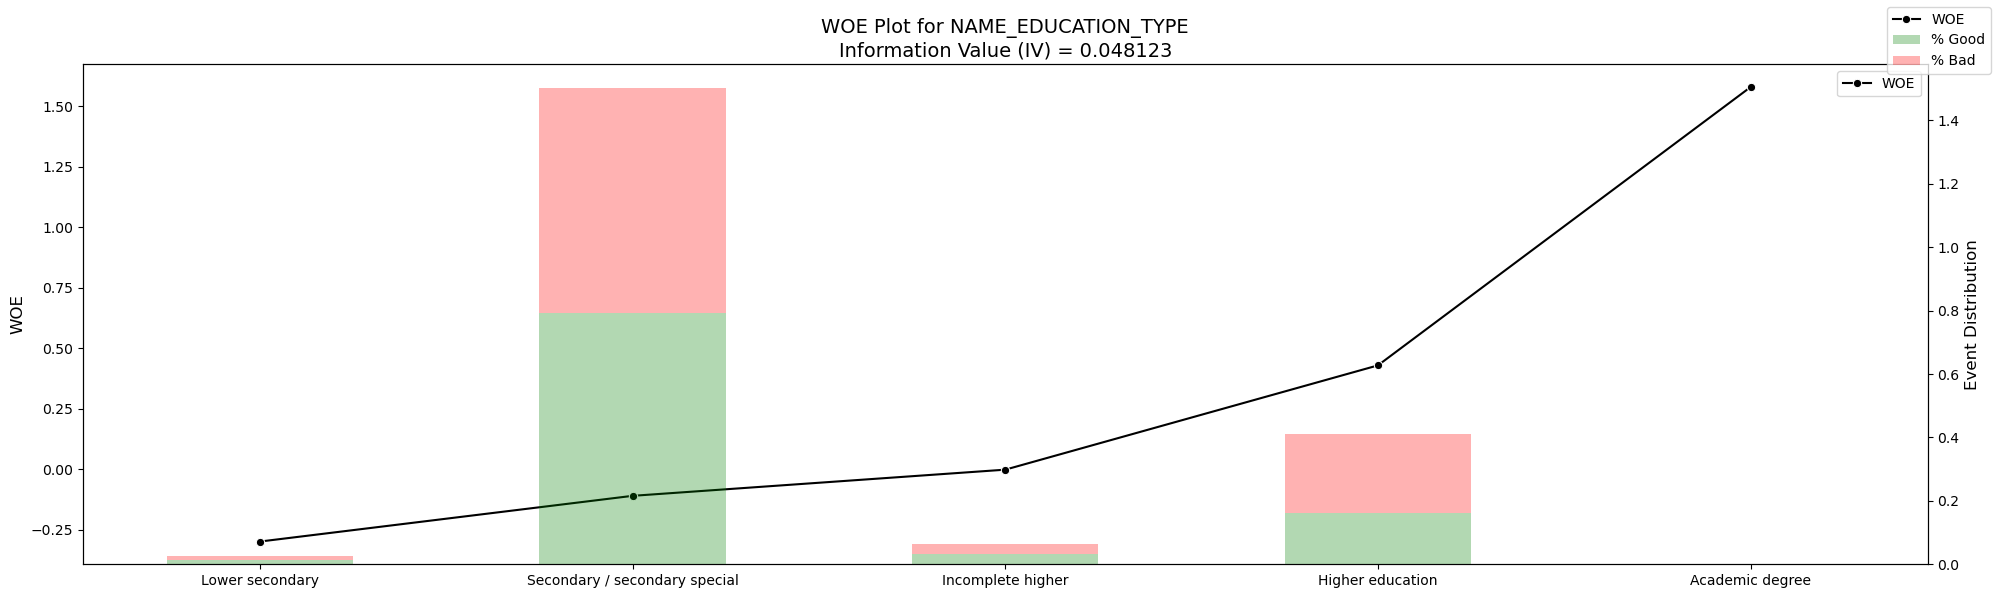

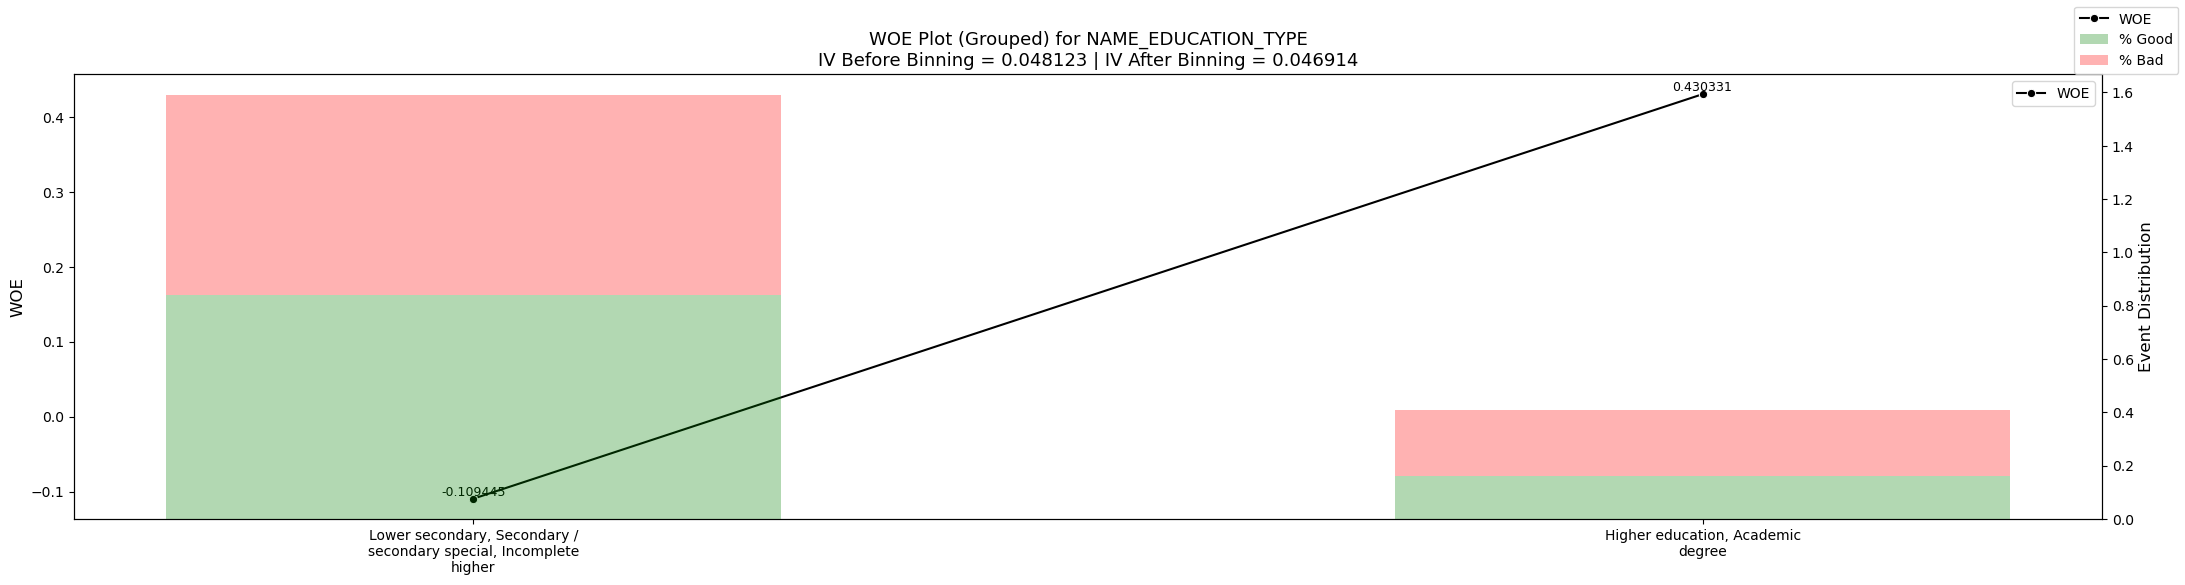


Information Value (IV) Before Binning: 0.048123
Information Value (IV) After Binning:  0.046914

WOE for each grouped bin:
Group 1:
  Categories: Lower secondary, Secondary / secondary special, Incomplete higher
  WOE: -0.109445

Group 2:
  Categories: Higher education, Academic degree
  WOE: 0.430331



In [50]:
woe_iv_plot_categorical(df, "NAME_EDUCATION_TYPE", target_name='TARGET')
woe_iv_plot_categorical_manual(df, "NAME_EDUCATION_TYPE", [0,3,5], target_name='TARGET')

IV for AMT_CREDIT_SUM_DEBT_sum with 17 bins: 0.0479


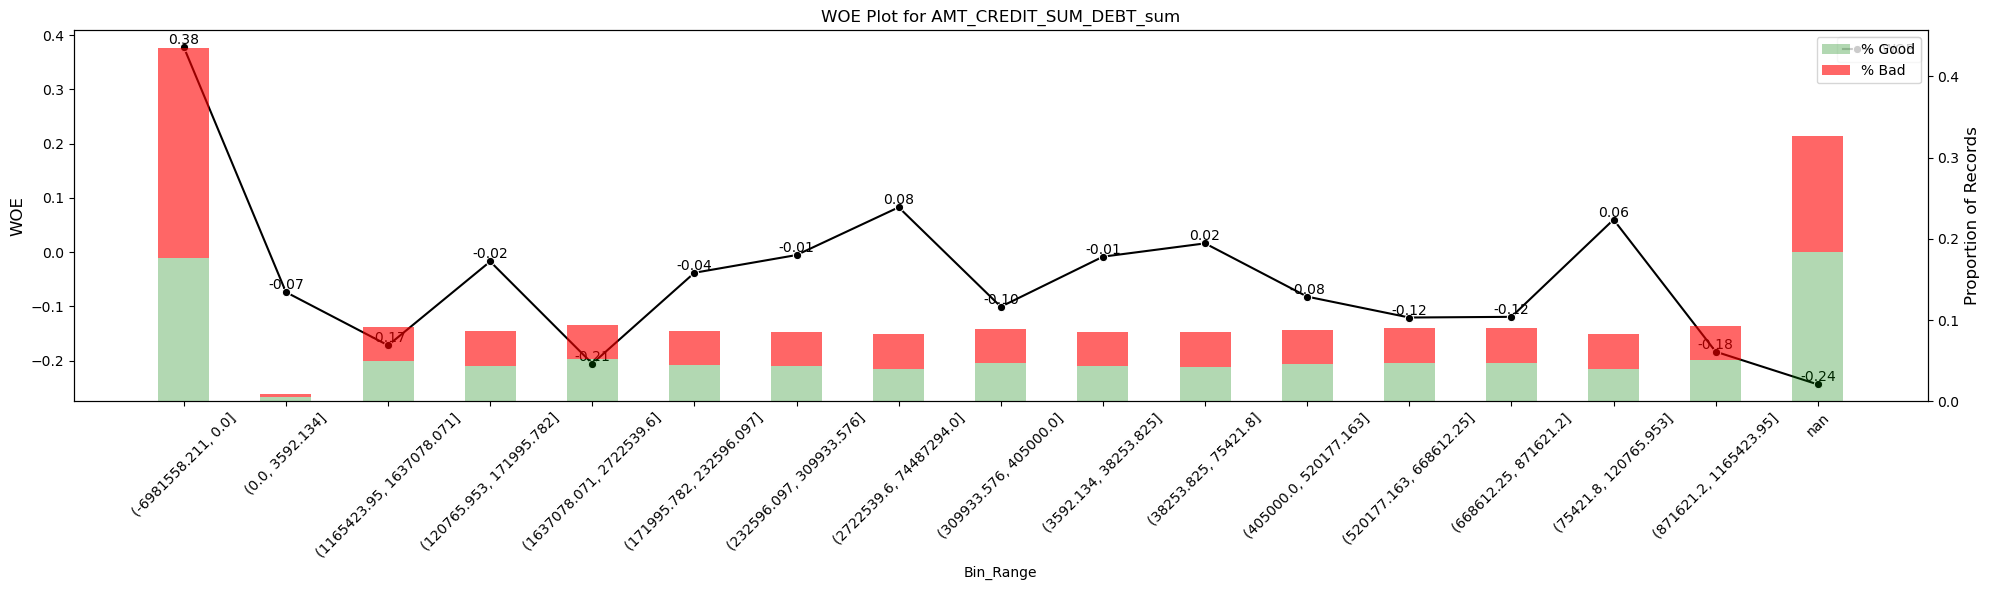


IV for AMT_CREDIT_SUM_DEBT_sum with 4 bins: 0.0437
WOE values per Bin_Range:
  nan: WOE = -0.181634
  (300000.0, 1200000.0]: WOE = -0.120005
  (0.0, 300000.0]: WOE = -0.000157
  (-70000000.001, 0.0]: WOE = 0.378028
IV for AMT_CREDIT_SUM_DEBT_sum with 4 bins: 0.0437


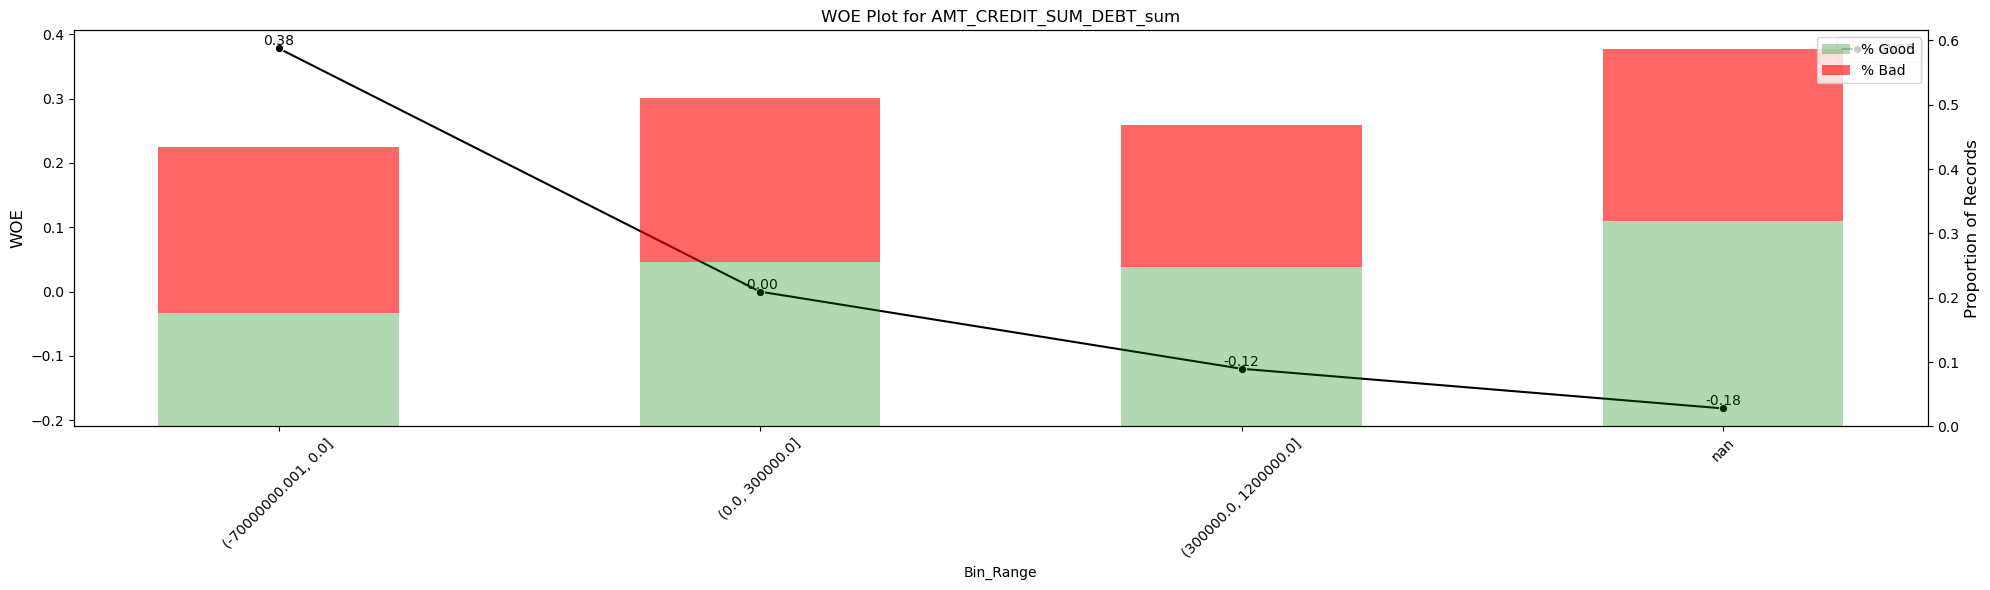

In [39]:

plot_numeric_woe(df, 'AMT_CREDIT_SUM_DEBT_sum', 20)
plot_numeric_woe_manual(df, 'AMT_CREDIT_SUM_DEBT_sum', [-70000000, 0, 300000, 1200000])

IV for REGION_POPULATION_RELATIVE with 20 bins: 0.0402


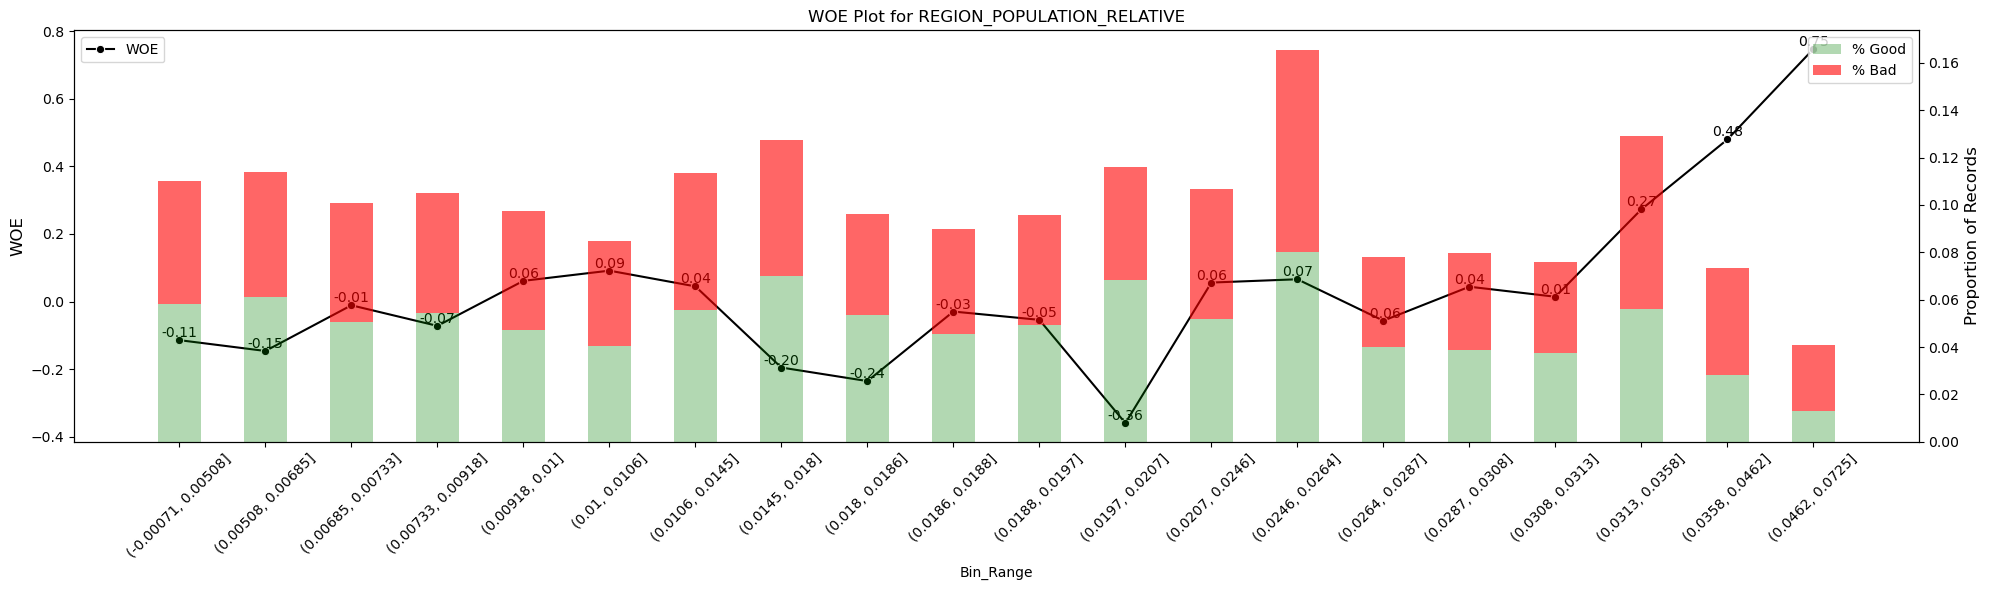


IV for REGION_POPULATION_RELATIVE with 3 bins: 0.0124
WOE values per Bin_Range:
  (-1.001, 0.01]: WOE = -0.079248
  (0.01, 0.05]: WOE = 0.006279
  (0.05, 1.0]: WOE = 0.747108
IV for REGION_POPULATION_RELATIVE with 3 bins: 0.0124


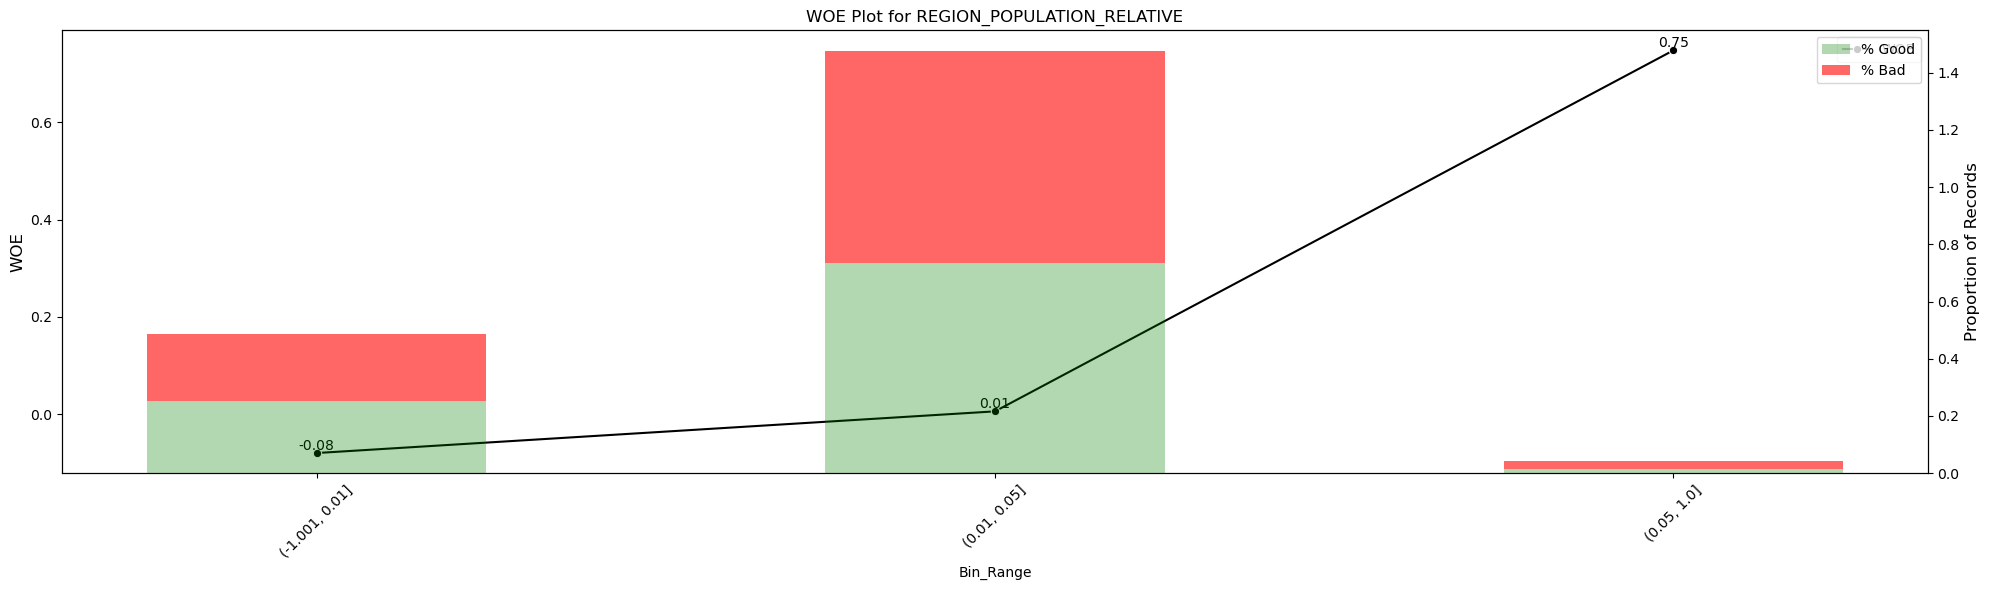

In [84]:
plot_numeric_woe(df, 'REGION_POPULATION_RELATIVE', 20)
plot_numeric_woe_manual(df, 'REGION_POPULATION_RELATIVE', [-1, 0.01, 0.05 ,1])

IV for FLOORSMAX_AVG with 10 bins: 0.0391


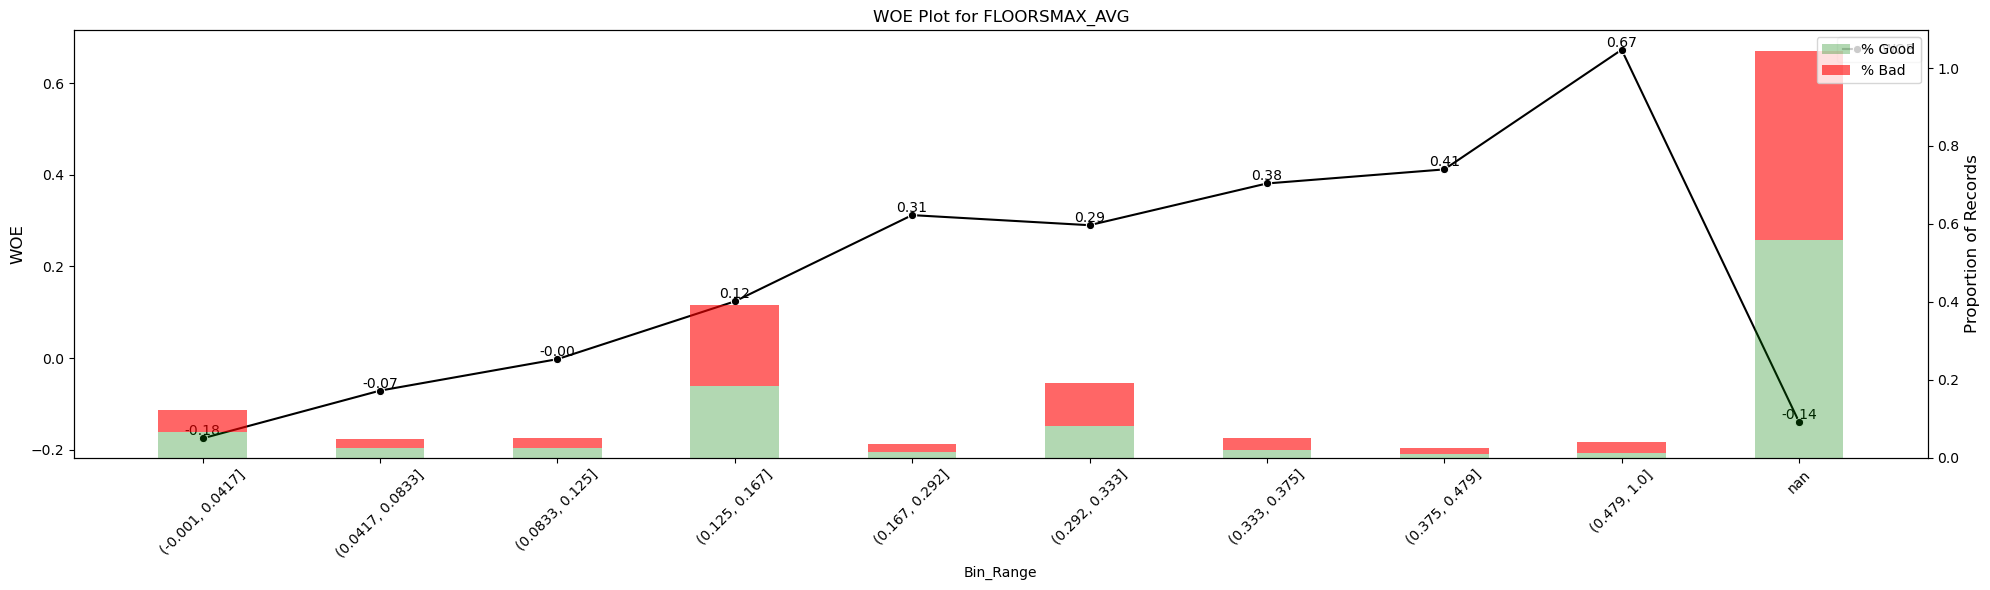


IV for FLOORSMAX_AVG with 4 bins: 0.0356
WOE values per Bin_Range:
  nan: WOE = -0.139012
  (-0.001, 0.15]: WOE = -0.111242
  (0.15, 0.3]: WOE = 0.140622
  (0.3, 1.0]: WOE = 0.362637
IV for FLOORSMAX_AVG with 4 bins: 0.0356


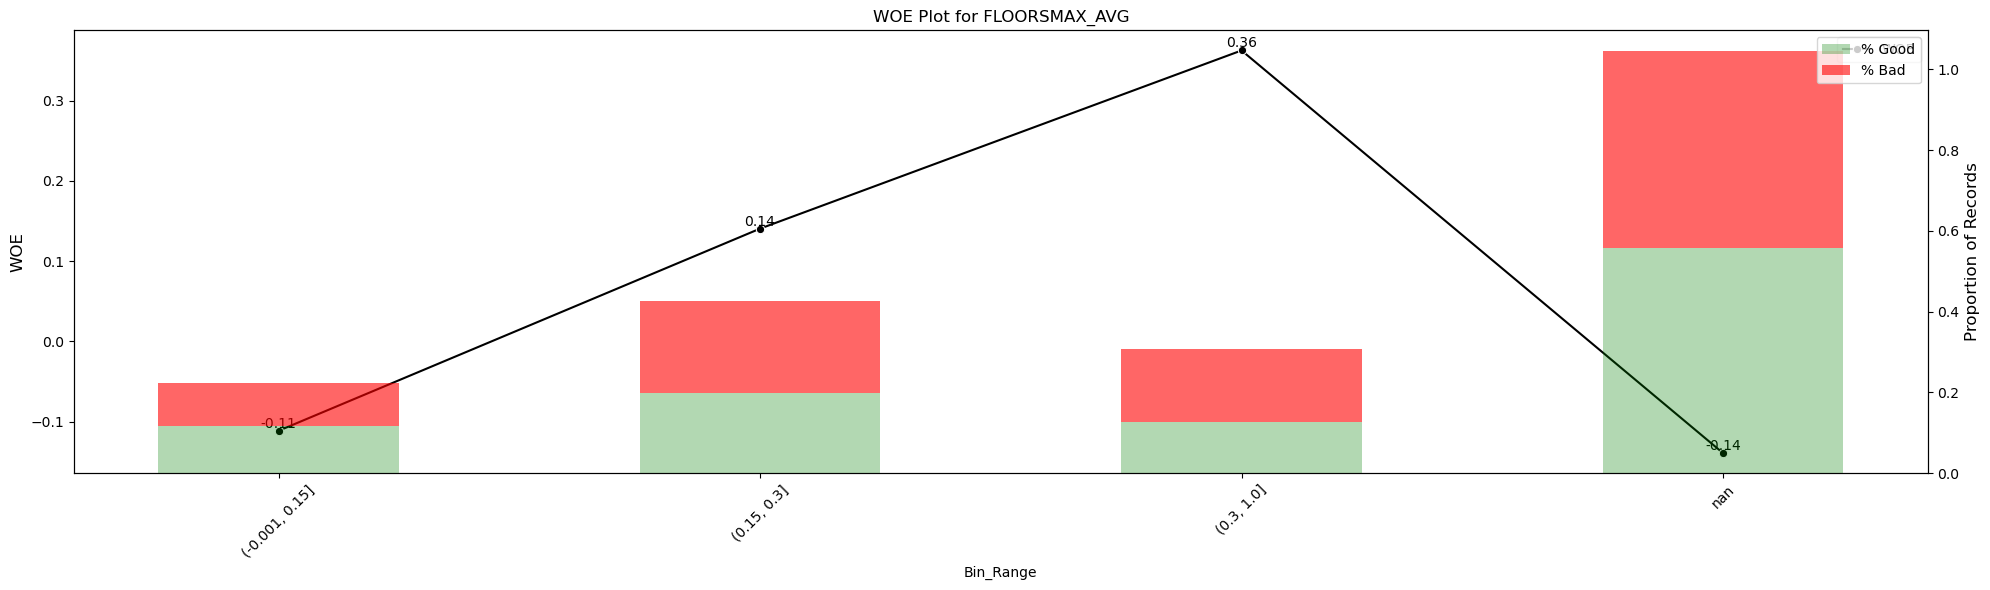

In [80]:
plot_numeric_woe(df, 'FLOORSMAX_AVG', 20)
plot_numeric_woe_manual(df, 'FLOORSMAX_AVG', [0, 0.15, 0.3, 1])

IV for DAYS_ID_PUBLISH with 20 bins: 0.0379


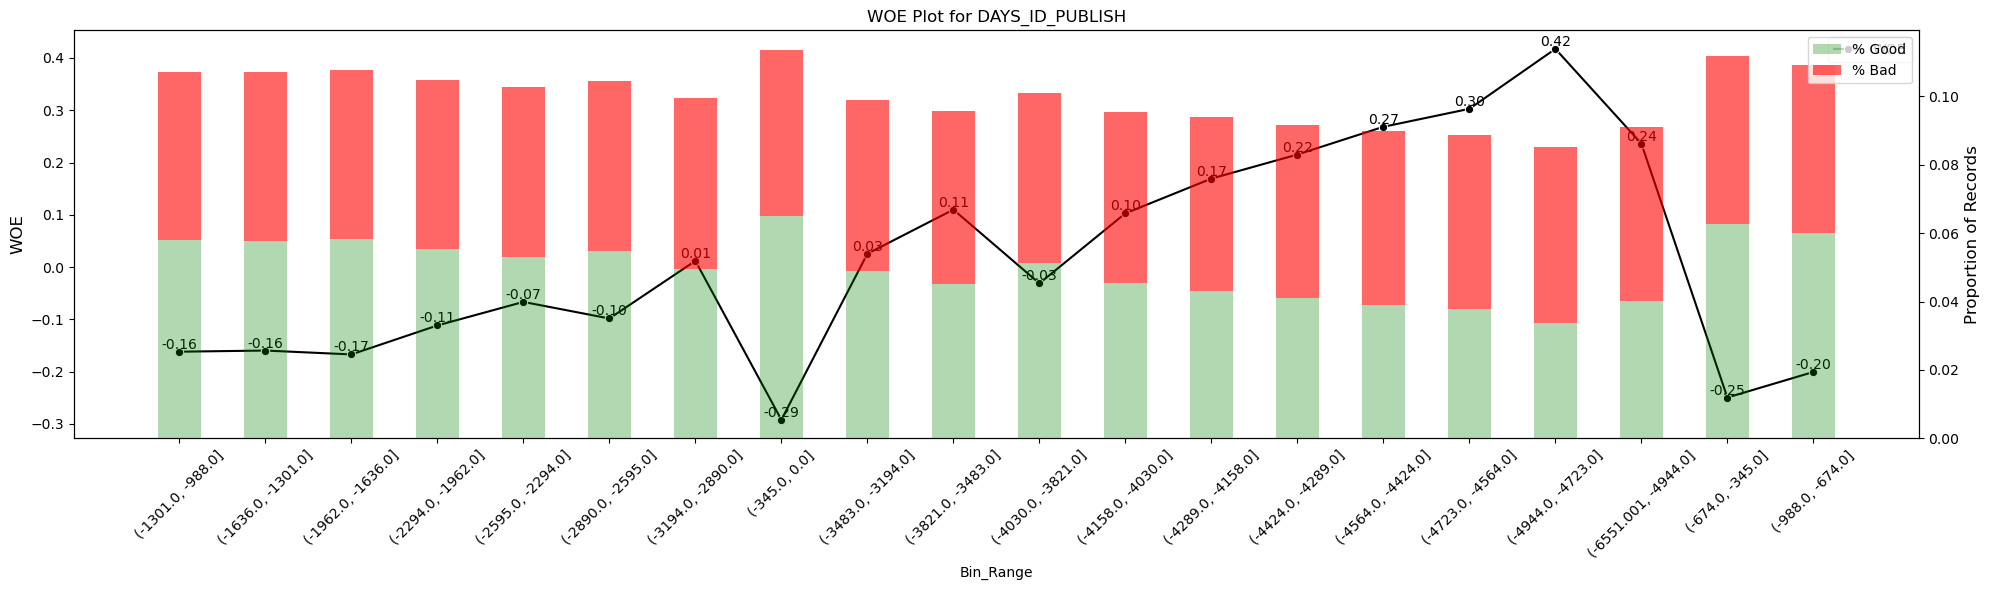


IV for DAYS_ID_PUBLISH with 4 bins: 0.0326
WOE values per Bin_Range:
  (-2000.0, 0.0]: WOE = -0.200515
  (-3000.0, -2000.0]: WOE = -0.091631
  (-4000.0, -3000.0]: WOE = 0.038013
  (-6551.001, -4000.0]: WOE = 0.231393
IV for DAYS_ID_PUBLISH with 4 bins: 0.0326


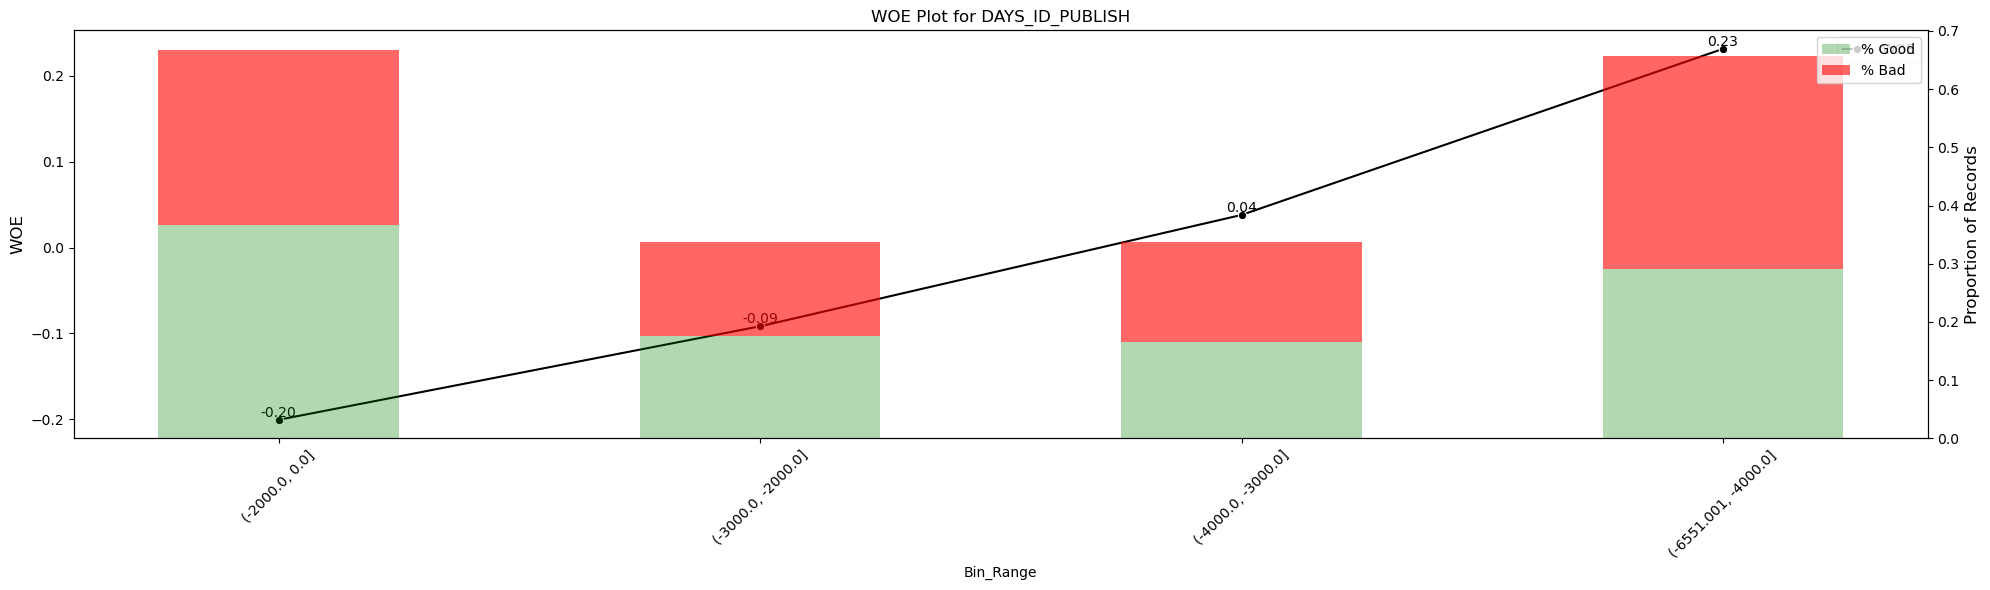

In [81]:
plot_numeric_woe(df, 'DAYS_ID_PUBLISH', 20)
plot_numeric_woe_manual(df, 'DAYS_ID_PUBLISH', [-6551,  -4000, -3000, -2000, 0])

In [ ]:
# drop unwatned variables and save new df as after_coarse_classing
cols_to_drop = [
    'REGION_POPULATION_RELATIVE',
    'DAYS_LAST_PHONE_CHANGE',
    'DAYS_CREDIT_ENDDATE_mean'
]

df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
df1.drop(columns=[col for col in cols_to_drop if col in df1.columns], inplace=True)
df.info()
df.to_csv('after_coarse_classing_train.csv', index=False)
df1.to_csv('after_coarse_classing_test.csv', index=False)

# df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
# df.info()
# df.to_csv('after_coarse_classing.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TARGET                    207300 non-null  int64  
 1   NAME_INCOME_TYPE          207300 non-null  object 
 2   NAME_EDUCATION_TYPE       207300 non-null  object 
 3   DAYS_ID_PUBLISH           207300 non-null  int64  
 4   OCCUPATION_TYPE           143111 non-null  object 
 5   ORGANIZATION_TYPE         207300 non-null  object 
 6   EXT_SOURCE_1              89268 non-null   float64
 7   FLOORSMAX_AVG             105336 non-null  float64
 8   RATIO_LIFE_EMPLOYED       207300 non-null  float64
 9   LOAN_TO_VALUE             207077 non-null  float64
 10  DAYS_CREDIT_min           176852 non-null  float64
 11  AMT_CREDIT_SUM_DEBT_sum   176852 non-null  float64
 12  AMT_CREDIT_SUM_DEBT_mean  172010 non-null  float64
 13  CREDIT_ACTIVE_Active      176852 non-null  f

<h1> Create Scorecard

|   |Characteristic         |              Number of Attributes |  IV |  
|--- |  ------               |        --------------  | ----- |  
|   1   |   EXT_SOURCE_1               |   6   |   0.1455  |
|   2   |  LOAN_TO_VALUE                 |   5   |   0.0687  |
|   3   |  RATIO_LIFE_EMPLOYED          |   6   |   0.0802 |
|   4   |  DAYS_CREDIT_MIN  |   5   |   0.0638  |
|   5   |  DAYS_CREDIT_ENDDATE_mean                  |   5   |   0.0704  |
|   6   |  ORGANIZATION_TYPE             |   4   |   0.0578  |
|   7   |  AMT_CREDIT_SUM_DEBT_mean  |   3   |   0.0436  |  
|   8   |  CREDIT_ACTIVE_Active                 |   4   |   0.0469  |
|   9   |  NAME_INCOME_TYPE                 |   3   |   0.0.0499  |
|   10   |  DAYS_LAST_PHONE_CHANGE                 |   5   |   0.0461  |
|   11   |  AMT_CREDIT_SUM_DEBT_sum                 |   4   |   0.0437  |
|   12   |  NAME_EDUCATION_TYPE                 |   3   |   0.0469  |
|   13   |  REGION_POPULATION_RELATIVE                 |   4   |   0.022  |
|   14   |  FLOORSMAX_AVG                 |   4   |   0.0356  |


In [ ]:
iv_df = calculate_iv_all(df, target_col='TARGET', bins=20)
iv_df.head(20)

Skipping CODE_GENDER (less than or equal to 2 unique non-null values)
Skipping NAME_TYPE_SUITE (less than or equal to 2 unique non-null values)
Skipping WEEKDAY_APPR_PROCESS_START (less than or equal to 2 unique non-null values)
Skipping FONDKAPREMONT_MODE (less than or equal to 2 unique non-null values)
Skipping HOUSETYPE_MODE (less than or equal to 2 unique non-null values)
Skipping WALLSMATERIAL_MODE (less than or equal to 2 unique non-null values)
Skipping EMERGENCYSTATE_MODE (less than or equal to 2 unique non-null values)


Variable        IV
20                 EXT_SOURCE_1  0.361608
4               AMT_GOODS_PRICE  0.108008
7                 DAYS_EMPLOYED  0.104728
120             OCCUPATION_TYPE  0.080222
95              DAYS_CREDIT_min  0.080147
6                    DAYS_BIRTH  0.079927
96     DAYS_CREDIT_ENDDATE_mean  0.076357
124           ORGANIZATION_TYPE  0.068933
103    AMT_CREDIT_SUM_DEBT_mean  0.055783
10                  OWN_CAR_AGE  0.053697
112            NAME_INCOME_TYPE  0.050930
105        CREDIT_ACTIVE_Active  0.050247
2                    AMT_CREDIT  0.049343
68       DAYS_LAST_PHONE_CHANGE  0.048563
113         NAME_EDUCATION_TYPE  0.048123
102     AMT_CREDIT_SUM_DEBT_sum  0.043358
5    REGION_POPULATION_RELATIVE  0.040241
98   AMT_CREDIT_MAX_OVERDUE_max  0.038466
56               FLOORSMAX_MEDI  0.037906
9               DAYS_ID_PUBLISH  0.037855

In [54]:
def Encode_WOE_categorical(column, bin_ranges, woe_values, output_df, missing_woe_value):
    """
    Encode a categorical column into WOE using manual groupings and handle missing values.
    
    Parameters:
    - column: pandas Series (e.g. original_df['JOB'])
    - bin_ranges: list of grouped category strings (e.g., ['student,unemployed', 'working'])
    - woe_values: WOE values for each group (e.g., [-0.2, 0.4])
    - output_df: DataFrame to which the new column will be added
    - missing_woe_value: WOE value to assign to missing or unmapped values
    """
    col_name = column.name + '_woe'

    # Step 1: Build category-to-WOE mapping
    group_to_woe = {}
    for group_str, woe_val in zip(bin_ranges, woe_values):
        categories = [cat.strip() for cat in group_str.split(',')]
        for cat in categories:
            group_to_woe[cat] = float(woe_val)

    # Step 2: Map values and handle missing/unmapped
    encoded_col = column.fillna('Missing').astype(str).map(group_to_woe).fillna(float(missing_woe_value))

    # Step 3: Add to output DataFrame
    output_df[col_name] = encoded_col

In [55]:
def Encode_WOE_numerical(column, bin_edges, woe_values, output_df, missing_woe_value):
    """
    Encode a numerical column into WOE using manual bins and handle missing values.

    Parameters:
    - column: pandas Series (e.g. original_df['EXT_SOURCE_1'])
    - bin_edges: list of numeric cut points
    - woe_values: WOE values for each bin (len = len(bin_edges) - 1)
    - output_df: DataFrame to which the encoded column will be added
    - missing_woe_value: WOE value to assign to missing values
    """
    col_name = column.name + '_woe'

    # Step 1: Bin the values
    binned = pd.cut(column, bins=bin_edges, include_lowest=True)

    # Step 2: Map each bin to WOE
    bin_labels = binned.cat.categories
    if len(woe_values) != len(bin_labels):
        raise ValueError(f"Number of WOE values ({len(woe_values)}) must match number of bins ({len(bin_labels)})")

    bin_to_woe = {bin_labels[i]: float(woe_values[i]) for i in range(len(woe_values))}

    # Step 3: Map and handle missing values
    encoded_col = binned.map(bin_to_woe).astype(float).fillna(float(missing_woe_value))

    # Step 4: Add to output DataFrame
    output_df[col_name] = encoded_col

In [ ]:
# encoded_df = pd.DataFrame()
# df = pd.read_csv('after_coarse_classing.csv')
# df.info()
# encoded_df['TARGET'] = df['TARGET']
# encoded_df.info()
encoded_df = pd.DataFrame()
encoded_df1 = pd.DataFrame()
df = pd.read_csv('after_coarse_classing_train.csv')
df1 = pd.read_csv('after_coarse_classing_test.csv')
df.info()
encoded_df['TARGET'] = df['TARGET']
encoded_df1['TARGET'] = df1['TARGET']
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TARGET                    207300 non-null  int64  
 1   NAME_INCOME_TYPE          207300 non-null  object 
 2   NAME_EDUCATION_TYPE       207300 non-null  object 
 3   DAYS_ID_PUBLISH           207300 non-null  int64  
 4   OCCUPATION_TYPE           143111 non-null  object 
 5   ORGANIZATION_TYPE         207300 non-null  object 
 6   EXT_SOURCE_1              89268 non-null   float64
 7   FLOORSMAX_AVG             105336 non-null  float64
 8   RATIO_LIFE_EMPLOYED       207300 non-null  float64
 9   LOAN_TO_VALUE             207077 non-null  float64
 10  DAYS_CREDIT_min           176852 non-null  float64
 11  AMT_CREDIT_SUM_DEBT_sum   176852 non-null  float64
 12  AMT_CREDIT_SUM_DEBT_mean  172010 non-null  float64
 13  CREDIT_ACTIVE_Active      176852 non-null  f

In [ ]:
Encode_WOE_categorical(
    df['NAME_INCOME_TYPE'],
    bin_ranges=['Maternity leave, Unemployed, Working', 'Commercial associate','State servant, Pensioner, Businessman, Student'],
    woe_values=[-0.174844, 0.068848, 0.389268],
    output_df = encoded_df,
    missing_woe_value=0.0
)
Encode_WOE_categorical(
    df1['NAME_INCOME_TYPE'],
    bin_ranges=['Maternity leave, Unemployed, Working', 'Commercial associate','State servant, Pensioner, Businessman, Student'],
    woe_values=[-0.174844, 0.068848, 0.389268],
    output_df = encoded_df1,
    missing_woe_value=0.0
)

In [ ]:
Encode_WOE_categorical(
    df['NAME_EDUCATION_TYPE'],
    bin_ranges=['Lower secondary,Secondary / secondary special,Incomplete higher', 'Higher education,Academic degree'],
    woe_values=[-0.109445, 0.430333],
    output_df = encoded_df,
    missing_woe_value=0.0
)
Encode_WOE_categorical(
    df1['NAME_EDUCATION_TYPE'],
    bin_ranges=['Lower secondary,Secondary / secondary special,Incomplete higher', 'Higher education,Academic degree'],
    woe_values=[-0.109445, 0.430333],
    output_df = encoded_df1,
    missing_woe_value=0.0
)
encoded_df.head(10)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe
0       1             -0.174844                -0.109445
1       0             -0.174844                -0.109445
2       0             -0.174844                -0.109445
3       0             -0.174844                -0.109445
4       0              0.389268                -0.109445
5       0              0.068848                 0.430333
6       0              0.389268                 0.430333
7       0              0.389268                -0.109445
8       0             -0.174844                -0.109445
9       0             -0.174844                 0.430333

In [ ]:
Encode_WOE_numerical(
    df['DAYS_ID_PUBLISH'],
    bin_edges=[-10000,-4000,-3000,-2000, 0],
    woe_values=[0.231393, 0.038013, -0.091631, -0.200515],
    output_df=encoded_df,
    missing_woe_value= -0.066502
)

Encode_WOE_numerical(
    df1['DAYS_ID_PUBLISH'],
    bin_edges=[-10000,-4000,-3000,-2000, 0],
    woe_values=[0.231393, 0.038013, -0.091631, -0.200515],
    output_df=encoded_df1,
    missing_woe_value= -0.066502
)
encoded_df.head(50)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  \
0        1             -0.174844                -0.109445   
1        0             -0.174844                -0.109445   
2        0             -0.174844                -0.109445   
3        0             -0.174844                -0.109445   
4        0              0.389268                -0.109445   
5        0              0.068848                 0.430333   
6        0              0.389268                 0.430333   
7        0              0.389268                -0.109445   
8        0             -0.174844                -0.109445   
9        0             -0.174844                 0.430333   
10       0              0.389268                -0.109445   
11       0             -0.174844                -0.109445   
12       0             -0.174844                -0.109445   
13       0             -0.174844                -0.109445   
14       0             -0.174844                -0.109445   
15       0             -0.174844                -0.109445   
16       0              0.389268                 0.430333   
17       0             -0.174844                -0.109445   
18       0              0.068848                -0.109445   
19       0             -0.174844                -0.109445   
20       1             -0.174844                -0.109445   
21       0             -0.174844                -0.109445   
22       0              0.389268                 0.430333   
23       0             -0.174844                 0.430333   
24       0              0.068848                -0.109445   
25       0             -0.174844                -0.109445   
26       0              0.389268                 0.430333   
27       0              0.068848                -0.109445   
28       0             -0.174844                -0.109445   
29       0             -0.174844                 0.430333   
30       1              0.068848                -0.109445   
31       0             -0.174844                -0.109445   
32       0              0.389268                 0.430333   
33       0             -0.174844                -0.109445   
34       0             -0.174844                -0.109445   
35       0              0.389268                -0.109445   
36       0             -0.174844                -0.109445   
37       0             -0.174844                -0.109445   
38       0              0.389268                 0.430333   
39       0              0.068848                 0.430333   
40       0              0.068848                 0.430333   
41       0             -0.174844                 0.430333   
42       0             -0.174844                -0.109445   
43       0             -0.174844                -0.109445   
44       0             -0.174844                 0.430333   
45       0              0.068848                -0.109445   
46       0              0.389268                 0.430333   
47       0              0.068848                -0.109445   
48       0              0.389268                 0.430333   
49       0             -0.174844                -0.109445   

    DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  \
0             -0.091631            -0.283060              -0.154363   
1             -0.091631            -0.283060               0.101947   
2             -0.091631            -0.283060              -0.154363   
3              0.038013             0.254144               0.410070   
4             -0.200515            -0.283060               0.101947   
5             -0.200515             0.254144              -0.154363   
6             -0.091631             0.254144               0.101947   
7              0.038013             0.254144               0.410070   
8              0.038013            -0.283060               0.101947   
9             -0.200515             0.254144               0.101947   
10            -0.091631             0.254144               0.410070   
11             0.038013            -0.28

In [ ]:
# Encode_WOE_categorical(
#     df['OCCUPATION_TYPE'],
#     bin_ranges=['Low-skill Laborers,Drivers,Waiters/barmen staff,Security staff', 'Laborers', 'Cooking staff,Cleaning staff,Sales staff,Realty agents', 'IT staff,Private service staff,Missing,HR staff,High skill tech staff,Core staff,Secretaries,Managers,Medicine staff,Accountants'],
#     woe_values=[-0.419055, -0.283060, -0.189812, 0.254144],
#     output_df = encoded_df,
#     missing_woe_value=0.0
# )
# when i was testing i manually adjusted bins and found this to fit 5% each bin better 
Encode_WOE_categorical(
    df['OCCUPATION_TYPE'],
    bin_ranges=['Low-skill Laborers, Waiters/barmen staff, Drivers, Laborers', "Security staff, Cooking staff, Cleaning staff, Sales staff", 'IT staff, HR staff, Private service staff, Missing, Realty agents', 'Core staff, High skill tech staff, Managers, Secretaries, Medicine staff, Accountants'],
    woe_values=[-0.327910, -0.198608, 0.207703, 0.295461],
    output_df = encoded_df,
    missing_woe_value=0.0
)
Encode_WOE_categorical(
    df1['OCCUPATION_TYPE'],
    bin_ranges=['Low-skill Laborers, Waiters/barmen staff, Drivers, Laborers', "Security staff, Cooking staff, Cleaning staff, Sales staff", 'IT staff, HR staff, Private service staff, Missing, Realty agents', 'Core staff, High skill tech staff, Managers, Secretaries, Medicine staff, Accountants'],
    woe_values=[-0.327910, -0.198608, 0.207703, 0.295461],
    output_df = encoded_df1,
    missing_woe_value=0.0
)
encoded_df.head(10)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.066502   
1       0             -0.174844                -0.109445            -0.066502   
2       0             -0.174844                -0.109445            -0.066502   
3       0             -0.174844                -0.109445            -0.066502   
4       0              0.389268                -0.109445            -0.066502   
5       0              0.068848                 0.430333            -0.066502   
6       0              0.389268                 0.430333            -0.066502   
7       0              0.389268                -0.109445            -0.066502   
8       0             -0.174844                -0.109445            -0.066502   
9       0             -0.174844                 0.430333            -0.066502   

   OCCUPATION_TYPE_woe  
0            -0.283060  
1            -0.283060  
2            -0.283060  
3             0.254144  
4            -0.283060  
5             0.254144  
6             0.254144  
7             0.254144  
8            -0.283060  
9             0.254144

In [ ]:
Encode_WOE_categorical(
    df['ORGANIZATION_TYPE'],
    bin_ranges=['Transport: type 3,Construction,Cleaning,Industry: type 1,Realtor,Restaurant,Industry: type 3,Self-employed,Agriculture,Security,Trade: type 3,Transport: type 4', 'Business Entity Type 3', 'Trade: type 7,Industry: type 4,Trade: type 1,Business Entity Type 2,Industry: type 6,Mobile,Industry: type 11,Postal,Business Entity Type 1,Housing,Advertising,Industry: type 7,Industry: type 13,Other,Telecom,Legal Services,Emergency,Industry: type 2,Transport: type 2,Trade: type 2,Government,Industry: type 9,Industry: type 5,Services,Kindergarten,Electricity,Medicine,Hotel,Insurance,School,Bank,Culture', 'XNA,Military,University,Security Ministries,Transport: type 1,Police,Trade: type 6,Industry: type 12,Religion,Trade: type 5,Trade: type 4,Industry: type 10,Industry: type 8'],
    woe_values=[-0.277191, -0.154363, 0.101947, 0.410070],
    output_df = encoded_df,
    missing_woe_value=0.0
)
Encode_WOE_categorical(
    df1['ORGANIZATION_TYPE'],
    bin_ranges=['Transport: type 3,Construction,Cleaning,Industry: type 1,Realtor,Restaurant,Industry: type 3,Self-employed,Agriculture,Security,Trade: type 3,Transport: type 4', 'Business Entity Type 3', 'Trade: type 7,Industry: type 4,Trade: type 1,Business Entity Type 2,Industry: type 6,Mobile,Industry: type 11,Postal,Business Entity Type 1,Housing,Advertising,Industry: type 7,Industry: type 13,Other,Telecom,Legal Services,Emergency,Industry: type 2,Transport: type 2,Trade: type 2,Government,Industry: type 9,Industry: type 5,Services,Kindergarten,Electricity,Medicine,Hotel,Insurance,School,Bank,Culture', 'XNA,Military,University,Security Ministries,Transport: type 1,Police,Trade: type 6,Industry: type 12,Religion,Trade: type 5,Trade: type 4,Industry: type 10,Industry: type 8'],
    woe_values=[-0.277191, -0.154363, 0.101947, 0.410070],
    output_df = encoded_df1,
    missing_woe_value=0.0
)
encoded_df.head(10)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.066502   
1       0             -0.174844                -0.109445            -0.066502   
2       0             -0.174844                -0.109445            -0.066502   
3       0             -0.174844                -0.109445            -0.066502   
4       0              0.389268                -0.109445            -0.066502   
5       0              0.068848                 0.430333            -0.066502   
6       0              0.389268                 0.430333            -0.066502   
7       0              0.389268                -0.109445            -0.066502   
8       0             -0.174844                -0.109445            -0.066502   
9       0             -0.174844                 0.430333            -0.066502   

   OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  
0            -0.283060              -0.154363  
1            -0.283060               0.101947  
2            -0.283060              -0.154363  
3             0.254144               0.410070  
4            -0.283060               0.101947  
5             0.254144              -0.154363  
6             0.254144               0.101947  
7             0.254144               0.410070  
8            -0.283060               0.101947  
9             0.254144               0.101947

In [ ]:
Encode_WOE_numerical(
    df['EXT_SOURCE_1'],
    bin_edges=[-1, 0.2, 0.4, 0.6, 0.8, 1],
    woe_values=[-0.944106, -0.286090, 0.220194, 0.715798, 1.255758],
    output_df=encoded_df,
    missing_woe_value= -0.066502
)
Encode_WOE_numerical(
    df1['EXT_SOURCE_1'],
    bin_edges=[-1, 0.2, 0.4, 0.6, 0.8, 1],
    woe_values=[-0.944106, -0.286090, 0.220194, 0.715798, 1.255758],
    output_df=encoded_df1,
    missing_woe_value= -0.066502
)
encoded_df.head(10)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.066502   
1       0             -0.174844                -0.109445            -0.066502   
2       0             -0.174844                -0.109445            -0.066502   
3       0             -0.174844                -0.109445            -0.066502   
4       0              0.389268                -0.109445            -0.066502   
5       0              0.068848                 0.430333            -0.066502   
6       0              0.389268                 0.430333            -0.066502   
7       0              0.389268                -0.109445            -0.066502   
8       0             -0.174844                -0.109445            -0.066502   
9       0             -0.174844                 0.430333            -0.066502   

   OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  EXT_SOURCE_1_woe  
0            -0.283060              -0.154363         -0.944106  
1            -0.283060               0.101947         -0.066502  
2            -0.283060              -0.154363         -0.066502  
3             0.254144               0.410070         -0.066502  
4            -0.283060               0.101947         -0.066502  
5             0.254144              -0.154363          0.715798  
6             0.254144               0.101947         -0.066502  
7             0.254144               0.410070          0.220194  
8            -0.283060               0.101947         -0.066502  
9             0.254144               0.101947         -0.286090

In [ ]:
Encode_WOE_numerical(
    df['FLOORSMAX_AVG'],
    bin_edges=[-1, 0.15,0.3,1],
    woe_values=[-0.111243,0.140623,0.362640],
    output_df=encoded_df,
    missing_woe_value= -0.139012
)
Encode_WOE_numerical(
    df1['FLOORSMAX_AVG'],
    bin_edges=[-1, 0.15,0.3,1],
    woe_values=[-0.111243,0.140623,0.362640],
    output_df=encoded_df1,
    missing_woe_value= -0.139012
)
encoded_df.head()

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.066502   
1       0             -0.174844                -0.109445            -0.066502   
2       0             -0.174844                -0.109445            -0.066502   
3       0             -0.174844                -0.109445            -0.066502   
4       0              0.389268                -0.109445            -0.066502   

   OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  EXT_SOURCE_1_woe  \
0            -0.283060              -0.154363         -0.944106   
1            -0.283060               0.101947         -0.066502   
2            -0.283060              -0.154363         -0.066502   
3             0.254144               0.410070         -0.066502   
4            -0.283060               0.101947         -0.066502   

   FLOORSMAX_AVG_woe  
0          -0.111243  
1          -0.139012  
2          -0.139012  
3          -0.139012  
4          -0.139012

In [ ]:
Encode_WOE_numerical(
    df['RATIO_LIFE_EMPLOYED'],
    bin_edges=[-50000, 0, 0.1, 0.2, 0.3],
    woe_values=[0.391251, -0.292114, -0.043307, 0.220441],
    output_df=encoded_df,
    missing_woe_value=0.475725
)
Encode_WOE_numerical(
    df1['RATIO_LIFE_EMPLOYED'],
    bin_edges=[-50000, 0, 0.1, 0.2, 0.3],
    woe_values=[0.391251, -0.292114, -0.043307, 0.220441],
    output_df=encoded_df1,
    missing_woe_value=0.475725
)
encoded_df.head()

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.066502   
1       0             -0.174844                -0.109445            -0.066502   
2       0             -0.174844                -0.109445            -0.066502   
3       0             -0.174844                -0.109445            -0.066502   
4       0              0.389268                -0.109445            -0.066502   

   OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  EXT_SOURCE_1_woe  \
0            -0.283060              -0.154363         -0.944106   
1            -0.283060               0.101947         -0.066502   
2            -0.283060              -0.154363         -0.066502   
3             0.254144               0.410070         -0.066502   
4            -0.283060               0.101947         -0.066502   

   FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  
0          -0.111243                -0.292114  
1          -0.139012                -0.292114  
2          -0.139012                -0.043307  
3          -0.139012                -0.043307  
4          -0.139012                -0.292114

In [ ]:
Encode_WOE_numerical(
    df['LOAN_TO_VALUE'],
    bin_edges=[0, 1, 6],
    woe_values=[0.219235,-0.101539],
    output_df=encoded_df,
    missing_woe_value= 0.064642
)
Encode_WOE_numerical(
    df1['LOAN_TO_VALUE'],
    bin_edges=[0, 1, 6],
    woe_values=[0.219235,-0.101539],
    output_df=encoded_df1,
    missing_woe_value= 0.064642
)
encoded_df.head()

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.066502   
1       0             -0.174844                -0.109445            -0.066502   
2       0             -0.174844                -0.109445            -0.066502   
3       0             -0.174844                -0.109445            -0.066502   
4       0              0.389268                -0.109445            -0.066502   

   OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  EXT_SOURCE_1_woe  \
0            -0.283060              -0.154363         -0.944106   
1            -0.283060               0.101947         -0.066502   
2            -0.283060              -0.154363         -0.066502   
3             0.254144               0.410070         -0.066502   
4            -0.283060               0.101947         -0.066502   

   FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  LOAN_TO_VALUE_woe  
0          -0.111243                -0.292114          -0.101539  
1          -0.139012                -0.292114           0.219235  
2          -0.139012                -0.043307          -0.101539  
3          -0.139012                -0.043307           0.219235  
4          -0.139012                -0.292114          -0.101539

In [ ]:
Encode_WOE_numerical(
    df['DAYS_CREDIT_min'],
    bin_edges=[-2900, -2500, -1500, -1000, -200],
    woe_values=[0.346265, 0.186869, -0.025217, -0.285150],
    output_df=encoded_df,
    missing_woe_value= -0.259792
)
Encode_WOE_numerical(
    df1['DAYS_CREDIT_min'],
    bin_edges=[-2900, -2500, -1500, -1000, -200],
    woe_values=[0.346265, 0.186869, -0.025217, -0.285150],
    output_df=encoded_df1,
    missing_woe_value= -0.259792
)
encoded_df.head(20)


TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  \
0        1             -0.174844                -0.109445   
1        0             -0.174844                -0.109445   
2        0             -0.174844                -0.109445   
3        0             -0.174844                -0.109445   
4        0              0.389268                -0.109445   
5        0              0.068848                 0.430333   
6        0              0.389268                 0.430333   
7        0              0.389268                -0.109445   
8        0             -0.174844                -0.109445   
9        0             -0.174844                 0.430333   
10       0              0.389268                -0.109445   
11       0             -0.174844                -0.109445   
12       0             -0.174844                -0.109445   
13       0             -0.174844                -0.109445   
14       0             -0.174844                -0.109445   
15       0             -0.174844                -0.109445   
16       0              0.389268                 0.430333   
17       0             -0.174844                -0.109445   
18       0              0.068848                -0.109445   
19       0             -0.174844                -0.109445   

    DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  \
0             -0.066502            -0.283060              -0.154363   
1             -0.066502            -0.283060               0.101947   
2             -0.066502            -0.283060              -0.154363   
3             -0.066502             0.254144               0.410070   
4             -0.066502            -0.283060               0.101947   
5             -0.066502             0.254144              -0.154363   
6             -0.066502             0.254144               0.101947   
7             -0.066502             0.254144               0.410070   
8             -0.066502            -0.283060               0.101947   
9             -0.066502             0.254144               0.101947   
10            -0.066502             0.254144               0.410070   
11            -0.066502            -0.283060               0.101947   
12            -0.066502            -0.283060               0.101947   
13            -0.066502            -0.283060               0.101947   
14            -0.066502            -0.283060              -0.277191   
15            -0.066502            -0.283060               0.101947   
16            -0.066502             0.254144               0.101947   
17            -0.066502            -0.283060              -0.277191   
18            -0.066502            -0.189812               0.101947   
19            -0.066502            -0.189812              -0.154363   

    EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  \
0          -0.944106          -0.111243                -0.292114   
1          -0.066502          -0.139012                -0.292114   
2          -0.066502          -0.139012                -0.043307   
3          -0.066502          -0.139012                -0.043307   
4          -0.066502          -0.139012                -0.292114   
5           0.715798          -0.139012                 0.220441   
6          -0.066502          -0.139012                -0.292114   
7           0.220194          -0.139012                 0.391251   
8          -0.066502          -0.139012                -0.043307   
9          -0.286090          -0.139012                -0.292114   
10          0.715798          -0.139012                 0.391251   
11          0.220194           0.140623                 0.220441   
12          0.715798           0.362640                -0.292114   
13         -0.944106          -0.139012                -0.043307   
14         -0.066502          -0.139012                -0.292114   
15         -0.066502          -0.111243                 0.475725   
16         -0.066502          -0.139012                -0.043307   
17    

In [ ]:
Encode_WOE_numerical(
    df['AMT_CREDIT_SUM_DEBT_sum'],
    bin_edges=[-70000001, 0, 300000.0, 1200000.0],
    woe_values=[0.378028, -0.000157, -0.120005],
    output_df=encoded_df,
    missing_woe_value= -0.181634
)
Encode_WOE_numerical(
    df1['AMT_CREDIT_SUM_DEBT_sum'],
    bin_edges=[-70000001, 0, 300000.0, 1200000.0],
    woe_values=[0.378028, -0.000157, -0.120005],
    output_df=encoded_df1,
    missing_woe_value= -0.181634
)
encoded_df.head(20)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  \
0        1             -0.174844                -0.109445   
1        0             -0.174844                -0.109445   
2        0             -0.174844                -0.109445   
3        0             -0.174844                -0.109445   
4        0              0.389268                -0.109445   
5        0              0.068848                 0.430333   
6        0              0.389268                 0.430333   
7        0              0.389268                -0.109445   
8        0             -0.174844                -0.109445   
9        0             -0.174844                 0.430333   
10       0              0.389268                -0.109445   
11       0             -0.174844                -0.109445   
12       0             -0.174844                -0.109445   
13       0             -0.174844                -0.109445   
14       0             -0.174844                -0.109445   
15       0             -0.174844                -0.109445   
16       0              0.389268                 0.430333   
17       0             -0.174844                -0.109445   
18       0              0.068848                -0.109445   
19       0             -0.174844                -0.109445   

    DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  \
0             -0.066502            -0.283060              -0.154363   
1             -0.066502            -0.283060               0.101947   
2             -0.066502            -0.283060              -0.154363   
3             -0.066502             0.254144               0.410070   
4             -0.066502            -0.283060               0.101947   
5             -0.066502             0.254144              -0.154363   
6             -0.066502             0.254144               0.101947   
7             -0.066502             0.254144               0.410070   
8             -0.066502            -0.283060               0.101947   
9             -0.066502             0.254144               0.101947   
10            -0.066502             0.254144               0.410070   
11            -0.066502            -0.283060               0.101947   
12            -0.066502            -0.283060               0.101947   
13            -0.066502            -0.283060               0.101947   
14            -0.066502            -0.283060              -0.277191   
15            -0.066502            -0.283060               0.101947   
16            -0.066502             0.254144               0.101947   
17            -0.066502            -0.283060              -0.277191   
18            -0.066502            -0.189812               0.101947   
19            -0.066502            -0.189812              -0.154363   

    EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  \
0          -0.944106          -0.111243                -0.292114   
1          -0.066502          -0.139012                -0.292114   
2          -0.066502          -0.139012                -0.043307   
3          -0.066502          -0.139012                -0.043307   
4          -0.066502          -0.139012                -0.292114   
5           0.715798          -0.139012                 0.220441   
6          -0.066502          -0.139012                -0.292114   
7           0.220194          -0.139012                 0.391251   
8          -0.066502          -0.139012                -0.043307   
9          -0.286090          -0.139012                -0.292114   
10          0.715798          -0.139012                 0.391251   
11          0.220194           0.140623                 0.220441   
12          0.715798           0.362640                -0.292114   
13         -0.944106          -0.139012                -0.043307   
14         -0.066502          -0.139012                -0.292114   
15         -0.066502          -0.111243                 0.475725   
16         -0.066502          -0.139012                -0.043307   
17    

In [ ]:
Encode_WOE_numerical(
    df['AMT_CREDIT_SUM_DEBT_mean'],
    bin_edges=[-2000001, 2000.0, 120000.0],
    woe_values=[0.393519, -0.016294],
    output_df=encoded_df,
    missing_woe_value= -0.167258
)
Encode_WOE_numerical(
    df1['AMT_CREDIT_SUM_DEBT_mean'],
    bin_edges=[-2000001, 2000.0, 120000.0],
    woe_values=[0.393519, -0.016294],
    output_df=encoded_df1,
    missing_woe_value= -0.167258
)
encoded_df.head(20)


TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  \
0        1             -0.174844                -0.109445   
1        0             -0.174844                -0.109445   
2        0             -0.174844                -0.109445   
3        0             -0.174844                -0.109445   
4        0              0.389268                -0.109445   
5        0              0.068848                 0.430333   
6        0              0.389268                 0.430333   
7        0              0.389268                -0.109445   
8        0             -0.174844                -0.109445   
9        0             -0.174844                 0.430333   
10       0              0.389268                -0.109445   
11       0             -0.174844                -0.109445   
12       0             -0.174844                -0.109445   
13       0             -0.174844                -0.109445   
14       0             -0.174844                -0.109445   
15       0             -0.174844                -0.109445   
16       0              0.389268                 0.430333   
17       0             -0.174844                -0.109445   
18       0              0.068848                -0.109445   
19       0             -0.174844                -0.109445   

    DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  \
0             -0.066502            -0.283060              -0.154363   
1             -0.066502            -0.283060               0.101947   
2             -0.066502            -0.283060              -0.154363   
3             -0.066502             0.254144               0.410070   
4             -0.066502            -0.283060               0.101947   
5             -0.066502             0.254144              -0.154363   
6             -0.066502             0.254144               0.101947   
7             -0.066502             0.254144               0.410070   
8             -0.066502            -0.283060               0.101947   
9             -0.066502             0.254144               0.101947   
10            -0.066502             0.254144               0.410070   
11            -0.066502            -0.283060               0.101947   
12            -0.066502            -0.283060               0.101947   
13            -0.066502            -0.283060               0.101947   
14            -0.066502            -0.283060              -0.277191   
15            -0.066502            -0.283060               0.101947   
16            -0.066502             0.254144               0.101947   
17            -0.066502            -0.283060              -0.277191   
18            -0.066502            -0.189812               0.101947   
19            -0.066502            -0.189812              -0.154363   

    EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  \
0          -0.944106          -0.111243                -0.292114   
1          -0.066502          -0.139012                -0.292114   
2          -0.066502          -0.139012                -0.043307   
3          -0.066502          -0.139012                -0.043307   
4          -0.066502          -0.139012                -0.292114   
5           0.715798          -0.139012                 0.220441   
6          -0.066502          -0.139012                -0.292114   
7           0.220194          -0.139012                 0.391251   
8          -0.066502          -0.139012                -0.043307   
9          -0.286090          -0.139012                -0.292114   
10          0.715798          -0.139012                 0.391251   
11          0.220194           0.140623                 0.220441   
12          0.715798           0.362640                -0.292114   
13         -0.944106          -0.139012                -0.043307   
14         -0.066502          -0.139012                -0.292114   
15         -0.066502          -0.111243                 0.475725   
16         -0.066502          -0.139012                -0.043307   
17    

In [ ]:
Encode_WOE_numerical(
    df['CREDIT_ACTIVE_Active'],
    bin_edges=[-1, 1, 3, 32],
    woe_values=[0.227726, 0.051390, -0.322140],
    output_df=encoded_df,
    missing_woe_value= -0.244067
)
Encode_WOE_numerical(
    df1['CREDIT_ACTIVE_Active'],
    bin_edges=[-1, 1, 3, 32],
    woe_values=[0.227726, 0.051390, -0.322140],
    output_df=encoded_df1,
    missing_woe_value= -0.244067
)
encoded_df.head(20)


TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  \
0        1             -0.174844                -0.109445   
1        0             -0.174844                -0.109445   
2        0             -0.174844                -0.109445   
3        0             -0.174844                -0.109445   
4        0              0.389268                -0.109445   
5        0              0.068848                 0.430333   
6        0              0.389268                 0.430333   
7        0              0.389268                -0.109445   
8        0             -0.174844                -0.109445   
9        0             -0.174844                 0.430333   
10       0              0.389268                -0.109445   
11       0             -0.174844                -0.109445   
12       0             -0.174844                -0.109445   
13       0             -0.174844                -0.109445   
14       0             -0.174844                -0.109445   
15       0             -0.174844                -0.109445   
16       0              0.389268                 0.430333   
17       0             -0.174844                -0.109445   
18       0              0.068848                -0.109445   
19       0             -0.174844                -0.109445   

    DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  \
0             -0.066502            -0.283060              -0.154363   
1             -0.066502            -0.283060               0.101947   
2             -0.066502            -0.283060              -0.154363   
3             -0.066502             0.254144               0.410070   
4             -0.066502            -0.283060               0.101947   
5             -0.066502             0.254144              -0.154363   
6             -0.066502             0.254144               0.101947   
7             -0.066502             0.254144               0.410070   
8             -0.066502            -0.283060               0.101947   
9             -0.066502             0.254144               0.101947   
10            -0.066502             0.254144               0.410070   
11            -0.066502            -0.283060               0.101947   
12            -0.066502            -0.283060               0.101947   
13            -0.066502            -0.283060               0.101947   
14            -0.066502            -0.283060              -0.277191   
15            -0.066502            -0.283060               0.101947   
16            -0.066502             0.254144               0.101947   
17            -0.066502            -0.283060              -0.277191   
18            -0.066502            -0.189812               0.101947   
19            -0.066502            -0.189812              -0.154363   

    EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  \
0          -0.944106          -0.111243                -0.292114   
1          -0.066502          -0.139012                -0.292114   
2          -0.066502          -0.139012                -0.043307   
3          -0.066502          -0.139012                -0.043307   
4          -0.066502          -0.139012                -0.292114   
5           0.715798          -0.139012                 0.220441   
6          -0.066502          -0.139012                -0.292114   
7           0.220194          -0.139012                 0.391251   
8          -0.066502          -0.139012                -0.043307   
9          -0.286090          -0.139012                -0.292114   
10          0.715798          -0.139012                 0.391251   
11          0.220194           0.140623                 0.220441   
12          0.715798           0.362640                -0.292114   
13         -0.944106          -0.139012                -0.043307   
14         -0.066502          -0.139012                -0.292114   
15         -0.066502          -0.111243                 0.475725   
16         -0.066502          -0.139012                -0.043307   
17    

In [ ]:
# encoded_df.info()
# encoded_df.to_csv('woe_encoded_df.csv', index=False)
encoded_df.info()
encoded_df.to_csv('woe_encoded_df_train.csv', index=False)
encoded_df1.to_csv('woe_encoded_df_test.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   TARGET                        207300 non-null  int64  
 1   NAME_INCOME_TYPE_woe          207300 non-null  float64
 2   NAME_EDUCATION_TYPE_woe       207300 non-null  float64
 3   DAYS_ID_PUBLISH_woe           207300 non-null  float64
 4   OCCUPATION_TYPE_woe           207300 non-null  float64
 5   ORGANIZATION_TYPE_woe         207300 non-null  float64
 6   EXT_SOURCE_1_woe              207300 non-null  float64
 7   FLOORSMAX_AVG_woe             207300 non-null  float64
 8   RATIO_LIFE_EMPLOYED_woe       207300 non-null  float64
 9   LOAN_TO_VALUE_woe             207300 non-null  float64
 10  DAYS_CREDIT_min_woe           207300 non-null  float64
 11  AMT_CREDIT_SUM_DEBT_sum_woe   207300 non-null  float64
 12  AMT_CREDIT_SUM_DEBT_mean_woe  207300 non-nul

## logistic regression

In [ ]:
train_woe = pd.read_csv('woe_encoded_df_train.csv')
test_woe = pd.read_csv('woe_encoded_df_test.csv')

In [ ]:


# create the X, y parts of data for train and test
y_train = train_woe.loc[:, 'TARGET']
X_train = train_woe.loc[:, train_woe.columns != 'TARGET']
y_test = test_woe.loc[:, 'TARGET']
X_test = test_woe.loc[:, train_woe.columns != 'TARGET']

# create a logistic regression model object
lr = LogisticRegression(solver='liblinear',class_weight='balanced') # unequal number of goods and bads
lr.fit(X_train, y_train)
pd.Series(np.concatenate([lr.intercept_, lr.coef_[0]]),
          index = np.concatenate([['intercept'], lr.feature_names_in_]) )

In [ ]:
bins = {'NAME_INCOME_TYPE_woe':['Missing','Maternity leave, Unemployed, Working', 'Commercial associate','State servant, Pensioner, Businessman, Student'],
        'NAME_EDUCATION_TYPE_woe':['Missing','Lower secondary,Secondary / secondary special,Incomplete higher', 'Higher education,Academic degree'],
        'DAYS_ID_PUBLISH_woe':['Missing',-10000,-4000,-3000,-2000, 0],
        'OCCUPATION_TYPE_woe':['Missing','Low-skill Laborers, Waiters/barmen staff, Drivers, Laborers', "Security staff, Cooking staff, Cleaning staff, Sales staff", 'IT staff, HR staff, Private service staff, Missing, Realty agents', 'Core staff, High skill tech staff, Managers, Secretaries, Medicine staff, Accountants'],
        'ORGANIZATION_TYPE_woe':['Missing','Transport: type 3,Construction,Cleaning,Industry: type 1,Realtor,Restaurant,Industry: type 3,Self-employed,Agriculture,Security,Trade: type 3,Transport: type 4', 'Business Entity Type 3', 'Trade: type 7,Industry: type 4,Trade: type 1,Business Entity Type 2,Industry: type 6,Mobile,Industry: type 11,Postal,Business Entity Type 1,Housing,Advertising,Industry: type 7,Industry: type 13,Other,Telecom,Legal Services,Emergency,Industry: type 2,Transport: type 2,Trade: type 2,Government,Industry: type 9,Industry: type 5,Services,Kindergarten,Electricity,Medicine,Hotel,Insurance,School,Bank,Culture', 'XNA,Military,University,Security Ministries,Transport: type 1,Police,Trade: type 6,Industry: type 12,Religion,Trade: type 5,Trade: type 4,Industry: type 10,Industry: type 8'],
        'EXT_SOURCE_1_woe':['Missing',-1, 0.2, 0.4, 0.6, 0.8, 1],
        'FLOORSMAX_AVG_woe':['Missing',-1, 0.15,0.3,1],
        'RATIO_LIFE_EMPLOYED_woe':['Missing',-50000, 0, 0.1, 0.2, 0.3],
        'LOAN_TO_VALUE_woe':['Missing',0, 1, 6],
        'DAYS_CREDIT_min_woe':['Missing',-2900,-2500,-1500, -1000, -200],
        'AMT_CREDIT_SUM_DEBT_sum_woe':['Missing',-70000001, 0, 300000.0, 1200000.0],
        'AMT_CREDIT_SUM_DEBT_mean_woe':['Missing',-2000001, 2000.0, 120000.0],
        'CREDIT_ACTIVE_Active_woe':['Missing',-1, 1, 3, 32],
        
        }
woe_values = {
        'NAME_INCOME_TYPE_woe':[0.0,-0.174844, 0.068848, 0.389268],
        'NAME_EDUCATION_TYPE_woe':[0.0,-0.109445, 0.430333],
        'DAYS_ID_PUBLISH_woe':[-0.066502,0.231393, 0.038013, -0.091631, -0.200515],
        'OCCUPATION_TYPE_woe':[0.0,-0.327910, -0.198608, 0.207703, 0.295461],
        'ORGANIZATION_TYPE_woe':[0.0,-0.277191, -0.154363, 0.101947, 0.410070],
        'EXT_SOURCE_1_woe':[-0.066502,-0.944106, -0.286090, 0.220194, 0.715798, 1.255758],
        'FLOORSMAX_AVG_woe':[-0.139012,-0.111243,0.140623,0.362640],
        'RATIO_LIFE_EMPLOYED_woe':[0.475725,0.391251, -0.292114, -0.043307, 0.220441],
        'LOAN_TO_VALUE_woe':[0.064642,0.219235,-0.101539],
        'DAYS_CREDIT_min_woe':[-0.259792,0.346265, 0.186869, -0.025217, -0.285150],
        'AMT_CREDIT_SUM_DEBT_sum_woe':[-0.181634,0.378028, -0.000157, -0.120005],
        'AMT_CREDIT_SUM_DEBT_mean_woe':[-0.167258,0.393519, -0.016294],
        'CREDIT_ACTIVE_Active_woe':[-0.244067,0.227726, 0.051390, -0.322140],
}


### Score points

In [ ]:
# lr.coef_[0]
cols = list(train_woe.columns[train_woe.columns!='TARGET'])
coefficients = lr.coef_[0]
coefficient_map = dict(zip(cols, coefficients))
print(coefficient_map)


In [ ]:
# score = -(coef * woe encoded values + intercept / n )
def calculate_score(coef,woe,intercept,n,bins,variable_name):
    PDO = 20
    POINTS0= 600
    ODDS0 = 1/20 
    scores = []
    scaled_scores = []
    for i in range (len(woe)):
        score = -(coef*woe[i]+intercept/n)
        factor = PDO/np.log(2)
        offset = POINTS0 - factor * np.log(ODDS0)
        scaled_score = score * (factor) + offset/n
        scaled_scores.append(scaled_score)
        scores.append(score)
   
    if not (len(scores) == len(woe) ):
        raise ValueError("The lengths of scores, woe, and bins lists must be equal.")
    


    score_data = []
    for i in range(len(scores)):
        if(len(scores))+1 == len(bins):
            if(bins[i] == 'Missing'):
                label =  f"[{bins[i]}]"
            else:
                label =  f"[{bins[i]},{bins[i+1]}]" 
        else:
            label =  f"[{bins[i]}]"
        score_data.append({
            'variable': variable_name,
            'bin': label,
            # 'woe': woe[i],
            # 'score': scores[i],
            'points': scaled_scores[i],
        })

    return pd.DataFrame(score_data)



# Example Usage:
scores_example = [-0.014784649240414687, 0.006162486929158133, 0.03370496420151226]
woe_example = [-0.174844, 0.068848, 0.389268]
bins_example = ['Maternity leave, Unemployed, Working', 'Commercial associate', 'State servant, Pensioner, Businessman, Student']
variable_name_example = "OCCUPATION_TYPE"  # Replace with the actual variable name

scorecard_table = calculate_score(coef=coefficients[0],woe = woe_example, intercept=lr.intercept_[0], n=len(coefficient_map), bins=bins_example, variable_name=variable_name_example)

print(scorecard_table)

### if have time card creation to fit into sc.ply...

In [ ]:
# card = {}
# for col in coefficient_map.keys():
#     card[col.replace('_woe','')] = calculate_score(coef=coefficient_map[col],woe = woe_values[col], intercept=lr.intercept_[0], n=len(coefficient_map), bins=bins[col], variable_name=col)


In [ ]:
scorecard_dict = {}

for col in coefficient_map.keys():
    if col in bins:
        scorecard_table = calculate_score(
            coef=coefficient_map[col],
            woe=woe_values[col],
            intercept=lr.intercept_[0],
            n=len(coefficient_map),
            bins=bins[col],
            variable_name=col
        )
        scorecard_dict[col] = scorecard_table
    else:
        print(f"Column {col} not found in bins dictionary.")


In [ ]:
def apply_scorecard(df, scorecard_dict):
    df_scored = pd.DataFrame(index=df.index)
    total_score = pd.Series(0, index=df.index)
    
    for col, scorecard in scorecard_dict.items():
        mapping = dict(zip(scorecard['woe'], scorecard['scaled_score']))
        # Map WOE value to score
        df_scored[col + '_score'] = df[col].map(mapping)
        total_score += df_scored[col + '_score'].fillna(0)  # in case of missing mappings

    return total_score, df_scored

In [ ]:
train_score, train_score_details = apply_scorecard(train_woe, scorecard_dict)
test_score, test_score_details = apply_scorecard(test_woe, scorecard_dict)

In [ ]:
cutoff=540
# test score 
# 630.23 - 768.55
# create sets of predicted bad to compare with actual bad
predicted_bad_train = (train_score < cutoff)
predicted_bad_train_list = predicted_bad_train.astype(int).values.flatten().tolist()
predicted_bad_test = (test_score < cutoff)
predicted_bad_test_list = predicted_bad_test.astype(int).values.flatten().tolist()

print('*** Training Data Performance ***')
print('Confusion matrix:')
print(confusion_matrix(y_train, predicted_bad_train_list))
print('PCC measures:')
print(classification_report(y_train, predicted_bad_train_list))

print('*** Test Data Performance ***')
print('Confusion matrix:')
print(confusion_matrix(y_test, predicted_bad_test_list))
print('PCC measures:')
print(classification_report(y_test, predicted_bad_test_list))


<h1> Analysis And Tuning

<h4>What happens if we do not drop the variables with low monatonic trend?
hehe